## Est. of growing stock, biomass and RN content use UAV survey

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
site_data = '../05_input_data/Sites_with_Sentinel_bands_data.xlsx'
df = pd.read_excel(site_data, sheet_name='input_2020')
df.head()

,Site #,Origin,Dominant_s,LN_GS_cub_m,LN_M_stem_kg_m2,LN_M_stem_bark_kg_m2,LN_M_crown_kg_m2,LN_M_foliage_kg_m2,LN_M_AG_kg_m2,X_N36,...,r2020B04,r2020B05,r2020B06,r2020B07,r2020B08,r2020B09,r2020B10,r2020B11,r2020B12,r2020B13
0,1,n,Birch,4.771,1.792,-0.211,-0.261,-2.040,1.932,298987.203,...,0.254417,0.175280,0.086611,0.797761,-0.749311,0.491270,-15.527246,-11.385074,0.733806,0.040781
1,2,a,Pine,5.808,2.496,-0.073,0.392,-0.139,2.674,299016.572,...,0.189826,0.092225,0.047120,0.789129,-0.705355,0.659775,-16.547673,-10.947565,0.661723,-0.102776
2,3,a,Pine,5.796,2.546,0.030,0.501,-0.030,2.734,299072.773,...,0.204363,0.093062,0.043824,0.812120,-0.704758,0.631348,-14.341917,-11.884799,0.829603,-0.063200
3,4,a,Pine,5.826,2.643,0.000,0.419,-0.431,2.785,299152.693,...,0.187998,0.102872,0.048585,0.762431,-0.695416,0.601894,-14.885610,-11.725163,0.787609,-0.057177
4,5,a,Pine,6.059,2.643,0.122,0.647,-0.386,2.809,299249.689,...,0.216271,0.096981,0.044880,0.793606,-0.717562,0.642942,-14.647913,-11.512282,0.785698,-0.073830


# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Site #', 'Origin', 'Dominant_s', 'LN_GS_cub_m', 'LN_M_stem_kg_m2', 'LN_M_stem_bark_kg_m2', 'LN_M_crown_kg_m2', 'LN_M_foliage_kg_m2', 'LN_M_AG_kg_m2', 'F_Soil', 'M_Soil', 'X_N36', 'Y_N36', 'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'LN_Cs_wood', 'LN_Sr_wood', 'Tag_Cs', 'Tag_Sr', 'LN_Tag_Cs', 'LN_Tag_Sr', 'Cs_2021_kB', 'Sr_2021_kB', 'AEDR_mean', 'r2019B01', 'r2019B02', 'r2019B03', 'r2019B04', 'r2019B05', 'r2019B06', 'r2019B07', 'r2019B08', 'r2019B09', 'r2019B10', 'r2019B11', 'r2019B12'
"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['LN_GS_cub_m', 'LN_M_stem_kg_m2', 'LN_M_stem_bark_kg_m2', 'LN_M_crown_kg_m2', 'LN_M_foliage_kg_m2', 'LN_M_AG_kg_m2', 'LN_Tag_Cs', 'LN_Tag_Sr',
                                  'r2020B01', 'r2020B02', 'r2020B03', 'r2020B04', 'r2020B05', 'r2020B06', 'r2020B07', 'r2020B08', 'r2020B09', 'r2020B10', 'r2020B11', 'r2020B12'])

# Show the first five columns
select.head()

,LN_GS_cub_m,LN_M_stem_kg_m2,LN_M_stem_bark_kg_m2,LN_M_crown_kg_m2,LN_M_foliage_kg_m2,LN_M_AG_kg_m2,LN_Tag_Cs,LN_Tag_Sr,r2020B01,r2020B02,r2020B03,r2020B04,r2020B05,r2020B06,r2020B07,r2020B08,r2020B09,r2020B10,r2020B11,r2020B12
0,4.771,1.792,-0.211,-0.261,-2.040,1.932,-0.73,2.58,0.019397,0.035344,0.028616,0.254417,0.175280,0.086611,0.797761,-0.749311,0.491270,-15.527246,-11.385074,0.733806
1,5.808,2.496,-0.073,0.392,-0.139,2.674,0.59,2.92,0.019167,0.033537,0.022230,0.189826,0.092225,0.047120,0.789129,-0.705355,0.659775,-16.547673,-10.947565,0.661723
2,5.796,2.546,0.030,0.501,-0.030,2.734,0.78,2.88,0.019568,0.035957,0.021190,0.204363,0.093062,0.043824,0.812120,-0.704758,0.631348,-14.341917,-11.884799,0.829603
3,5.826,2.643,0.000,0.419,-0.431,2.785,0.52,2.72,0.020556,0.033868,0.025284,0.187998,0.102872,0.048585,0.762431,-0.695416,0.601894,-14.885610,-11.725163,0.787609
4,6.059,2.643,0.122,0.647,-0.386,2.809,0.22,2.83,0.019003,0.036153,0.024911,0.216271,0.096981,0.044880,0.793606,-0.717562,0.642942,-14.647913,-11.512282,0.785698


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LN_GS_cub_m           198 non-null    float64
 1   LN_M_stem_kg_m2       198 non-null    float64
 2   LN_M_stem_bark_kg_m2  198 non-null    float64
 3   LN_M_crown_kg_m2      198 non-null    float64
 4   LN_M_foliage_kg_m2    198 non-null    float64
 5   LN_M_AG_kg_m2         198 non-null    float64
 6   LN_Tag_Cs             198 non-null    float64
 7   LN_Tag_Sr             198 non-null    float64
 8   r2020B01              198 non-null    float64
 9   r2020B02              198 non-null    float64
 10  r2020B03              198 non-null    float64
 11  r2020B04              198 non-null    float64
 12  r2020B05              198 non-null    float64
 13  r2020B06              198 non-null    float64
 14  r2020B07              198 non-null    float64
 15  r2020B08              1

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_s"])["LN_GS_cub_m", "LN_M_AG_kg_m2"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


LN_GS_cub_m                                                   \
                 count      mean       std    min     25%    50%    75%   
Dominant_s                                                                
Alder             13.0  5.954615  0.321593  5.342  5.7620  6.023  6.205   
Aspen              7.0  5.382429  0.530860  4.844  4.9900  5.231  5.713   
Birch             45.0  4.897244  0.745395  2.398  4.6440  5.004  5.366   
Oak                9.0  5.213444  0.513140  4.344  4.7710  5.460  5.642   
Pine             123.0  5.270488  1.252592  1.609  4.9665  5.784  6.100   
Spruce             1.0  6.431000       NaN  6.431  6.4310  6.431  6.431   

                  LN_M_AG_kg_m2                                            \
              max         count      mean       std    min     25%    50%   
Dominant_s                                                                  
Alder       6.330          13.0  2.891692  0.293107  2.407  2.6530  2.970   
Aspen       6.196           7.0  2.459000  0.532848  1.902  2.0420  2.370   
Birch       5.858          45.0  2.051800  0.678888  0.000  1.7580  2.219   
Oak         5.765           9.0  2.459333  0.507916  1.569  2.0010  2.715   
Pine        6.457         123.0  2.305008  1.053778 -0.693  2.0605  2.681   
Spruce      6.431           1.0  3.506000       NaN  3.506  3.5060  3.506   

                           
               75%    max  
Dominant_s                 
Alder       3.1350  3.258  
Aspen       2.8375  3.182  
Birch       2.5260  2.923  
Oak         2.8150  3.025  
Pine        3.0110  3.515  
Spruce      3.5060  3.506

In [6]:
# Descriptive statistics of main parameters
select.describe()

,LN_GS_cub_m,LN_M_stem_kg_m2,LN_M_stem_bark_kg_m2,LN_M_crown_kg_m2,LN_M_foliage_kg_m2,LN_M_AG_kg_m2,LN_Tag_Cs,LN_Tag_Sr,r2020B01,r2020B02,r2020B03,r2020B04,r2020B05,r2020B06,r2020B07,r2020B08,r2020B09,r2020B10,r2020B11,r2020B12
count,198.000000,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,5.237803,2.109995,-0.11297,0.075646,-0.970066,2.304505,-0.566313,2.340253,0.022479,0.036321,0.027499,0.213645,0.125537,0.063662,0.767194,-0.703079,0.540963,-16.145709,-10.863669,0.675418
std,1.091051,1.039582,0.78467,0.711102,0.713109,0.928222,1.248087,0.938549,0.005381,0.006531,0.009532,0.042641,0.035475,0.023731,0.078273,0.060738,0.132304,1.343250,1.161017,0.069250
min,1.609000,-1.347000,-2.65900,-2.408000,-3.507000,-0.693000,-4.680000,-0.250000,0.012648,0.024838,0.014640,0.124161,0.079896,0.036570,0.381333,-0.823403,0.038198,-22.517731,-14.262763,0.492975
25%,4.914250,1.797000,-0.27075,-0.148000,-1.514000,2.001000,-1.327500,1.742500,0.019615,0.033225,0.022284,0.187070,0.095832,0.046290,0.745438,-0.735205,0.502225,-16.970102,-11.519514,0.628884
50%,5.517000,2.413000,0.04400,0.289000,-0.788000,2.565000,-0.465000,2.460000,0.021938,0.035316,0.024743,0.204261,0.115558,0.058209,0.784239,-0.704881,0.577675,-16.010171,-10.784612,0.667561
75%,5.989750,2.798500,0.33250,0.531000,-0.386000,2.899750,0.380000,2.992500,0.023920,0.037919,0.028527,0.236440,0.150857,0.072122,0.808780,-0.680539,0.632284,-15.159997,-10.008004,0.720595
max,6.457000,3.428000,1.38400,1.756000,0.157000,3.515000,1.650000,4.660000,0.058966,0.075169,0.080615,0.369338,0.243667,0.187427,0.885319,-0.410944,0.710583,-13.281957,-7.650135,0.860863


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "LN_M_stem_kg_m2"
indep_variables = ['r2020B01', 'r2020B03', 'r2020B05', 'r2020B06', 'r2020B07', 'r2020B10', 'r2020B11']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     LN_GS_cub_m  LN_M_stem_kg_m2  LN_M_stem_bark_kg_m2  LN_M_crown_kg_m2  \
0          4.771            1.792                -0.211            -0.261   
1          5.808            2.496                -0.073             0.392   
2          5.796            2.546                 0.030             0.501   
3          5.826            2.643                 0.000             0.419   
4          6.059            2.643                 0.122             0.647   
..           ...              ...                   ...               ...   
193        6.238            3.125                 0.322             0.560   
194        5.861            2.702                 0.058             0.482   
195        5.935            2.775                -0.030             0.372   
196        5.784            2.546                -0.117             0.182   
197        6.277            2.949                 0.182             0.501   

     LN_M_foliage_kg_m2  LN_M_AG_kg_m2  LN_Tag_Cs  LN_Tag_Sr  r2020B01  \
0

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,r2020B01,r2020B03,r2020B05,r2020B06,r2020B07,r2020B10,r2020B11
0,0.019397,0.028616,0.175280,0.086611,0.797761,-15.527246,-11.385074
1,0.019167,0.022230,0.092225,0.047120,0.789129,-16.547673,-10.947565
2,0.019568,0.021190,0.093062,0.043824,0.812120,-14.341917,-11.884799
3,0.020556,0.025284,0.102872,0.048585,0.762431,-14.885610,-11.725163
4,0.019003,0.024911,0.096981,0.044880,0.793606,-14.647913,-11.512282


In [11]:
# Columns in "y" data collections
y.head()

,LN_M_stem_kg_m2
0,1.792
1,2.496
2,2.546
3,2.643
4,2.643


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.2883380135749477, 0.17975761584256267, 0.32957782391318036]
    Mean: 0.266
    Std: 0.063

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.79493174 0.88870764 0.96585886]
    Mean: 0.883
    Std: 0.070

 --------------------
Mean absolute error (MAE): 

    Scores: [0.5639586093405713, 0.6505775415247136, 0.6555163562622937]
    Mean: 0.623
    Std: 0.042

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.25847114664017395                  # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.24219420368527494                  # gamma
print('Gamma: ' + str(p2))

p3 = 0.05741555253162033                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 2            # max_depth
print('Max_depth: ' + str(p4))

p5 = 152          # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.38330285374579093                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.25847114664017395
Gamma: 0.24219420368527494
Learning_rate: 0.05741555253162033
Max_depth: 2
N_estimators: 152
Subsample: 0.38330285374579093


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    diff_with_mean = []
    exp_diff_with_mean = []
    
    for i in range(n_sample):
        interm = y_test2[i][0] - y_mean_sample
        diff_with_mean.append(interm**2)

    RSS = np.sum((y_test2 - y_pred2)**2)
    TSS = (np.sum(diff_with_mean))
    R_square = 1 - (RSS / TSS)
    
    for i in range(n_sample):
        exp_interm = exp_y_test2[i][0] - exp_y_mean_sample
        exp_diff_with_mean.append(exp_interm**2)

    exp_RSS = np.sum((exp_y_test2 - exp_y_pred2)**2)
    exp_TSS = np.sum(exp_diff_with_mean)
    
    exp_R_square = 1 - (exp_RSS / exp_TSS)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)    
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:1.82994	validation_1-rmse:1.84811
[1]	validation_0-rmse:1.75352	validation_1-rmse:1.77024
[2]	validation_0-rmse:1.68309	validation_1-rmse:1.69112
[3]	validation_0-rmse:1.60806	validation_1-rmse:1.61755
[4]	validation_0-rmse:1.54416	validation_1-rmse:1.54978


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.47932	validation_1-rmse:1.48645
[6]	validation_0-rmse:1.42963	validation_1-rmse:1.43270
[7]	validation_0-rmse:1.37376	validation_1-rmse:1.37612
[8]	validation_0-rmse:1.32373	validation_1-rmse:1.32635
[9]	validation_0-rmse:1.27416	validation_1-rmse:1.27805
[10]	validation_0-rmse:1.23629	validation_1-rmse:1.23306
[11]	validation_0-rmse:1.18847	validation_1-rmse:1.18380
[12]	validation_0-rmse:1.14927	validation_1-rmse:1.14967
[13]	validation_0-rmse:1.11885	validation_1-rmse:1.11585
[14]	validation_0-rmse:1.08283	validation_1-rmse:1.08069
[15]	validation_0-rmse:1.05198	validation_1-rmse:1.05431
[16]	validation_0-rmse:1.02004	validation_1-rmse:1.02580
[17]	validation_0-rmse:0.99213	validation_1-rmse:1.00352
[18]	validation_0-rmse:0.96985	validation_1-rmse:0.97638
[19]	validation_0-rmse:0.94520	validation_1-rmse:0.95539
[20]	validation_0-rmse:0.92215	validation_1-rmse:0.93835
[21]	validation_0-rmse:0.89878	validation_1-rmse:0.91956
[22]	validation_0-rmse:0.88356	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80757	validation_1-rmse:1.91761
[1]	validation_0-rmse:1.73307	validation_1-rmse:1.82890
[2]	validation_0-rmse:1.66519	validation_1-rmse:1.75506


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.59296	validation_1-rmse:1.67634
[4]	validation_0-rmse:1.53163	validation_1-rmse:1.61655
[5]	validation_0-rmse:1.47300	validation_1-rmse:1.54677
[6]	validation_0-rmse:1.41891	validation_1-rmse:1.48238
[7]	validation_0-rmse:1.36865	validation_1-rmse:1.42488
[8]	validation_0-rmse:1.31620	validation_1-rmse:1.36304
[9]	validation_0-rmse:1.27011	validation_1-rmse:1.30492
[10]	validation_0-rmse:1.23001	validation_1-rmse:1.26072
[11]	validation_0-rmse:1.19697	validation_1-rmse:1.21970
[12]	validation_0-rmse:1.16516	validation_1-rmse:1.18754
[13]	validation_0-rmse:1.13540	validation_1-rmse:1.14957
[14]	validation_0-rmse:1.10254	validation_1-rmse:1.11319
[15]	validation_0-rmse:1.07463	validation_1-rmse:1.09125
[16]	validation_0-rmse:1.05051	validation_1-rmse:1.05889
[17]	validation_0-rmse:1.02094	validation_1-rmse:1.02262
[18]	validation_0-rmse:0.99909	validation_1-rmse:0.99976
[19]	validation_0-rmse:0.97405	validation_1-rmse:0.97387
[20]	validation_0-rmse:0.95365	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82524	validation_1-rmse:1.85391
[1]	validation_0-rmse:1.74173	validation_1-rmse:1.77342
[2]	validation_0-rmse:1.67009	validation_1-rmse:1.70109


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.59500	validation_1-rmse:1.62575
[4]	validation_0-rmse:1.53504	validation_1-rmse:1.56679
[5]	validation_0-rmse:1.47528	validation_1-rmse:1.50987
[6]	validation_0-rmse:1.41865	validation_1-rmse:1.45043
[7]	validation_0-rmse:1.36741	validation_1-rmse:1.39636
[8]	validation_0-rmse:1.31172	validation_1-rmse:1.34225
[9]	validation_0-rmse:1.26893	validation_1-rmse:1.30078
[10]	validation_0-rmse:1.23279	validation_1-rmse:1.26312
[11]	validation_0-rmse:1.18908	validation_1-rmse:1.21926
[12]	validation_0-rmse:1.14733	validation_1-rmse:1.17505
[13]	validation_0-rmse:1.11726	validation_1-rmse:1.14697
[14]	validation_0-rmse:1.08284	validation_1-rmse:1.11388
[15]	validation_0-rmse:1.05230	validation_1-rmse:1.09846
[16]	validation_0-rmse:1.01993	validation_1-rmse:1.06478
[17]	validation_0-rmse:0.99042	validation_1-rmse:1.03598
[18]	validation_0-rmse:0.96814	validation_1-rmse:1.01623
[19]	validation_0-rmse:0.94264	validation_1-rmse:0.99458
[20]	validation_0-rmse:0.92265	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.84453	validation_1-rmse:1.78026
[1]	validation_0-rmse:1.75886	validation_1-rmse:1.68822
[2]	validation_0-rmse:1.68684	validation_1-rmse:1.61741
[3]	validation_0-rmse:1.61700	validation_1-rmse:1.54684
[4]	validation_0-rmse:1.55125	validation_1-rmse:1.48071
[5]	validation_0-rmse:1.48984	validation_1-rmse:1.41997
[6]	validation_0-rmse:1.43328	validation_1-rmse:1.36844
[7]	validation_0-rmse:1.37756	validation_1-rmse:1.30984


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.32632	validation_1-rmse:1.25482
[9]	validation_0-rmse:1.28473	validation_1-rmse:1.21489
[10]	validation_0-rmse:1.24273	validation_1-rmse:1.16988
[11]	validation_0-rmse:1.20001	validation_1-rmse:1.12388
[12]	validation_0-rmse:1.16595	validation_1-rmse:1.09026
[13]	validation_0-rmse:1.12911	validation_1-rmse:1.05518
[14]	validation_0-rmse:1.09464	validation_1-rmse:1.01665
[15]	validation_0-rmse:1.06529	validation_1-rmse:0.98660
[16]	validation_0-rmse:1.03381	validation_1-rmse:0.95637
[17]	validation_0-rmse:1.00888	validation_1-rmse:0.93080
[18]	validation_0-rmse:0.98641	validation_1-rmse:0.90870
[19]	validation_0-rmse:0.96685	validation_1-rmse:0.89112
[20]	validation_0-rmse:0.94562	validation_1-rmse:0.87084
[21]	validation_0-rmse:0.92354	validation_1-rmse:0.85155
[22]	validation_0-rmse:0.90715	validation_1-rmse:0.83528
[23]	validation_0-rmse:0.89001	validation_1-rmse:0.81937
[24]	validation_0-rmse:0.87438	validation_1-rmse:0.80388
[25]	validation_0-rmse:0.85783	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82571	validation_1-rmse:1.85417
[1]	validation_0-rmse:1.74367	validation_1-rmse:1.77357
[2]	validation_0-rmse:1.66944	validation_1-rmse:1.69670
[3]	validation_0-rmse:1.59718	validation_1-rmse:1.62702
[4]	validation_0-rmse:1.53591	validation_1-rmse:1.56367


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.47555	validation_1-rmse:1.51648
[6]	validation_0-rmse:1.41318	validation_1-rmse:1.45596
[7]	validation_0-rmse:1.35858	validation_1-rmse:1.40352
[8]	validation_0-rmse:1.30232	validation_1-rmse:1.35291
[9]	validation_0-rmse:1.25816	validation_1-rmse:1.31989
[10]	validation_0-rmse:1.21877	validation_1-rmse:1.27882
[11]	validation_0-rmse:1.17590	validation_1-rmse:1.23995
[12]	validation_0-rmse:1.13355	validation_1-rmse:1.20288
[13]	validation_0-rmse:1.09964	validation_1-rmse:1.16917
[14]	validation_0-rmse:1.06817	validation_1-rmse:1.15091
[15]	validation_0-rmse:1.03794	validation_1-rmse:1.11837
[16]	validation_0-rmse:1.01178	validation_1-rmse:1.10632
[17]	validation_0-rmse:0.98649	validation_1-rmse:1.08226
[18]	validation_0-rmse:0.96358	validation_1-rmse:1.05735
[19]	validation_0-rmse:0.93969	validation_1-rmse:1.04151
[20]	validation_0-rmse:0.91783	validation_1-rmse:1.02027
[21]	validation_0-rmse:0.89869	validation_1-rmse:1.00139
[22]	validation_0-rmse:0.88423	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.84757	validation_1-rmse:1.76501
[1]	validation_0-rmse:1.76379	validation_1-rmse:1.69379
[2]	validation_0-rmse:1.68674	validation_1-rmse:1.62233


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.60986	validation_1-rmse:1.55895
[4]	validation_0-rmse:1.54750	validation_1-rmse:1.50645
[5]	validation_0-rmse:1.48384	validation_1-rmse:1.45116
[6]	validation_0-rmse:1.42999	validation_1-rmse:1.40457
[7]	validation_0-rmse:1.36827	validation_1-rmse:1.35433
[8]	validation_0-rmse:1.31155	validation_1-rmse:1.30991
[9]	validation_0-rmse:1.26991	validation_1-rmse:1.27776
[10]	validation_0-rmse:1.23260	validation_1-rmse:1.24592
[11]	validation_0-rmse:1.18174	validation_1-rmse:1.20774
[12]	validation_0-rmse:1.14359	validation_1-rmse:1.18347
[13]	validation_0-rmse:1.11198	validation_1-rmse:1.15737
[14]	validation_0-rmse:1.07378	validation_1-rmse:1.13094
[15]	validation_0-rmse:1.04447	validation_1-rmse:1.11269
[16]	validation_0-rmse:1.01587	validation_1-rmse:1.09169
[17]	validation_0-rmse:0.98430	validation_1-rmse:1.07140
[18]	validation_0-rmse:0.95932	validation_1-rmse:1.05540
[19]	validation_0-rmse:0.93460	validation_1-rmse:1.04301
[20]	validation_0-rmse:0.91337	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82578	validation_1-rmse:1.85982
[1]	validation_0-rmse:1.73876	validation_1-rmse:1.78030
[2]	validation_0-rmse:1.66166	validation_1-rmse:1.71000
[3]	validation_0-rmse:1.58766	validation_1-rmse:1.64179
[4]	validation_0-rmse:1.52111	validation_1-rmse:1.58209


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.45636	validation_1-rmse:1.52561
[6]	validation_0-rmse:1.40538	validation_1-rmse:1.48180
[7]	validation_0-rmse:1.35054	validation_1-rmse:1.43780
[8]	validation_0-rmse:1.29519	validation_1-rmse:1.38937
[9]	validation_0-rmse:1.24788	validation_1-rmse:1.35101
[10]	validation_0-rmse:1.20701	validation_1-rmse:1.32089
[11]	validation_0-rmse:1.15971	validation_1-rmse:1.28281
[12]	validation_0-rmse:1.12049	validation_1-rmse:1.24751
[13]	validation_0-rmse:1.08127	validation_1-rmse:1.22129
[14]	validation_0-rmse:1.04414	validation_1-rmse:1.19250
[15]	validation_0-rmse:1.01299	validation_1-rmse:1.17118
[16]	validation_0-rmse:0.98593	validation_1-rmse:1.15200
[17]	validation_0-rmse:0.95809	validation_1-rmse:1.12786
[18]	validation_0-rmse:0.92843	validation_1-rmse:1.10968
[19]	validation_0-rmse:0.90433	validation_1-rmse:1.09382
[20]	validation_0-rmse:0.88265	validation_1-rmse:1.07492
[21]	validation_0-rmse:0.86372	validation_1-rmse:1.05749
[22]	validation_0-rmse:0.84801	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82738	validation_1-rmse:1.85019
[1]	validation_0-rmse:1.73804	validation_1-rmse:1.76114
[2]	validation_0-rmse:1.67075	validation_1-rmse:1.68797


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.60058	validation_1-rmse:1.61137
[4]	validation_0-rmse:1.54436	validation_1-rmse:1.55506
[5]	validation_0-rmse:1.48477	validation_1-rmse:1.49451
[6]	validation_0-rmse:1.43406	validation_1-rmse:1.44580
[7]	validation_0-rmse:1.38021	validation_1-rmse:1.39326
[8]	validation_0-rmse:1.32423	validation_1-rmse:1.34112
[9]	validation_0-rmse:1.27197	validation_1-rmse:1.29162
[10]	validation_0-rmse:1.22899	validation_1-rmse:1.25020
[11]	validation_0-rmse:1.18833	validation_1-rmse:1.21002
[12]	validation_0-rmse:1.15485	validation_1-rmse:1.16532
[13]	validation_0-rmse:1.12579	validation_1-rmse:1.13438
[14]	validation_0-rmse:1.09076	validation_1-rmse:1.10284
[15]	validation_0-rmse:1.06168	validation_1-rmse:1.07141
[16]	validation_0-rmse:1.03363	validation_1-rmse:1.04332
[17]	validation_0-rmse:1.00032	validation_1-rmse:1.01166
[18]	validation_0-rmse:0.97767	validation_1-rmse:0.99014
[19]	validation_0-rmse:0.95081	validation_1-rmse:0.96468
[20]	validation_0-rmse:0.92936	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.86252	validation_1-rmse:1.71046
[1]	validation_0-rmse:1.77969	validation_1-rmse:1.62989
[2]	validation_0-rmse:1.70695	validation_1-rmse:1.55586
[3]	validation_0-rmse:1.64122	validation_1-rmse:1.49134


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.58448	validation_1-rmse:1.43344
[5]	validation_0-rmse:1.51976	validation_1-rmse:1.36778
[6]	validation_0-rmse:1.46497	validation_1-rmse:1.30903
[7]	validation_0-rmse:1.40549	validation_1-rmse:1.24935
[8]	validation_0-rmse:1.35250	validation_1-rmse:1.20148
[9]	validation_0-rmse:1.29882	validation_1-rmse:1.15371
[10]	validation_0-rmse:1.26048	validation_1-rmse:1.11939
[11]	validation_0-rmse:1.21767	validation_1-rmse:1.08471
[12]	validation_0-rmse:1.17979	validation_1-rmse:1.04510
[13]	validation_0-rmse:1.14654	validation_1-rmse:1.01102
[14]	validation_0-rmse:1.10776	validation_1-rmse:0.97523
[15]	validation_0-rmse:1.07738	validation_1-rmse:0.94766
[16]	validation_0-rmse:1.04246	validation_1-rmse:0.91879
[17]	validation_0-rmse:1.01265	validation_1-rmse:0.89230
[18]	validation_0-rmse:0.99524	validation_1-rmse:0.87821
[19]	validation_0-rmse:0.97504	validation_1-rmse:0.86651
[20]	validation_0-rmse:0.95377	validation_1-rmse:0.84886
[21]	validation_0-rmse:0.93279	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81736	validation_1-rmse:1.85434
[1]	validation_0-rmse:1.73732	validation_1-rmse:1.77247
[2]	validation_0-rmse:1.66363	validation_1-rmse:1.69180


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.59566	validation_1-rmse:1.62591
[4]	validation_0-rmse:1.53528	validation_1-rmse:1.56293
[5]	validation_0-rmse:1.47801	validation_1-rmse:1.50483
[6]	validation_0-rmse:1.43049	validation_1-rmse:1.45073
[7]	validation_0-rmse:1.37619	validation_1-rmse:1.39655
[8]	validation_0-rmse:1.32236	validation_1-rmse:1.34585
[9]	validation_0-rmse:1.28315	validation_1-rmse:1.30506
[10]	validation_0-rmse:1.24240	validation_1-rmse:1.26712
[11]	validation_0-rmse:1.20539	validation_1-rmse:1.23405
[12]	validation_0-rmse:1.16390	validation_1-rmse:1.19287
[13]	validation_0-rmse:1.13253	validation_1-rmse:1.16337
[14]	validation_0-rmse:1.10877	validation_1-rmse:1.13569
[15]	validation_0-rmse:1.08135	validation_1-rmse:1.10392
[16]	validation_0-rmse:1.05418	validation_1-rmse:1.08034
[17]	validation_0-rmse:1.02511	validation_1-rmse:1.05224
[18]	validation_0-rmse:1.00696	validation_1-rmse:1.03102
[19]	validation_0-rmse:0.98043	validation_1-rmse:0.99676
[20]	validation_0-rmse:0.96019	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81840	validation_1-rmse:1.87373
[1]	validation_0-rmse:1.73754	validation_1-rmse:1.79342
[2]	validation_0-rmse:1.66025	validation_1-rmse:1.71865


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.58759	validation_1-rmse:1.65076
[4]	validation_0-rmse:1.51979	validation_1-rmse:1.58981
[5]	validation_0-rmse:1.46228	validation_1-rmse:1.53368
[6]	validation_0-rmse:1.41417	validation_1-rmse:1.48642
[7]	validation_0-rmse:1.35925	validation_1-rmse:1.43651
[8]	validation_0-rmse:1.30451	validation_1-rmse:1.38366
[9]	validation_0-rmse:1.25597	validation_1-rmse:1.33978
[10]	validation_0-rmse:1.21620	validation_1-rmse:1.30254
[11]	validation_0-rmse:1.17033	validation_1-rmse:1.25973
[12]	validation_0-rmse:1.12923	validation_1-rmse:1.22254
[13]	validation_0-rmse:1.09752	validation_1-rmse:1.19360
[14]	validation_0-rmse:1.06252	validation_1-rmse:1.16308
[15]	validation_0-rmse:1.03340	validation_1-rmse:1.13823
[16]	validation_0-rmse:1.00630	validation_1-rmse:1.10708
[17]	validation_0-rmse:0.98199	validation_1-rmse:1.08901
[18]	validation_0-rmse:0.95657	validation_1-rmse:1.06822
[19]	validation_0-rmse:0.93570	validation_1-rmse:1.05344
[20]	validation_0-rmse:0.91335	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82874	validation_1-rmse:1.85105
[1]	validation_0-rmse:1.74414	validation_1-rmse:1.77443
[2]	validation_0-rmse:1.66342	validation_1-rmse:1.70747
[3]	validation_0-rmse:1.59579	validation_1-rmse:1.64843


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.52834	validation_1-rmse:1.59214
[5]	validation_0-rmse:1.47189	validation_1-rmse:1.54142
[6]	validation_0-rmse:1.42062	validation_1-rmse:1.49747
[7]	validation_0-rmse:1.36740	validation_1-rmse:1.44711
[8]	validation_0-rmse:1.32011	validation_1-rmse:1.40177
[9]	validation_0-rmse:1.26949	validation_1-rmse:1.36981
[10]	validation_0-rmse:1.21944	validation_1-rmse:1.33199
[11]	validation_0-rmse:1.18292	validation_1-rmse:1.30108
[12]	validation_0-rmse:1.14733	validation_1-rmse:1.27075
[13]	validation_0-rmse:1.11028	validation_1-rmse:1.24124
[14]	validation_0-rmse:1.07595	validation_1-rmse:1.20597
[15]	validation_0-rmse:1.04841	validation_1-rmse:1.18069
[16]	validation_0-rmse:1.01902	validation_1-rmse:1.15832
[17]	validation_0-rmse:0.98916	validation_1-rmse:1.13561
[18]	validation_0-rmse:0.96911	validation_1-rmse:1.12392
[19]	validation_0-rmse:0.94399	validation_1-rmse:1.10315
[20]	validation_0-rmse:0.92336	validation_1-rmse:1.08259
[21]	validation_0-rmse:0.90531	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81157	validation_1-rmse:1.90021
[1]	validation_0-rmse:1.74246	validation_1-rmse:1.82789
[2]	validation_0-rmse:1.67215	validation_1-rmse:1.75185
[3]	validation_0-rmse:1.60070	validation_1-rmse:1.67226


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54252	validation_1-rmse:1.61145
[5]	validation_0-rmse:1.48367	validation_1-rmse:1.54410
[6]	validation_0-rmse:1.43705	validation_1-rmse:1.49391
[7]	validation_0-rmse:1.38767	validation_1-rmse:1.43479
[8]	validation_0-rmse:1.33844	validation_1-rmse:1.37620
[9]	validation_0-rmse:1.29337	validation_1-rmse:1.32292
[10]	validation_0-rmse:1.25732	validation_1-rmse:1.27808
[11]	validation_0-rmse:1.21431	validation_1-rmse:1.22665
[12]	validation_0-rmse:1.17578	validation_1-rmse:1.17728
[13]	validation_0-rmse:1.14147	validation_1-rmse:1.13240
[14]	validation_0-rmse:1.11262	validation_1-rmse:1.09545
[15]	validation_0-rmse:1.08592	validation_1-rmse:1.06299
[16]	validation_0-rmse:1.05169	validation_1-rmse:1.01863
[17]	validation_0-rmse:1.01996	validation_1-rmse:0.97628
[18]	validation_0-rmse:0.99915	validation_1-rmse:0.95075
[19]	validation_0-rmse:0.98004	validation_1-rmse:0.92478
[20]	validation_0-rmse:0.96011	validation_1-rmse:0.89909
[21]	validation_0-rmse:0.94133	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82527	validation_1-rmse:1.86157
[1]	validation_0-rmse:1.74598	validation_1-rmse:1.78213
[2]	validation_0-rmse:1.67662	validation_1-rmse:1.71058
[3]	validation_0-rmse:1.60788	validation_1-rmse:1.64547


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54855	validation_1-rmse:1.58746
[5]	validation_0-rmse:1.49160	validation_1-rmse:1.53149
[6]	validation_0-rmse:1.44272	validation_1-rmse:1.48070
[7]	validation_0-rmse:1.38702	validation_1-rmse:1.42055
[8]	validation_0-rmse:1.32924	validation_1-rmse:1.35688
[9]	validation_0-rmse:1.28284	validation_1-rmse:1.30922
[10]	validation_0-rmse:1.24411	validation_1-rmse:1.26727
[11]	validation_0-rmse:1.19993	validation_1-rmse:1.21710
[12]	validation_0-rmse:1.15901	validation_1-rmse:1.17042
[13]	validation_0-rmse:1.12588	validation_1-rmse:1.12916
[14]	validation_0-rmse:1.09370	validation_1-rmse:1.08869
[15]	validation_0-rmse:1.07296	validation_1-rmse:1.06794
[16]	validation_0-rmse:1.04165	validation_1-rmse:1.02832
[17]	validation_0-rmse:1.01067	validation_1-rmse:0.99652
[18]	validation_0-rmse:0.98782	validation_1-rmse:0.96958
[19]	validation_0-rmse:0.96609	validation_1-rmse:0.94881
[20]	validation_0-rmse:0.94468	validation_1-rmse:0.92988
[21]	validation_0-rmse:0.92011	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81049	validation_1-rmse:1.88165
[1]	validation_0-rmse:1.73038	validation_1-rmse:1.80406
[2]	validation_0-rmse:1.66333	validation_1-rmse:1.73769
[3]	validation_0-rmse:1.59169	validation_1-rmse:1.67116


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.52138	validation_1-rmse:1.60433
[5]	validation_0-rmse:1.46031	validation_1-rmse:1.54874
[6]	validation_0-rmse:1.41017	validation_1-rmse:1.50314
[7]	validation_0-rmse:1.35693	validation_1-rmse:1.45566
[8]	validation_0-rmse:1.29407	validation_1-rmse:1.40148
[9]	validation_0-rmse:1.25218	validation_1-rmse:1.36039
[10]	validation_0-rmse:1.20756	validation_1-rmse:1.31669
[11]	validation_0-rmse:1.16014	validation_1-rmse:1.28765
[12]	validation_0-rmse:1.12314	validation_1-rmse:1.25866
[13]	validation_0-rmse:1.08576	validation_1-rmse:1.22454
[14]	validation_0-rmse:1.05636	validation_1-rmse:1.19662
[15]	validation_0-rmse:1.02937	validation_1-rmse:1.17960
[16]	validation_0-rmse:0.99798	validation_1-rmse:1.15290
[17]	validation_0-rmse:0.97004	validation_1-rmse:1.13205
[18]	validation_0-rmse:0.94812	validation_1-rmse:1.10846
[19]	validation_0-rmse:0.92409	validation_1-rmse:1.08611
[20]	validation_0-rmse:0.89834	validation_1-rmse:1.06882
[21]	validation_0-rmse:0.88354	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83751	validation_1-rmse:1.77156
[1]	validation_0-rmse:1.75124	validation_1-rmse:1.69019
[2]	validation_0-rmse:1.67692	validation_1-rmse:1.62527
[3]	validation_0-rmse:1.59864	validation_1-rmse:1.55593


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.53516	validation_1-rmse:1.50416
[5]	validation_0-rmse:1.46682	validation_1-rmse:1.44448
[6]	validation_0-rmse:1.40984	validation_1-rmse:1.39718
[7]	validation_0-rmse:1.34648	validation_1-rmse:1.34540
[8]	validation_0-rmse:1.28889	validation_1-rmse:1.29811
[9]	validation_0-rmse:1.24340	validation_1-rmse:1.26428
[10]	validation_0-rmse:1.20163	validation_1-rmse:1.23271
[11]	validation_0-rmse:1.15770	validation_1-rmse:1.19791
[12]	validation_0-rmse:1.11727	validation_1-rmse:1.16922
[13]	validation_0-rmse:1.08401	validation_1-rmse:1.14720
[14]	validation_0-rmse:1.04547	validation_1-rmse:1.12264
[15]	validation_0-rmse:1.01814	validation_1-rmse:1.10335
[16]	validation_0-rmse:0.98111	validation_1-rmse:1.07911
[17]	validation_0-rmse:0.95843	validation_1-rmse:1.06588
[18]	validation_0-rmse:0.93849	validation_1-rmse:1.05716
[19]	validation_0-rmse:0.91537	validation_1-rmse:1.04438
[20]	validation_0-rmse:0.89279	validation_1-rmse:1.03443
[21]	validation_0-rmse:0.87140	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81367	validation_1-rmse:1.88558
[1]	validation_0-rmse:1.72697	validation_1-rmse:1.79922
[2]	validation_0-rmse:1.65057	validation_1-rmse:1.74186
[3]	validation_0-rmse:1.58101	validation_1-rmse:1.67463
[4]	validation_0-rmse:1.52170	validation_1-rmse:1.62819
[5]	validation_0-rmse:1.45798	validation_1-rmse:1.57003
[6]	validation_0-rmse:1.40699	validation_1-rmse:1.52082


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.34941	validation_1-rmse:1.46510
[8]	validation_0-rmse:1.30169	validation_1-rmse:1.42465
[9]	validation_0-rmse:1.25927	validation_1-rmse:1.38656
[10]	validation_0-rmse:1.21816	validation_1-rmse:1.36109
[11]	validation_0-rmse:1.17040	validation_1-rmse:1.31638
[12]	validation_0-rmse:1.12978	validation_1-rmse:1.28156
[13]	validation_0-rmse:1.10512	validation_1-rmse:1.25078
[14]	validation_0-rmse:1.06685	validation_1-rmse:1.21417
[15]	validation_0-rmse:1.03803	validation_1-rmse:1.18912
[16]	validation_0-rmse:1.00798	validation_1-rmse:1.16411
[17]	validation_0-rmse:0.97595	validation_1-rmse:1.13257
[18]	validation_0-rmse:0.95771	validation_1-rmse:1.11768
[19]	validation_0-rmse:0.93499	validation_1-rmse:1.09913
[20]	validation_0-rmse:0.91499	validation_1-rmse:1.08478
[21]	validation_0-rmse:0.89597	validation_1-rmse:1.06866
[22]	validation_0-rmse:0.87906	validation_1-rmse:1.05265
[23]	validation_0-rmse:0.86503	validation_1-rmse:1.03836
[24]	validation_0-rmse:0.84625	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.84231	validation_1-rmse:1.82072
[1]	validation_0-rmse:1.76031	validation_1-rmse:1.73751
[2]	validation_0-rmse:1.68355	validation_1-rmse:1.66367
[3]	validation_0-rmse:1.61101	validation_1-rmse:1.58763


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54551	validation_1-rmse:1.53011
[5]	validation_0-rmse:1.48304	validation_1-rmse:1.47028
[6]	validation_0-rmse:1.42518	validation_1-rmse:1.41844
[7]	validation_0-rmse:1.36869	validation_1-rmse:1.36607
[8]	validation_0-rmse:1.31460	validation_1-rmse:1.31895
[9]	validation_0-rmse:1.27220	validation_1-rmse:1.28072
[10]	validation_0-rmse:1.23298	validation_1-rmse:1.24986
[11]	validation_0-rmse:1.19365	validation_1-rmse:1.21094
[12]	validation_0-rmse:1.15904	validation_1-rmse:1.17600
[13]	validation_0-rmse:1.12280	validation_1-rmse:1.14561
[14]	validation_0-rmse:1.08996	validation_1-rmse:1.11044
[15]	validation_0-rmse:1.05838	validation_1-rmse:1.07994
[16]	validation_0-rmse:1.02833	validation_1-rmse:1.05003
[17]	validation_0-rmse:1.00104	validation_1-rmse:1.01869
[18]	validation_0-rmse:0.97880	validation_1-rmse:0.99447
[19]	validation_0-rmse:0.95853	validation_1-rmse:0.97614
[20]	validation_0-rmse:0.93369	validation_1-rmse:0.94437
[21]	validation_0-rmse:0.91678	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85660	validation_1-rmse:1.72698
[1]	validation_0-rmse:1.77306	validation_1-rmse:1.65387
[2]	validation_0-rmse:1.69463	validation_1-rmse:1.58953
[3]	validation_0-rmse:1.61267	validation_1-rmse:1.51465


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54393	validation_1-rmse:1.45693
[5]	validation_0-rmse:1.48671	validation_1-rmse:1.39666
[6]	validation_0-rmse:1.43286	validation_1-rmse:1.35677
[7]	validation_0-rmse:1.37469	validation_1-rmse:1.30564
[8]	validation_0-rmse:1.31733	validation_1-rmse:1.25718
[9]	validation_0-rmse:1.27271	validation_1-rmse:1.21246
[10]	validation_0-rmse:1.23328	validation_1-rmse:1.18586
[11]	validation_0-rmse:1.19393	validation_1-rmse:1.15629
[12]	validation_0-rmse:1.14614	validation_1-rmse:1.11659
[13]	validation_0-rmse:1.11732	validation_1-rmse:1.10275
[14]	validation_0-rmse:1.08305	validation_1-rmse:1.07726
[15]	validation_0-rmse:1.04809	validation_1-rmse:1.05617
[16]	validation_0-rmse:1.00818	validation_1-rmse:1.03032
[17]	validation_0-rmse:0.98351	validation_1-rmse:1.01386
[18]	validation_0-rmse:0.95975	validation_1-rmse:0.99967
[19]	validation_0-rmse:0.93454	validation_1-rmse:0.97809
[20]	validation_0-rmse:0.91454	validation_1-rmse:0.96824
[21]	validation_0-rmse:0.89313	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83753	validation_1-rmse:1.79324
[1]	validation_0-rmse:1.75714	validation_1-rmse:1.71031
[2]	validation_0-rmse:1.68601	validation_1-rmse:1.63535
[3]	validation_0-rmse:1.60967	validation_1-rmse:1.56040


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54799	validation_1-rmse:1.49701
[5]	validation_0-rmse:1.49066	validation_1-rmse:1.44165
[6]	validation_0-rmse:1.42960	validation_1-rmse:1.38126
[7]	validation_0-rmse:1.36588	validation_1-rmse:1.32212
[8]	validation_0-rmse:1.31209	validation_1-rmse:1.26984
[9]	validation_0-rmse:1.27014	validation_1-rmse:1.23791
[10]	validation_0-rmse:1.22919	validation_1-rmse:1.19958
[11]	validation_0-rmse:1.18934	validation_1-rmse:1.16378
[12]	validation_0-rmse:1.15038	validation_1-rmse:1.12777
[13]	validation_0-rmse:1.11664	validation_1-rmse:1.09219
[14]	validation_0-rmse:1.08072	validation_1-rmse:1.05911
[15]	validation_0-rmse:1.04764	validation_1-rmse:1.02359
[16]	validation_0-rmse:1.02008	validation_1-rmse:0.99568
[17]	validation_0-rmse:0.99281	validation_1-rmse:0.97277
[18]	validation_0-rmse:0.97001	validation_1-rmse:0.94886
[19]	validation_0-rmse:0.94379	validation_1-rmse:0.92465
[20]	validation_0-rmse:0.92153	validation_1-rmse:0.90314
[21]	validation_0-rmse:0.90480	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83560	validation_1-rmse:1.78674
[1]	validation_0-rmse:1.75268	validation_1-rmse:1.70151
[2]	validation_0-rmse:1.68072	validation_1-rmse:1.62769
[3]	validation_0-rmse:1.60914	validation_1-rmse:1.56297
[4]	validation_0-rmse:1.54465	validation_1-rmse:1.49823


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.48570	validation_1-rmse:1.44193
[6]	validation_0-rmse:1.43120	validation_1-rmse:1.38929
[7]	validation_0-rmse:1.36906	validation_1-rmse:1.33637
[8]	validation_0-rmse:1.30967	validation_1-rmse:1.27558
[9]	validation_0-rmse:1.25986	validation_1-rmse:1.22831
[10]	validation_0-rmse:1.22289	validation_1-rmse:1.19362
[11]	validation_0-rmse:1.18014	validation_1-rmse:1.15489
[12]	validation_0-rmse:1.13614	validation_1-rmse:1.11929
[13]	validation_0-rmse:1.10179	validation_1-rmse:1.08900
[14]	validation_0-rmse:1.06687	validation_1-rmse:1.06346
[15]	validation_0-rmse:1.03753	validation_1-rmse:1.03756
[16]	validation_0-rmse:1.01318	validation_1-rmse:1.01813
[17]	validation_0-rmse:0.98395	validation_1-rmse:0.99921
[18]	validation_0-rmse:0.96322	validation_1-rmse:0.98404
[19]	validation_0-rmse:0.93748	validation_1-rmse:0.96578
[20]	validation_0-rmse:0.91918	validation_1-rmse:0.94642
[21]	validation_0-rmse:0.90074	validation_1-rmse:0.93038
[22]	validation_0-rmse:0.88109	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81344	validation_1-rmse:1.90614
[1]	validation_0-rmse:1.73101	validation_1-rmse:1.82354
[2]	validation_0-rmse:1.66205	validation_1-rmse:1.74818


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.58938	validation_1-rmse:1.67324
[4]	validation_0-rmse:1.53230	validation_1-rmse:1.61199
[5]	validation_0-rmse:1.46981	validation_1-rmse:1.54847
[6]	validation_0-rmse:1.41669	validation_1-rmse:1.49248
[7]	validation_0-rmse:1.35397	validation_1-rmse:1.43351
[8]	validation_0-rmse:1.29538	validation_1-rmse:1.36986
[9]	validation_0-rmse:1.25017	validation_1-rmse:1.32310
[10]	validation_0-rmse:1.20904	validation_1-rmse:1.27877
[11]	validation_0-rmse:1.16930	validation_1-rmse:1.23587
[12]	validation_0-rmse:1.13396	validation_1-rmse:1.20448
[13]	validation_0-rmse:1.10380	validation_1-rmse:1.17087
[14]	validation_0-rmse:1.07260	validation_1-rmse:1.13387
[15]	validation_0-rmse:1.04523	validation_1-rmse:1.10314
[16]	validation_0-rmse:1.00965	validation_1-rmse:1.06854
[17]	validation_0-rmse:0.98617	validation_1-rmse:1.04494
[18]	validation_0-rmse:0.96167	validation_1-rmse:1.01716
[19]	validation_0-rmse:0.94053	validation_1-rmse:0.99286
[20]	validation_0-rmse:0.91829	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81803	validation_1-rmse:1.93272
[1]	validation_0-rmse:1.74090	validation_1-rmse:1.84412
[2]	validation_0-rmse:1.67141	validation_1-rmse:1.76487
[3]	validation_0-rmse:1.59390	validation_1-rmse:1.68765


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.53350	validation_1-rmse:1.62063
[5]	validation_0-rmse:1.47007	validation_1-rmse:1.55857
[6]	validation_0-rmse:1.41091	validation_1-rmse:1.49400
[7]	validation_0-rmse:1.35129	validation_1-rmse:1.43750
[8]	validation_0-rmse:1.30095	validation_1-rmse:1.38824
[9]	validation_0-rmse:1.25365	validation_1-rmse:1.34020
[10]	validation_0-rmse:1.21628	validation_1-rmse:1.29805
[11]	validation_0-rmse:1.16971	validation_1-rmse:1.24938
[12]	validation_0-rmse:1.13041	validation_1-rmse:1.21418
[13]	validation_0-rmse:1.09745	validation_1-rmse:1.17920
[14]	validation_0-rmse:1.06611	validation_1-rmse:1.14880
[15]	validation_0-rmse:1.03707	validation_1-rmse:1.12044
[16]	validation_0-rmse:1.00460	validation_1-rmse:1.09189
[17]	validation_0-rmse:0.97087	validation_1-rmse:1.06005
[18]	validation_0-rmse:0.94924	validation_1-rmse:1.03750
[19]	validation_0-rmse:0.92785	validation_1-rmse:1.01722
[20]	validation_0-rmse:0.91048	validation_1-rmse:1.00044
[21]	validation_0-rmse:0.88813	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.87149	validation_1-rmse:1.64908
[1]	validation_0-rmse:1.78301	validation_1-rmse:1.56835
[2]	validation_0-rmse:1.71113	validation_1-rmse:1.50518
[3]	validation_0-rmse:1.63866	validation_1-rmse:1.43884


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.57439	validation_1-rmse:1.38225
[5]	validation_0-rmse:1.50966	validation_1-rmse:1.32811
[6]	validation_0-rmse:1.44563	validation_1-rmse:1.27306
[7]	validation_0-rmse:1.38517	validation_1-rmse:1.22187
[8]	validation_0-rmse:1.32614	validation_1-rmse:1.17469
[9]	validation_0-rmse:1.27550	validation_1-rmse:1.13425
[10]	validation_0-rmse:1.23350	validation_1-rmse:1.10097
[11]	validation_0-rmse:1.18930	validation_1-rmse:1.07348
[12]	validation_0-rmse:1.14343	validation_1-rmse:1.03806
[13]	validation_0-rmse:1.10904	validation_1-rmse:1.00859
[14]	validation_0-rmse:1.07267	validation_1-rmse:0.98416
[15]	validation_0-rmse:1.04006	validation_1-rmse:0.96542
[16]	validation_0-rmse:1.00210	validation_1-rmse:0.94602
[17]	validation_0-rmse:0.97204	validation_1-rmse:0.92848
[18]	validation_0-rmse:0.94791	validation_1-rmse:0.91274
[19]	validation_0-rmse:0.92360	validation_1-rmse:0.90250
[20]	validation_0-rmse:0.89924	validation_1-rmse:0.89002
[21]	validation_0-rmse:0.87941	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82493	validation_1-rmse:1.87809
[1]	validation_0-rmse:1.73887	validation_1-rmse:1.78057
[2]	validation_0-rmse:1.67224	validation_1-rmse:1.70375


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.60371	validation_1-rmse:1.63851
[4]	validation_0-rmse:1.53775	validation_1-rmse:1.56715
[5]	validation_0-rmse:1.48477	validation_1-rmse:1.51256
[6]	validation_0-rmse:1.43152	validation_1-rmse:1.45468
[7]	validation_0-rmse:1.37933	validation_1-rmse:1.39851
[8]	validation_0-rmse:1.32691	validation_1-rmse:1.34050
[9]	validation_0-rmse:1.28214	validation_1-rmse:1.29243
[10]	validation_0-rmse:1.24063	validation_1-rmse:1.24194
[11]	validation_0-rmse:1.19463	validation_1-rmse:1.19124
[12]	validation_0-rmse:1.15743	validation_1-rmse:1.15711
[13]	validation_0-rmse:1.13104	validation_1-rmse:1.12766
[14]	validation_0-rmse:1.09668	validation_1-rmse:1.09440
[15]	validation_0-rmse:1.06639	validation_1-rmse:1.05707
[16]	validation_0-rmse:1.03609	validation_1-rmse:1.02665
[17]	validation_0-rmse:1.01370	validation_1-rmse:1.00106
[18]	validation_0-rmse:0.99042	validation_1-rmse:0.97025
[19]	validation_0-rmse:0.96597	validation_1-rmse:0.94368
[20]	validation_0-rmse:0.94833	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81411	validation_1-rmse:1.86889
[1]	validation_0-rmse:1.72940	validation_1-rmse:1.78702
[2]	validation_0-rmse:1.65450	validation_1-rmse:1.71798


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.57428	validation_1-rmse:1.64392
[4]	validation_0-rmse:1.50924	validation_1-rmse:1.58597
[5]	validation_0-rmse:1.45110	validation_1-rmse:1.53313
[6]	validation_0-rmse:1.39456	validation_1-rmse:1.48674
[7]	validation_0-rmse:1.34332	validation_1-rmse:1.44622
[8]	validation_0-rmse:1.29423	validation_1-rmse:1.40242
[9]	validation_0-rmse:1.24927	validation_1-rmse:1.36338
[10]	validation_0-rmse:1.20685	validation_1-rmse:1.33278
[11]	validation_0-rmse:1.16451	validation_1-rmse:1.29726
[12]	validation_0-rmse:1.12198	validation_1-rmse:1.26546
[13]	validation_0-rmse:1.09095	validation_1-rmse:1.23852
[14]	validation_0-rmse:1.06167	validation_1-rmse:1.21556
[15]	validation_0-rmse:1.03105	validation_1-rmse:1.18736
[16]	validation_0-rmse:1.00237	validation_1-rmse:1.16658
[17]	validation_0-rmse:0.97164	validation_1-rmse:1.14402
[18]	validation_0-rmse:0.94738	validation_1-rmse:1.12778
[19]	validation_0-rmse:0.92919	validation_1-rmse:1.11555
[20]	validation_0-rmse:0.90929	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81377	validation_1-rmse:1.89816
[1]	validation_0-rmse:1.73516	validation_1-rmse:1.81553
[2]	validation_0-rmse:1.66282	validation_1-rmse:1.73142
[3]	validation_0-rmse:1.58863	validation_1-rmse:1.64909


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.52851	validation_1-rmse:1.58129
[5]	validation_0-rmse:1.47550	validation_1-rmse:1.52500
[6]	validation_0-rmse:1.43076	validation_1-rmse:1.47902
[7]	validation_0-rmse:1.38003	validation_1-rmse:1.42218
[8]	validation_0-rmse:1.32427	validation_1-rmse:1.36566
[9]	validation_0-rmse:1.27820	validation_1-rmse:1.31350
[10]	validation_0-rmse:1.23700	validation_1-rmse:1.26971
[11]	validation_0-rmse:1.19887	validation_1-rmse:1.23104
[12]	validation_0-rmse:1.16234	validation_1-rmse:1.18824
[13]	validation_0-rmse:1.13147	validation_1-rmse:1.15530
[14]	validation_0-rmse:1.10856	validation_1-rmse:1.13222
[15]	validation_0-rmse:1.07990	validation_1-rmse:1.09933
[16]	validation_0-rmse:1.05241	validation_1-rmse:1.07357
[17]	validation_0-rmse:1.02248	validation_1-rmse:1.03608
[18]	validation_0-rmse:1.01058	validation_1-rmse:1.02990
[19]	validation_0-rmse:0.98825	validation_1-rmse:1.00294
[20]	validation_0-rmse:0.96559	validation_1-rmse:0.97407
[21]	validation_0-rmse:0.94577	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80312	validation_1-rmse:1.92844
[1]	validation_0-rmse:1.72618	validation_1-rmse:1.84888
[2]	validation_0-rmse:1.65831	validation_1-rmse:1.77982
[3]	validation_0-rmse:1.58860	validation_1-rmse:1.70485


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.52615	validation_1-rmse:1.64214
[5]	validation_0-rmse:1.46546	validation_1-rmse:1.58500
[6]	validation_0-rmse:1.41664	validation_1-rmse:1.53691
[7]	validation_0-rmse:1.36937	validation_1-rmse:1.48667
[8]	validation_0-rmse:1.31870	validation_1-rmse:1.43495
[9]	validation_0-rmse:1.26602	validation_1-rmse:1.37868
[10]	validation_0-rmse:1.22400	validation_1-rmse:1.33794
[11]	validation_0-rmse:1.18697	validation_1-rmse:1.29994
[12]	validation_0-rmse:1.15754	validation_1-rmse:1.26808
[13]	validation_0-rmse:1.12300	validation_1-rmse:1.23089
[14]	validation_0-rmse:1.09276	validation_1-rmse:1.19301
[15]	validation_0-rmse:1.06282	validation_1-rmse:1.16302
[16]	validation_0-rmse:1.03219	validation_1-rmse:1.12687
[17]	validation_0-rmse:1.01020	validation_1-rmse:1.10039
[18]	validation_0-rmse:0.98908	validation_1-rmse:1.08057
[19]	validation_0-rmse:0.96380	validation_1-rmse:1.05456
[20]	validation_0-rmse:0.94632	validation_1-rmse:1.03420
[21]	validation_0-rmse:0.92610	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82700	validation_1-rmse:1.86107
[1]	validation_0-rmse:1.74814	validation_1-rmse:1.78389
[2]	validation_0-rmse:1.67718	validation_1-rmse:1.71122
[3]	validation_0-rmse:1.60524	validation_1-rmse:1.63532


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54406	validation_1-rmse:1.57194
[5]	validation_0-rmse:1.48700	validation_1-rmse:1.51727
[6]	validation_0-rmse:1.43305	validation_1-rmse:1.46259
[7]	validation_0-rmse:1.38031	validation_1-rmse:1.41213
[8]	validation_0-rmse:1.32916	validation_1-rmse:1.36597
[9]	validation_0-rmse:1.28154	validation_1-rmse:1.32187
[10]	validation_0-rmse:1.24196	validation_1-rmse:1.28441
[11]	validation_0-rmse:1.19140	validation_1-rmse:1.23540
[12]	validation_0-rmse:1.15275	validation_1-rmse:1.19623
[13]	validation_0-rmse:1.12512	validation_1-rmse:1.17046
[14]	validation_0-rmse:1.09302	validation_1-rmse:1.13532
[15]	validation_0-rmse:1.06113	validation_1-rmse:1.10796
[16]	validation_0-rmse:1.03048	validation_1-rmse:1.08166
[17]	validation_0-rmse:1.00579	validation_1-rmse:1.05555
[18]	validation_0-rmse:0.98474	validation_1-rmse:1.03613
[19]	validation_0-rmse:0.96287	validation_1-rmse:1.01163
[20]	validation_0-rmse:0.94262	validation_1-rmse:0.99345
[21]	validation_0-rmse:0.92355	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85528	validation_1-rmse:1.73058
[1]	validation_0-rmse:1.76532	validation_1-rmse:1.65088
[2]	validation_0-rmse:1.68333	validation_1-rmse:1.58860


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.61221	validation_1-rmse:1.51741
[4]	validation_0-rmse:1.54726	validation_1-rmse:1.47414
[5]	validation_0-rmse:1.48374	validation_1-rmse:1.41754
[6]	validation_0-rmse:1.42837	validation_1-rmse:1.37884
[7]	validation_0-rmse:1.37597	validation_1-rmse:1.33155
[8]	validation_0-rmse:1.31757	validation_1-rmse:1.28017
[9]	validation_0-rmse:1.27119	validation_1-rmse:1.23969
[10]	validation_0-rmse:1.23044	validation_1-rmse:1.21729
[11]	validation_0-rmse:1.18791	validation_1-rmse:1.18935
[12]	validation_0-rmse:1.14901	validation_1-rmse:1.15346
[13]	validation_0-rmse:1.11504	validation_1-rmse:1.12476
[14]	validation_0-rmse:1.08568	validation_1-rmse:1.09800
[15]	validation_0-rmse:1.05414	validation_1-rmse:1.08321
[16]	validation_0-rmse:1.02282	validation_1-rmse:1.05734
[17]	validation_0-rmse:0.99297	validation_1-rmse:1.03403
[18]	validation_0-rmse:0.97152	validation_1-rmse:1.02379
[19]	validation_0-rmse:0.94614	validation_1-rmse:1.00227
[20]	validation_0-rmse:0.92737	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79340	validation_1-rmse:1.99707
[1]	validation_0-rmse:1.71367	validation_1-rmse:1.91158
[2]	validation_0-rmse:1.64741	validation_1-rmse:1.83773
[3]	validation_0-rmse:1.57742	validation_1-rmse:1.76246
[4]	validation_0-rmse:1.51518	validation_1-rmse:1.68725
[5]	validation_0-rmse:1.45585	validation_1-rmse:1.62740


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.40245	validation_1-rmse:1.56681
[7]	validation_0-rmse:1.34917	validation_1-rmse:1.51208
[8]	validation_0-rmse:1.30114	validation_1-rmse:1.46147
[9]	validation_0-rmse:1.25219	validation_1-rmse:1.41287
[10]	validation_0-rmse:1.21926	validation_1-rmse:1.36842
[11]	validation_0-rmse:1.17642	validation_1-rmse:1.33032
[12]	validation_0-rmse:1.14126	validation_1-rmse:1.29355
[13]	validation_0-rmse:1.10546	validation_1-rmse:1.25201
[14]	validation_0-rmse:1.07914	validation_1-rmse:1.22401
[15]	validation_0-rmse:1.04846	validation_1-rmse:1.19168
[16]	validation_0-rmse:1.02161	validation_1-rmse:1.15986
[17]	validation_0-rmse:0.98899	validation_1-rmse:1.12607
[18]	validation_0-rmse:0.96753	validation_1-rmse:1.09935
[19]	validation_0-rmse:0.94286	validation_1-rmse:1.07361
[20]	validation_0-rmse:0.92000	validation_1-rmse:1.05031
[21]	validation_0-rmse:0.89842	validation_1-rmse:1.02847
[22]	validation_0-rmse:0.88405	validation_1-rmse:1.01337
[23]	validation_0-rmse:0.87019	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83112	validation_1-rmse:1.80682
[1]	validation_0-rmse:1.74379	validation_1-rmse:1.72716
[2]	validation_0-rmse:1.66681	validation_1-rmse:1.66331


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.59170	validation_1-rmse:1.59699
[4]	validation_0-rmse:1.52392	validation_1-rmse:1.54324
[5]	validation_0-rmse:1.46499	validation_1-rmse:1.49527
[6]	validation_0-rmse:1.40184	validation_1-rmse:1.44699
[7]	validation_0-rmse:1.34524	validation_1-rmse:1.40057
[8]	validation_0-rmse:1.28704	validation_1-rmse:1.35109
[9]	validation_0-rmse:1.23472	validation_1-rmse:1.31625
[10]	validation_0-rmse:1.19383	validation_1-rmse:1.29086
[11]	validation_0-rmse:1.14833	validation_1-rmse:1.25785
[12]	validation_0-rmse:1.10922	validation_1-rmse:1.22793
[13]	validation_0-rmse:1.07596	validation_1-rmse:1.20368
[14]	validation_0-rmse:1.04201	validation_1-rmse:1.17962
[15]	validation_0-rmse:1.00906	validation_1-rmse:1.16262
[16]	validation_0-rmse:0.97725	validation_1-rmse:1.13962
[17]	validation_0-rmse:0.95033	validation_1-rmse:1.12174
[18]	validation_0-rmse:0.92573	validation_1-rmse:1.10879
[19]	validation_0-rmse:0.90220	validation_1-rmse:1.10171
[20]	validation_0-rmse:0.88235	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81489	validation_1-rmse:1.92660
[1]	validation_0-rmse:1.73552	validation_1-rmse:1.84462
[2]	validation_0-rmse:1.66143	validation_1-rmse:1.76730


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.58544	validation_1-rmse:1.68620
[4]	validation_0-rmse:1.53286	validation_1-rmse:1.63228
[5]	validation_0-rmse:1.47205	validation_1-rmse:1.56879
[6]	validation_0-rmse:1.42287	validation_1-rmse:1.52116
[7]	validation_0-rmse:1.36606	validation_1-rmse:1.46418
[8]	validation_0-rmse:1.31952	validation_1-rmse:1.41656
[9]	validation_0-rmse:1.27471	validation_1-rmse:1.36625
[10]	validation_0-rmse:1.23120	validation_1-rmse:1.33659
[11]	validation_0-rmse:1.19307	validation_1-rmse:1.29577
[12]	validation_0-rmse:1.15526	validation_1-rmse:1.25505
[13]	validation_0-rmse:1.13122	validation_1-rmse:1.22909
[14]	validation_0-rmse:1.10274	validation_1-rmse:1.19514
[15]	validation_0-rmse:1.07297	validation_1-rmse:1.15577
[16]	validation_0-rmse:1.04078	validation_1-rmse:1.11538
[17]	validation_0-rmse:1.01430	validation_1-rmse:1.07968
[18]	validation_0-rmse:0.99560	validation_1-rmse:1.05685
[19]	validation_0-rmse:0.97652	validation_1-rmse:1.03246
[20]	validation_0-rmse:0.95651	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.84753	validation_1-rmse:1.77331
[1]	validation_0-rmse:1.75570	validation_1-rmse:1.68547
[2]	validation_0-rmse:1.67781	validation_1-rmse:1.62665


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.60360	validation_1-rmse:1.55851
[4]	validation_0-rmse:1.53830	validation_1-rmse:1.51040
[5]	validation_0-rmse:1.48040	validation_1-rmse:1.45703
[6]	validation_0-rmse:1.43030	validation_1-rmse:1.42053
[7]	validation_0-rmse:1.37089	validation_1-rmse:1.36870
[8]	validation_0-rmse:1.31769	validation_1-rmse:1.32592
[9]	validation_0-rmse:1.26666	validation_1-rmse:1.28076
[10]	validation_0-rmse:1.22576	validation_1-rmse:1.25279
[11]	validation_0-rmse:1.17320	validation_1-rmse:1.21340
[12]	validation_0-rmse:1.13403	validation_1-rmse:1.18429
[13]	validation_0-rmse:1.10271	validation_1-rmse:1.16671
[14]	validation_0-rmse:1.06206	validation_1-rmse:1.13557
[15]	validation_0-rmse:1.02959	validation_1-rmse:1.11007
[16]	validation_0-rmse:0.99712	validation_1-rmse:1.08381
[17]	validation_0-rmse:0.96608	validation_1-rmse:1.06081
[18]	validation_0-rmse:0.94362	validation_1-rmse:1.04781
[19]	validation_0-rmse:0.91665	validation_1-rmse:1.03144
[20]	validation_0-rmse:0.89625	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81756	validation_1-rmse:1.90667
[1]	validation_0-rmse:1.73211	validation_1-rmse:1.83556
[2]	validation_0-rmse:1.65620	validation_1-rmse:1.76746
[3]	validation_0-rmse:1.58106	validation_1-rmse:1.70973
[4]	validation_0-rmse:1.51709	validation_1-rmse:1.65547
[5]	validation_0-rmse:1.46189	validation_1-rmse:1.60565


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.40591	validation_1-rmse:1.56000
[7]	validation_0-rmse:1.35030	validation_1-rmse:1.51484
[8]	validation_0-rmse:1.29116	validation_1-rmse:1.46356
[9]	validation_0-rmse:1.24009	validation_1-rmse:1.42253
[10]	validation_0-rmse:1.19409	validation_1-rmse:1.39018
[11]	validation_0-rmse:1.14785	validation_1-rmse:1.35035
[12]	validation_0-rmse:1.10818	validation_1-rmse:1.32214
[13]	validation_0-rmse:1.06909	validation_1-rmse:1.29334
[14]	validation_0-rmse:1.03686	validation_1-rmse:1.27193
[15]	validation_0-rmse:1.00491	validation_1-rmse:1.25784
[16]	validation_0-rmse:0.97570	validation_1-rmse:1.23384
[17]	validation_0-rmse:0.93964	validation_1-rmse:1.21170
[18]	validation_0-rmse:0.91237	validation_1-rmse:1.19661
[19]	validation_0-rmse:0.88831	validation_1-rmse:1.18144
[20]	validation_0-rmse:0.86503	validation_1-rmse:1.16731
[21]	validation_0-rmse:0.84178	validation_1-rmse:1.15482
[22]	validation_0-rmse:0.81758	validation_1-rmse:1.14195
[23]	validation_0-rmse:0.79928	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83765	validation_1-rmse:1.84152
[1]	validation_0-rmse:1.75387	validation_1-rmse:1.75949
[2]	validation_0-rmse:1.68428	validation_1-rmse:1.69084


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.60789	validation_1-rmse:1.62352
[4]	validation_0-rmse:1.54476	validation_1-rmse:1.55890
[5]	validation_0-rmse:1.48494	validation_1-rmse:1.49824
[6]	validation_0-rmse:1.43035	validation_1-rmse:1.44433
[7]	validation_0-rmse:1.36942	validation_1-rmse:1.38729
[8]	validation_0-rmse:1.31755	validation_1-rmse:1.33632
[9]	validation_0-rmse:1.26976	validation_1-rmse:1.29047
[10]	validation_0-rmse:1.22837	validation_1-rmse:1.25021
[11]	validation_0-rmse:1.18034	validation_1-rmse:1.20142
[12]	validation_0-rmse:1.14550	validation_1-rmse:1.17171
[13]	validation_0-rmse:1.11144	validation_1-rmse:1.13819
[14]	validation_0-rmse:1.07427	validation_1-rmse:1.10953
[15]	validation_0-rmse:1.04460	validation_1-rmse:1.08771
[16]	validation_0-rmse:1.01456	validation_1-rmse:1.05953
[17]	validation_0-rmse:0.98821	validation_1-rmse:1.04322
[18]	validation_0-rmse:0.96368	validation_1-rmse:1.01965
[19]	validation_0-rmse:0.94196	validation_1-rmse:0.99853
[20]	validation_0-rmse:0.92225	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82968	validation_1-rmse:1.85487
[1]	validation_0-rmse:1.74944	validation_1-rmse:1.76805
[2]	validation_0-rmse:1.67781	validation_1-rmse:1.68675


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.60634	validation_1-rmse:1.61085
[4]	validation_0-rmse:1.54497	validation_1-rmse:1.54286
[5]	validation_0-rmse:1.48346	validation_1-rmse:1.48304
[6]	validation_0-rmse:1.43056	validation_1-rmse:1.41933
[7]	validation_0-rmse:1.37931	validation_1-rmse:1.36521
[8]	validation_0-rmse:1.32320	validation_1-rmse:1.30789
[9]	validation_0-rmse:1.27962	validation_1-rmse:1.26119
[10]	validation_0-rmse:1.23516	validation_1-rmse:1.20940
[11]	validation_0-rmse:1.19024	validation_1-rmse:1.15700
[12]	validation_0-rmse:1.15162	validation_1-rmse:1.11490
[13]	validation_0-rmse:1.11829	validation_1-rmse:1.07475
[14]	validation_0-rmse:1.08663	validation_1-rmse:1.04224
[15]	validation_0-rmse:1.06122	validation_1-rmse:1.01317
[16]	validation_0-rmse:1.02531	validation_1-rmse:0.97263
[17]	validation_0-rmse:0.99947	validation_1-rmse:0.94278
[18]	validation_0-rmse:0.97998	validation_1-rmse:0.91468
[19]	validation_0-rmse:0.96433	validation_1-rmse:0.89663
[20]	validation_0-rmse:0.93823	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83871	validation_1-rmse:1.82570
[1]	validation_0-rmse:1.75955	validation_1-rmse:1.74577
[2]	validation_0-rmse:1.68480	validation_1-rmse:1.66624
[3]	validation_0-rmse:1.61283	validation_1-rmse:1.59155


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.55001	validation_1-rmse:1.52473
[5]	validation_0-rmse:1.48802	validation_1-rmse:1.46024
[6]	validation_0-rmse:1.43220	validation_1-rmse:1.40204
[7]	validation_0-rmse:1.37751	validation_1-rmse:1.34914
[8]	validation_0-rmse:1.32585	validation_1-rmse:1.30253
[9]	validation_0-rmse:1.28530	validation_1-rmse:1.25946
[10]	validation_0-rmse:1.24500	validation_1-rmse:1.21556
[11]	validation_0-rmse:1.19851	validation_1-rmse:1.16976
[12]	validation_0-rmse:1.15643	validation_1-rmse:1.12668
[13]	validation_0-rmse:1.11900	validation_1-rmse:1.08540
[14]	validation_0-rmse:1.08450	validation_1-rmse:1.05044
[15]	validation_0-rmse:1.05519	validation_1-rmse:1.01999
[16]	validation_0-rmse:1.02721	validation_1-rmse:0.99589
[17]	validation_0-rmse:0.99385	validation_1-rmse:0.96469
[18]	validation_0-rmse:0.97012	validation_1-rmse:0.93906
[19]	validation_0-rmse:0.95088	validation_1-rmse:0.92212
[20]	validation_0-rmse:0.93166	validation_1-rmse:0.90323
[21]	validation_0-rmse:0.91070	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.84342	validation_1-rmse:1.77588
[1]	validation_0-rmse:1.76737	validation_1-rmse:1.71139
[2]	validation_0-rmse:1.69032	validation_1-rmse:1.64669
[3]	validation_0-rmse:1.61214	validation_1-rmse:1.58178
[4]	validation_0-rmse:1.54289	validation_1-rmse:1.53098


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.47746	validation_1-rmse:1.48504
[6]	validation_0-rmse:1.41739	validation_1-rmse:1.44170
[7]	validation_0-rmse:1.35557	validation_1-rmse:1.39563
[8]	validation_0-rmse:1.29595	validation_1-rmse:1.34839
[9]	validation_0-rmse:1.24515	validation_1-rmse:1.31014
[10]	validation_0-rmse:1.20152	validation_1-rmse:1.28128
[11]	validation_0-rmse:1.15355	validation_1-rmse:1.24406
[12]	validation_0-rmse:1.11370	validation_1-rmse:1.21851
[13]	validation_0-rmse:1.08241	validation_1-rmse:1.19881
[14]	validation_0-rmse:1.04746	validation_1-rmse:1.17714
[15]	validation_0-rmse:1.01475	validation_1-rmse:1.16309
[16]	validation_0-rmse:0.98358	validation_1-rmse:1.14024
[17]	validation_0-rmse:0.95124	validation_1-rmse:1.12169
[18]	validation_0-rmse:0.92874	validation_1-rmse:1.11135
[19]	validation_0-rmse:0.90555	validation_1-rmse:1.09730
[20]	validation_0-rmse:0.88140	validation_1-rmse:1.08604
[21]	validation_0-rmse:0.85572	validation_1-rmse:1.07431
[22]	validation_0-rmse:0.83166	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81586	validation_1-rmse:1.91083
[1]	validation_0-rmse:1.73133	validation_1-rmse:1.82940
[2]	validation_0-rmse:1.66157	validation_1-rmse:1.76898
[3]	validation_0-rmse:1.59403	validation_1-rmse:1.70439


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.53144	validation_1-rmse:1.64614
[5]	validation_0-rmse:1.46799	validation_1-rmse:1.58489
[6]	validation_0-rmse:1.41567	validation_1-rmse:1.53444
[7]	validation_0-rmse:1.35821	validation_1-rmse:1.47847
[8]	validation_0-rmse:1.29992	validation_1-rmse:1.42339
[9]	validation_0-rmse:1.25510	validation_1-rmse:1.38161
[10]	validation_0-rmse:1.21550	validation_1-rmse:1.35568
[11]	validation_0-rmse:1.16492	validation_1-rmse:1.30986
[12]	validation_0-rmse:1.12320	validation_1-rmse:1.27422
[13]	validation_0-rmse:1.09045	validation_1-rmse:1.24995
[14]	validation_0-rmse:1.05197	validation_1-rmse:1.21801
[15]	validation_0-rmse:1.01570	validation_1-rmse:1.19459
[16]	validation_0-rmse:0.98100	validation_1-rmse:1.16257
[17]	validation_0-rmse:0.95343	validation_1-rmse:1.14144
[18]	validation_0-rmse:0.93021	validation_1-rmse:1.12591
[19]	validation_0-rmse:0.90810	validation_1-rmse:1.10816
[20]	validation_0-rmse:0.88951	validation_1-rmse:1.09283
[21]	validation_0-rmse:0.86971	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.86149	validation_1-rmse:1.72137
[1]	validation_0-rmse:1.78669	validation_1-rmse:1.64629
[2]	validation_0-rmse:1.71181	validation_1-rmse:1.56705


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.63007	validation_1-rmse:1.49362
[4]	validation_0-rmse:1.56569	validation_1-rmse:1.42549
[5]	validation_0-rmse:1.50503	validation_1-rmse:1.36096
[6]	validation_0-rmse:1.45459	validation_1-rmse:1.30824
[7]	validation_0-rmse:1.40079	validation_1-rmse:1.25383
[8]	validation_0-rmse:1.35560	validation_1-rmse:1.21167
[9]	validation_0-rmse:1.31430	validation_1-rmse:1.16627
[10]	validation_0-rmse:1.27494	validation_1-rmse:1.12782
[11]	validation_0-rmse:1.23177	validation_1-rmse:1.09062
[12]	validation_0-rmse:1.19361	validation_1-rmse:1.05632
[13]	validation_0-rmse:1.16472	validation_1-rmse:1.02438
[14]	validation_0-rmse:1.12571	validation_1-rmse:0.98485
[15]	validation_0-rmse:1.08886	validation_1-rmse:0.94239
[16]	validation_0-rmse:1.05511	validation_1-rmse:0.91025
[17]	validation_0-rmse:1.02637	validation_1-rmse:0.87986
[18]	validation_0-rmse:1.00389	validation_1-rmse:0.85499
[19]	validation_0-rmse:0.98547	validation_1-rmse:0.83301
[20]	validation_0-rmse:0.96406	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81426	validation_1-rmse:1.92052
[1]	validation_0-rmse:1.73182	validation_1-rmse:1.82822
[2]	validation_0-rmse:1.66692	validation_1-rmse:1.75713
[3]	validation_0-rmse:1.60314	validation_1-rmse:1.69682


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.53816	validation_1-rmse:1.62708
[5]	validation_0-rmse:1.47616	validation_1-rmse:1.55989
[6]	validation_0-rmse:1.42552	validation_1-rmse:1.50914
[7]	validation_0-rmse:1.37253	validation_1-rmse:1.44488
[8]	validation_0-rmse:1.31790	validation_1-rmse:1.38278
[9]	validation_0-rmse:1.27402	validation_1-rmse:1.32805
[10]	validation_0-rmse:1.23966	validation_1-rmse:1.28933
[11]	validation_0-rmse:1.19536	validation_1-rmse:1.23676
[12]	validation_0-rmse:1.15789	validation_1-rmse:1.19996
[13]	validation_0-rmse:1.13310	validation_1-rmse:1.17228
[14]	validation_0-rmse:1.09783	validation_1-rmse:1.13003
[15]	validation_0-rmse:1.07017	validation_1-rmse:1.09677
[16]	validation_0-rmse:1.03930	validation_1-rmse:1.06239
[17]	validation_0-rmse:1.01184	validation_1-rmse:1.03155
[18]	validation_0-rmse:0.99141	validation_1-rmse:1.00518
[19]	validation_0-rmse:0.97482	validation_1-rmse:0.98764
[20]	validation_0-rmse:0.95639	validation_1-rmse:0.96257
[21]	validation_0-rmse:0.93925	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78666	validation_1-rmse:1.94020
[1]	validation_0-rmse:1.71033	validation_1-rmse:1.84926
[2]	validation_0-rmse:1.64215	validation_1-rmse:1.77014
[3]	validation_0-rmse:1.57088	validation_1-rmse:1.69087


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.50765	validation_1-rmse:1.61356
[5]	validation_0-rmse:1.45575	validation_1-rmse:1.56099
[6]	validation_0-rmse:1.40585	validation_1-rmse:1.49899
[7]	validation_0-rmse:1.34879	validation_1-rmse:1.43700
[8]	validation_0-rmse:1.29746	validation_1-rmse:1.37675
[9]	validation_0-rmse:1.25367	validation_1-rmse:1.32553
[10]	validation_0-rmse:1.21452	validation_1-rmse:1.27560
[11]	validation_0-rmse:1.18278	validation_1-rmse:1.24356
[12]	validation_0-rmse:1.14737	validation_1-rmse:1.20612
[13]	validation_0-rmse:1.12174	validation_1-rmse:1.16972
[14]	validation_0-rmse:1.09234	validation_1-rmse:1.13771
[15]	validation_0-rmse:1.07120	validation_1-rmse:1.10887
[16]	validation_0-rmse:1.04023	validation_1-rmse:1.07155
[17]	validation_0-rmse:1.01829	validation_1-rmse:1.04116
[18]	validation_0-rmse:0.99755	validation_1-rmse:1.01505
[19]	validation_0-rmse:0.98369	validation_1-rmse:0.99594
[20]	validation_0-rmse:0.96239	validation_1-rmse:0.97238
[21]	validation_0-rmse:0.94675	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81069	validation_1-rmse:1.89744
[1]	validation_0-rmse:1.72937	validation_1-rmse:1.81618
[2]	validation_0-rmse:1.65303	validation_1-rmse:1.74352
[3]	validation_0-rmse:1.57564	validation_1-rmse:1.66918


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.51732	validation_1-rmse:1.61403
[5]	validation_0-rmse:1.45891	validation_1-rmse:1.55858
[6]	validation_0-rmse:1.40829	validation_1-rmse:1.51289
[7]	validation_0-rmse:1.35597	validation_1-rmse:1.46707
[8]	validation_0-rmse:1.30094	validation_1-rmse:1.41552
[9]	validation_0-rmse:1.25477	validation_1-rmse:1.36880
[10]	validation_0-rmse:1.21684	validation_1-rmse:1.33447
[11]	validation_0-rmse:1.17497	validation_1-rmse:1.29962
[12]	validation_0-rmse:1.14101	validation_1-rmse:1.27036
[13]	validation_0-rmse:1.10528	validation_1-rmse:1.23906
[14]	validation_0-rmse:1.06489	validation_1-rmse:1.20249
[15]	validation_0-rmse:1.03641	validation_1-rmse:1.17212
[16]	validation_0-rmse:1.00987	validation_1-rmse:1.14544
[17]	validation_0-rmse:0.97671	validation_1-rmse:1.11428
[18]	validation_0-rmse:0.95178	validation_1-rmse:1.09370
[19]	validation_0-rmse:0.92748	validation_1-rmse:1.06997
[20]	validation_0-rmse:0.90408	validation_1-rmse:1.04903
[21]	validation_0-rmse:0.88471	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82940	validation_1-rmse:1.86811
[1]	validation_0-rmse:1.74755	validation_1-rmse:1.78563
[2]	validation_0-rmse:1.67657	validation_1-rmse:1.71333
[3]	validation_0-rmse:1.60532	validation_1-rmse:1.64456


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54734	validation_1-rmse:1.59292
[5]	validation_0-rmse:1.48895	validation_1-rmse:1.53281
[6]	validation_0-rmse:1.43578	validation_1-rmse:1.47478
[7]	validation_0-rmse:1.37511	validation_1-rmse:1.41434
[8]	validation_0-rmse:1.32472	validation_1-rmse:1.36189
[9]	validation_0-rmse:1.28291	validation_1-rmse:1.31850
[10]	validation_0-rmse:1.24381	validation_1-rmse:1.28225
[11]	validation_0-rmse:1.20573	validation_1-rmse:1.24208
[12]	validation_0-rmse:1.16721	validation_1-rmse:1.20655
[13]	validation_0-rmse:1.13396	validation_1-rmse:1.17104
[14]	validation_0-rmse:1.09641	validation_1-rmse:1.13309
[15]	validation_0-rmse:1.06428	validation_1-rmse:1.10247
[16]	validation_0-rmse:1.03389	validation_1-rmse:1.08221
[17]	validation_0-rmse:1.00357	validation_1-rmse:1.05340
[18]	validation_0-rmse:0.98257	validation_1-rmse:1.03369
[19]	validation_0-rmse:0.95728	validation_1-rmse:1.01058
[20]	validation_0-rmse:0.93482	validation_1-rmse:0.99151
[21]	validation_0-rmse:0.91440	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83703	validation_1-rmse:1.87745
[1]	validation_0-rmse:1.75460	validation_1-rmse:1.80346
[2]	validation_0-rmse:1.67759	validation_1-rmse:1.73737
[3]	validation_0-rmse:1.60630	validation_1-rmse:1.67295


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54387	validation_1-rmse:1.62137
[5]	validation_0-rmse:1.48450	validation_1-rmse:1.56439
[6]	validation_0-rmse:1.42441	validation_1-rmse:1.51843
[7]	validation_0-rmse:1.36738	validation_1-rmse:1.46393
[8]	validation_0-rmse:1.31441	validation_1-rmse:1.41098
[9]	validation_0-rmse:1.26428	validation_1-rmse:1.36192
[10]	validation_0-rmse:1.22177	validation_1-rmse:1.33462
[11]	validation_0-rmse:1.18026	validation_1-rmse:1.29501
[12]	validation_0-rmse:1.14012	validation_1-rmse:1.25739
[13]	validation_0-rmse:1.10302	validation_1-rmse:1.23095
[14]	validation_0-rmse:1.06663	validation_1-rmse:1.19739
[15]	validation_0-rmse:1.03303	validation_1-rmse:1.16657
[16]	validation_0-rmse:1.00122	validation_1-rmse:1.13554
[17]	validation_0-rmse:0.97424	validation_1-rmse:1.11251
[18]	validation_0-rmse:0.94920	validation_1-rmse:1.08564
[19]	validation_0-rmse:0.92514	validation_1-rmse:1.06503
[20]	validation_0-rmse:0.90252	validation_1-rmse:1.04002
[21]	validation_0-rmse:0.88536	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82272	validation_1-rmse:1.89746
[1]	validation_0-rmse:1.74534	validation_1-rmse:1.81354
[2]	validation_0-rmse:1.67530	validation_1-rmse:1.73651
[3]	validation_0-rmse:1.61108	validation_1-rmse:1.65724


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54452	validation_1-rmse:1.58517
[5]	validation_0-rmse:1.48748	validation_1-rmse:1.52310
[6]	validation_0-rmse:1.43969	validation_1-rmse:1.47541
[7]	validation_0-rmse:1.38439	validation_1-rmse:1.41692
[8]	validation_0-rmse:1.32939	validation_1-rmse:1.35649
[9]	validation_0-rmse:1.28143	validation_1-rmse:1.30226
[10]	validation_0-rmse:1.24236	validation_1-rmse:1.26117
[11]	validation_0-rmse:1.20201	validation_1-rmse:1.21470
[12]	validation_0-rmse:1.16533	validation_1-rmse:1.16946
[13]	validation_0-rmse:1.13865	validation_1-rmse:1.13631
[14]	validation_0-rmse:1.11217	validation_1-rmse:1.10518
[15]	validation_0-rmse:1.08584	validation_1-rmse:1.08109
[16]	validation_0-rmse:1.05199	validation_1-rmse:1.04388
[17]	validation_0-rmse:1.02383	validation_1-rmse:1.00912
[18]	validation_0-rmse:0.99909	validation_1-rmse:0.98566
[19]	validation_0-rmse:0.97999	validation_1-rmse:0.96100
[20]	validation_0-rmse:0.96058	validation_1-rmse:0.93802
[21]	validation_0-rmse:0.94274	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83599	validation_1-rmse:1.76178
[1]	validation_0-rmse:1.75020	validation_1-rmse:1.68805
[2]	validation_0-rmse:1.67975	validation_1-rmse:1.61961


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.60707	validation_1-rmse:1.55452
[4]	validation_0-rmse:1.54694	validation_1-rmse:1.50295
[5]	validation_0-rmse:1.48308	validation_1-rmse:1.44647
[6]	validation_0-rmse:1.43516	validation_1-rmse:1.40706
[7]	validation_0-rmse:1.37927	validation_1-rmse:1.35755
[8]	validation_0-rmse:1.32718	validation_1-rmse:1.31360
[9]	validation_0-rmse:1.27854	validation_1-rmse:1.27209
[10]	validation_0-rmse:1.24185	validation_1-rmse:1.24693
[11]	validation_0-rmse:1.19551	validation_1-rmse:1.20400
[12]	validation_0-rmse:1.16153	validation_1-rmse:1.17452
[13]	validation_0-rmse:1.12810	validation_1-rmse:1.14018
[14]	validation_0-rmse:1.09607	validation_1-rmse:1.11129
[15]	validation_0-rmse:1.06941	validation_1-rmse:1.09192
[16]	validation_0-rmse:1.03611	validation_1-rmse:1.06748
[17]	validation_0-rmse:1.00120	validation_1-rmse:1.03981
[18]	validation_0-rmse:0.97548	validation_1-rmse:1.01770
[19]	validation_0-rmse:0.95173	validation_1-rmse:1.00006
[20]	validation_0-rmse:0.93338	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82477	validation_1-rmse:1.85518
[1]	validation_0-rmse:1.73812	validation_1-rmse:1.76189
[2]	validation_0-rmse:1.66155	validation_1-rmse:1.67581
[3]	validation_0-rmse:1.59160	validation_1-rmse:1.59744


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.53775	validation_1-rmse:1.53573
[5]	validation_0-rmse:1.47791	validation_1-rmse:1.46733
[6]	validation_0-rmse:1.43258	validation_1-rmse:1.41405
[7]	validation_0-rmse:1.38180	validation_1-rmse:1.35639
[8]	validation_0-rmse:1.32627	validation_1-rmse:1.29505
[9]	validation_0-rmse:1.27875	validation_1-rmse:1.23666
[10]	validation_0-rmse:1.24681	validation_1-rmse:1.19930
[11]	validation_0-rmse:1.20446	validation_1-rmse:1.15102
[12]	validation_0-rmse:1.17098	validation_1-rmse:1.10763
[13]	validation_0-rmse:1.14552	validation_1-rmse:1.07305
[14]	validation_0-rmse:1.11309	validation_1-rmse:1.03596
[15]	validation_0-rmse:1.08551	validation_1-rmse:1.00679
[16]	validation_0-rmse:1.05387	validation_1-rmse:0.96904
[17]	validation_0-rmse:1.02972	validation_1-rmse:0.94204
[18]	validation_0-rmse:1.01299	validation_1-rmse:0.91362
[19]	validation_0-rmse:0.99319	validation_1-rmse:0.88517
[20]	validation_0-rmse:0.97441	validation_1-rmse:0.86254
[21]	validation_0-rmse:0.95497	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85934	validation_1-rmse:1.74647
[1]	validation_0-rmse:1.77456	validation_1-rmse:1.66162
[2]	validation_0-rmse:1.70429	validation_1-rmse:1.61327
[3]	validation_0-rmse:1.62737	validation_1-rmse:1.53149


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.56966	validation_1-rmse:1.48266
[5]	validation_0-rmse:1.50801	validation_1-rmse:1.41640
[6]	validation_0-rmse:1.45097	validation_1-rmse:1.36970
[7]	validation_0-rmse:1.39698	validation_1-rmse:1.31225
[8]	validation_0-rmse:1.34147	validation_1-rmse:1.25836
[9]	validation_0-rmse:1.29574	validation_1-rmse:1.20778
[10]	validation_0-rmse:1.24867	validation_1-rmse:1.16888
[11]	validation_0-rmse:1.20275	validation_1-rmse:1.11669
[12]	validation_0-rmse:1.16060	validation_1-rmse:1.07294
[13]	validation_0-rmse:1.13112	validation_1-rmse:1.05386
[14]	validation_0-rmse:1.09724	validation_1-rmse:1.02009
[15]	validation_0-rmse:1.06741	validation_1-rmse:0.99291
[16]	validation_0-rmse:1.03866	validation_1-rmse:0.96279
[17]	validation_0-rmse:1.01250	validation_1-rmse:0.93834
[18]	validation_0-rmse:0.99195	validation_1-rmse:0.92223
[19]	validation_0-rmse:0.96975	validation_1-rmse:0.90229
[20]	validation_0-rmse:0.94630	validation_1-rmse:0.88146
[21]	validation_0-rmse:0.92738	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85380	validation_1-rmse:1.73318
[1]	validation_0-rmse:1.76620	validation_1-rmse:1.64884
[2]	validation_0-rmse:1.69556	validation_1-rmse:1.58697


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.62044	validation_1-rmse:1.51930
[4]	validation_0-rmse:1.55563	validation_1-rmse:1.46032
[5]	validation_0-rmse:1.49173	validation_1-rmse:1.41010
[6]	validation_0-rmse:1.43247	validation_1-rmse:1.35667
[7]	validation_0-rmse:1.37006	validation_1-rmse:1.30973
[8]	validation_0-rmse:1.31642	validation_1-rmse:1.26817
[9]	validation_0-rmse:1.26736	validation_1-rmse:1.22952
[10]	validation_0-rmse:1.22550	validation_1-rmse:1.19463
[11]	validation_0-rmse:1.17787	validation_1-rmse:1.15935
[12]	validation_0-rmse:1.13428	validation_1-rmse:1.12537
[13]	validation_0-rmse:1.09847	validation_1-rmse:1.09804
[14]	validation_0-rmse:1.05965	validation_1-rmse:1.06698
[15]	validation_0-rmse:1.03676	validation_1-rmse:1.04900
[16]	validation_0-rmse:1.00881	validation_1-rmse:1.03050
[17]	validation_0-rmse:0.98082	validation_1-rmse:1.01332
[18]	validation_0-rmse:0.95498	validation_1-rmse:0.99455
[19]	validation_0-rmse:0.93243	validation_1-rmse:0.98085
[20]	validation_0-rmse:0.90795	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85078	validation_1-rmse:1.75975
[1]	validation_0-rmse:1.76127	validation_1-rmse:1.68432
[2]	validation_0-rmse:1.68158	validation_1-rmse:1.62123
[3]	validation_0-rmse:1.60665	validation_1-rmse:1.57108


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.53906	validation_1-rmse:1.52691
[5]	validation_0-rmse:1.47669	validation_1-rmse:1.48308
[6]	validation_0-rmse:1.41551	validation_1-rmse:1.44390
[7]	validation_0-rmse:1.35431	validation_1-rmse:1.40103
[8]	validation_0-rmse:1.30023	validation_1-rmse:1.36598
[9]	validation_0-rmse:1.24537	validation_1-rmse:1.32888
[10]	validation_0-rmse:1.20185	validation_1-rmse:1.30697
[11]	validation_0-rmse:1.15970	validation_1-rmse:1.28201
[12]	validation_0-rmse:1.11732	validation_1-rmse:1.25311
[13]	validation_0-rmse:1.08407	validation_1-rmse:1.23190
[14]	validation_0-rmse:1.05489	validation_1-rmse:1.22150
[15]	validation_0-rmse:1.02189	validation_1-rmse:1.20886
[16]	validation_0-rmse:0.99170	validation_1-rmse:1.19599
[17]	validation_0-rmse:0.95892	validation_1-rmse:1.17482
[18]	validation_0-rmse:0.93576	validation_1-rmse:1.16568
[19]	validation_0-rmse:0.91116	validation_1-rmse:1.15418
[20]	validation_0-rmse:0.88833	validation_1-rmse:1.13892
[21]	validation_0-rmse:0.86581	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82070	validation_1-rmse:1.86069
[1]	validation_0-rmse:1.74037	validation_1-rmse:1.77972
[2]	validation_0-rmse:1.66388	validation_1-rmse:1.69749
[3]	validation_0-rmse:1.59278	validation_1-rmse:1.62305


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.52674	validation_1-rmse:1.55293
[5]	validation_0-rmse:1.46995	validation_1-rmse:1.50315
[6]	validation_0-rmse:1.41715	validation_1-rmse:1.44447
[7]	validation_0-rmse:1.36384	validation_1-rmse:1.38950
[8]	validation_0-rmse:1.31044	validation_1-rmse:1.34059
[9]	validation_0-rmse:1.26247	validation_1-rmse:1.29655
[10]	validation_0-rmse:1.22134	validation_1-rmse:1.25171
[11]	validation_0-rmse:1.17662	validation_1-rmse:1.20863
[12]	validation_0-rmse:1.14062	validation_1-rmse:1.17058
[13]	validation_0-rmse:1.11460	validation_1-rmse:1.14366
[14]	validation_0-rmse:1.08378	validation_1-rmse:1.11165
[15]	validation_0-rmse:1.05285	validation_1-rmse:1.08373
[16]	validation_0-rmse:1.02768	validation_1-rmse:1.06226
[17]	validation_0-rmse:0.99698	validation_1-rmse:1.03232
[18]	validation_0-rmse:0.97485	validation_1-rmse:1.00790
[19]	validation_0-rmse:0.95126	validation_1-rmse:0.98792
[20]	validation_0-rmse:0.93015	validation_1-rmse:0.96616
[21]	validation_0-rmse:0.91239	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.87265	validation_1-rmse:1.63748
[1]	validation_0-rmse:1.78044	validation_1-rmse:1.56130
[2]	validation_0-rmse:1.70275	validation_1-rmse:1.50196


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.62267	validation_1-rmse:1.44048
[4]	validation_0-rmse:1.55527	validation_1-rmse:1.39256
[5]	validation_0-rmse:1.48984	validation_1-rmse:1.34095
[6]	validation_0-rmse:1.42630	validation_1-rmse:1.29711
[7]	validation_0-rmse:1.36892	validation_1-rmse:1.26378
[8]	validation_0-rmse:1.31230	validation_1-rmse:1.22470
[9]	validation_0-rmse:1.26433	validation_1-rmse:1.19117
[10]	validation_0-rmse:1.21685	validation_1-rmse:1.16071
[11]	validation_0-rmse:1.16958	validation_1-rmse:1.13494
[12]	validation_0-rmse:1.12697	validation_1-rmse:1.11156
[13]	validation_0-rmse:1.08999	validation_1-rmse:1.09152
[14]	validation_0-rmse:1.05580	validation_1-rmse:1.07071
[15]	validation_0-rmse:1.02320	validation_1-rmse:1.04989
[16]	validation_0-rmse:0.99221	validation_1-rmse:1.03433
[17]	validation_0-rmse:0.95905	validation_1-rmse:1.02285
[18]	validation_0-rmse:0.93517	validation_1-rmse:1.01960
[19]	validation_0-rmse:0.91149	validation_1-rmse:1.01060
[20]	validation_0-rmse:0.88937	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.84347	validation_1-rmse:1.77822
[1]	validation_0-rmse:1.75984	validation_1-rmse:1.70728
[2]	validation_0-rmse:1.68235	validation_1-rmse:1.64346
[3]	validation_0-rmse:1.60737	validation_1-rmse:1.58073
[4]	validation_0-rmse:1.53961	validation_1-rmse:1.52416
[5]	validation_0-rmse:1.47795	validation_1-rmse:1.47433
[6]	validation_0-rmse:1.40819	validation_1-rmse:1.42509


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.35029	validation_1-rmse:1.38215
[8]	validation_0-rmse:1.29188	validation_1-rmse:1.33917
[9]	validation_0-rmse:1.24245	validation_1-rmse:1.30679
[10]	validation_0-rmse:1.19975	validation_1-rmse:1.27905
[11]	validation_0-rmse:1.15558	validation_1-rmse:1.25115
[12]	validation_0-rmse:1.11686	validation_1-rmse:1.22751
[13]	validation_0-rmse:1.07878	validation_1-rmse:1.20739
[14]	validation_0-rmse:1.04428	validation_1-rmse:1.18192
[15]	validation_0-rmse:1.01764	validation_1-rmse:1.16679
[16]	validation_0-rmse:0.98069	validation_1-rmse:1.14403
[17]	validation_0-rmse:0.95827	validation_1-rmse:1.13463
[18]	validation_0-rmse:0.93083	validation_1-rmse:1.12287
[19]	validation_0-rmse:0.90701	validation_1-rmse:1.11233
[20]	validation_0-rmse:0.88418	validation_1-rmse:1.10194
[21]	validation_0-rmse:0.86415	validation_1-rmse:1.09148
[22]	validation_0-rmse:0.84760	validation_1-rmse:1.08374
[23]	validation_0-rmse:0.83114	validation_1-rmse:1.08240
[24]	validation_0-rmse:0.81426	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85539	validation_1-rmse:1.73637
[1]	validation_0-rmse:1.77531	validation_1-rmse:1.65029
[2]	validation_0-rmse:1.70488	validation_1-rmse:1.58270
[3]	validation_0-rmse:1.62932	validation_1-rmse:1.50686


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.56295	validation_1-rmse:1.44705
[5]	validation_0-rmse:1.49673	validation_1-rmse:1.39133
[6]	validation_0-rmse:1.44447	validation_1-rmse:1.34177
[7]	validation_0-rmse:1.39612	validation_1-rmse:1.29931
[8]	validation_0-rmse:1.34029	validation_1-rmse:1.24432
[9]	validation_0-rmse:1.29209	validation_1-rmse:1.20546
[10]	validation_0-rmse:1.24685	validation_1-rmse:1.16859
[11]	validation_0-rmse:1.20306	validation_1-rmse:1.12439
[12]	validation_0-rmse:1.15983	validation_1-rmse:1.09547
[13]	validation_0-rmse:1.12526	validation_1-rmse:1.06306
[14]	validation_0-rmse:1.09979	validation_1-rmse:1.04873
[15]	validation_0-rmse:1.07152	validation_1-rmse:1.02441
[16]	validation_0-rmse:1.03908	validation_1-rmse:0.99278
[17]	validation_0-rmse:1.01090	validation_1-rmse:0.96261
[18]	validation_0-rmse:0.98641	validation_1-rmse:0.94074
[19]	validation_0-rmse:0.96813	validation_1-rmse:0.93080
[20]	validation_0-rmse:0.95026	validation_1-rmse:0.91933
[21]	validation_0-rmse:0.93085	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.84505	validation_1-rmse:1.77094
[1]	validation_0-rmse:1.77049	validation_1-rmse:1.69349
[2]	validation_0-rmse:1.69755	validation_1-rmse:1.62152
[3]	validation_0-rmse:1.62407	validation_1-rmse:1.54393


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.56356	validation_1-rmse:1.48263
[5]	validation_0-rmse:1.50027	validation_1-rmse:1.42279
[6]	validation_0-rmse:1.45227	validation_1-rmse:1.37030
[7]	validation_0-rmse:1.39911	validation_1-rmse:1.31405
[8]	validation_0-rmse:1.34412	validation_1-rmse:1.25982
[9]	validation_0-rmse:1.29576	validation_1-rmse:1.21742
[10]	validation_0-rmse:1.25730	validation_1-rmse:1.17304
[11]	validation_0-rmse:1.21345	validation_1-rmse:1.13067
[12]	validation_0-rmse:1.17405	validation_1-rmse:1.08640
[13]	validation_0-rmse:1.14733	validation_1-rmse:1.05986
[14]	validation_0-rmse:1.12189	validation_1-rmse:1.03094
[15]	validation_0-rmse:1.08781	validation_1-rmse:0.99665
[16]	validation_0-rmse:1.05772	validation_1-rmse:0.96294
[17]	validation_0-rmse:1.03477	validation_1-rmse:0.93493
[18]	validation_0-rmse:1.01270	validation_1-rmse:0.91656
[19]	validation_0-rmse:0.99112	validation_1-rmse:0.90203
[20]	validation_0-rmse:0.97396	validation_1-rmse:0.88263
[21]	validation_0-rmse:0.95543	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85652	validation_1-rmse:1.74250
[1]	validation_0-rmse:1.76645	validation_1-rmse:1.65624
[2]	validation_0-rmse:1.69220	validation_1-rmse:1.59353
[3]	validation_0-rmse:1.61618	validation_1-rmse:1.51506


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.55068	validation_1-rmse:1.46039
[5]	validation_0-rmse:1.49571	validation_1-rmse:1.40210
[6]	validation_0-rmse:1.44344	validation_1-rmse:1.36597
[7]	validation_0-rmse:1.39000	validation_1-rmse:1.31006
[8]	validation_0-rmse:1.33875	validation_1-rmse:1.25824
[9]	validation_0-rmse:1.29062	validation_1-rmse:1.21339
[10]	validation_0-rmse:1.24930	validation_1-rmse:1.17618
[11]	validation_0-rmse:1.20228	validation_1-rmse:1.12727
[12]	validation_0-rmse:1.16467	validation_1-rmse:1.08490
[13]	validation_0-rmse:1.13122	validation_1-rmse:1.06268
[14]	validation_0-rmse:1.09372	validation_1-rmse:1.02525
[15]	validation_0-rmse:1.05979	validation_1-rmse:0.98751
[16]	validation_0-rmse:1.02708	validation_1-rmse:0.95076
[17]	validation_0-rmse:1.00382	validation_1-rmse:0.92159
[18]	validation_0-rmse:0.98089	validation_1-rmse:0.89597
[19]	validation_0-rmse:0.95786	validation_1-rmse:0.87799
[20]	validation_0-rmse:0.93967	validation_1-rmse:0.85451
[21]	validation_0-rmse:0.92250	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80660	validation_1-rmse:1.88615
[1]	validation_0-rmse:1.71887	validation_1-rmse:1.79770
[2]	validation_0-rmse:1.64279	validation_1-rmse:1.72446
[3]	validation_0-rmse:1.57642	validation_1-rmse:1.65933


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.51534	validation_1-rmse:1.60479
[5]	validation_0-rmse:1.45648	validation_1-rmse:1.54690
[6]	validation_0-rmse:1.39502	validation_1-rmse:1.49273
[7]	validation_0-rmse:1.34831	validation_1-rmse:1.44829
[8]	validation_0-rmse:1.29410	validation_1-rmse:1.40071
[9]	validation_0-rmse:1.24776	validation_1-rmse:1.35646
[10]	validation_0-rmse:1.20854	validation_1-rmse:1.32638
[11]	validation_0-rmse:1.16203	validation_1-rmse:1.28356
[12]	validation_0-rmse:1.13001	validation_1-rmse:1.25317
[13]	validation_0-rmse:1.09550	validation_1-rmse:1.22573
[14]	validation_0-rmse:1.05917	validation_1-rmse:1.19312
[15]	validation_0-rmse:1.02738	validation_1-rmse:1.16830
[16]	validation_0-rmse:0.99899	validation_1-rmse:1.14690
[17]	validation_0-rmse:0.97577	validation_1-rmse:1.12607
[18]	validation_0-rmse:0.95342	validation_1-rmse:1.10788
[19]	validation_0-rmse:0.93035	validation_1-rmse:1.09158
[20]	validation_0-rmse:0.90921	validation_1-rmse:1.07137
[21]	validation_0-rmse:0.88756	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.84772	validation_1-rmse:1.82196
[1]	validation_0-rmse:1.76948	validation_1-rmse:1.73884
[2]	validation_0-rmse:1.69336	validation_1-rmse:1.65208
[3]	validation_0-rmse:1.60952	validation_1-rmse:1.56506


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.55213	validation_1-rmse:1.49694
[5]	validation_0-rmse:1.48762	validation_1-rmse:1.43712
[6]	validation_0-rmse:1.43610	validation_1-rmse:1.37706
[7]	validation_0-rmse:1.37945	validation_1-rmse:1.32060
[8]	validation_0-rmse:1.32616	validation_1-rmse:1.26720
[9]	validation_0-rmse:1.27221	validation_1-rmse:1.21434
[10]	validation_0-rmse:1.23517	validation_1-rmse:1.17108
[11]	validation_0-rmse:1.19184	validation_1-rmse:1.12931
[12]	validation_0-rmse:1.15470	validation_1-rmse:1.09531
[13]	validation_0-rmse:1.12484	validation_1-rmse:1.05995
[14]	validation_0-rmse:1.09447	validation_1-rmse:1.03443
[15]	validation_0-rmse:1.06879	validation_1-rmse:1.00879
[16]	validation_0-rmse:1.03601	validation_1-rmse:0.98075
[17]	validation_0-rmse:1.01239	validation_1-rmse:0.96099
[18]	validation_0-rmse:0.99223	validation_1-rmse:0.94136
[19]	validation_0-rmse:0.96842	validation_1-rmse:0.91646
[20]	validation_0-rmse:0.94329	validation_1-rmse:0.89299
[21]	validation_0-rmse:0.92375	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81975	validation_1-rmse:1.87994
[1]	validation_0-rmse:1.73876	validation_1-rmse:1.80797
[2]	validation_0-rmse:1.66767	validation_1-rmse:1.74673
[3]	validation_0-rmse:1.59639	validation_1-rmse:1.67677


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.53699	validation_1-rmse:1.62180
[5]	validation_0-rmse:1.48169	validation_1-rmse:1.57615
[6]	validation_0-rmse:1.42541	validation_1-rmse:1.52160
[7]	validation_0-rmse:1.36533	validation_1-rmse:1.45904
[8]	validation_0-rmse:1.31428	validation_1-rmse:1.40817
[9]	validation_0-rmse:1.27102	validation_1-rmse:1.37856
[10]	validation_0-rmse:1.22701	validation_1-rmse:1.33942
[11]	validation_0-rmse:1.17818	validation_1-rmse:1.29225
[12]	validation_0-rmse:1.13642	validation_1-rmse:1.25565
[13]	validation_0-rmse:1.09802	validation_1-rmse:1.22171
[14]	validation_0-rmse:1.05847	validation_1-rmse:1.18175
[15]	validation_0-rmse:1.02581	validation_1-rmse:1.15638
[16]	validation_0-rmse:0.99805	validation_1-rmse:1.13499
[17]	validation_0-rmse:0.97349	validation_1-rmse:1.10916
[18]	validation_0-rmse:0.95209	validation_1-rmse:1.09077
[19]	validation_0-rmse:0.92697	validation_1-rmse:1.07210
[20]	validation_0-rmse:0.90223	validation_1-rmse:1.04964
[21]	validation_0-rmse:0.88215	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85563	validation_1-rmse:1.70042
[1]	validation_0-rmse:1.77701	validation_1-rmse:1.62762
[2]	validation_0-rmse:1.70025	validation_1-rmse:1.55962
[3]	validation_0-rmse:1.62975	validation_1-rmse:1.49790


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.56600	validation_1-rmse:1.43958
[5]	validation_0-rmse:1.49510	validation_1-rmse:1.38070
[6]	validation_0-rmse:1.43848	validation_1-rmse:1.33184
[7]	validation_0-rmse:1.38114	validation_1-rmse:1.28763
[8]	validation_0-rmse:1.31960	validation_1-rmse:1.24860
[9]	validation_0-rmse:1.26877	validation_1-rmse:1.21300
[10]	validation_0-rmse:1.22896	validation_1-rmse:1.18001
[11]	validation_0-rmse:1.18294	validation_1-rmse:1.15455
[12]	validation_0-rmse:1.13994	validation_1-rmse:1.12444
[13]	validation_0-rmse:1.10565	validation_1-rmse:1.09930
[14]	validation_0-rmse:1.07185	validation_1-rmse:1.07884
[15]	validation_0-rmse:1.03910	validation_1-rmse:1.05568
[16]	validation_0-rmse:1.01064	validation_1-rmse:1.03769
[17]	validation_0-rmse:0.97688	validation_1-rmse:1.01950
[18]	validation_0-rmse:0.95478	validation_1-rmse:1.00654
[19]	validation_0-rmse:0.93454	validation_1-rmse:0.99591
[20]	validation_0-rmse:0.90920	validation_1-rmse:0.98252
[21]	validation_0-rmse:0.88616	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83829	validation_1-rmse:1.85925
[1]	validation_0-rmse:1.75247	validation_1-rmse:1.76334
[2]	validation_0-rmse:1.68299	validation_1-rmse:1.68522
[3]	validation_0-rmse:1.60963	validation_1-rmse:1.60918


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54927	validation_1-rmse:1.54175
[5]	validation_0-rmse:1.48730	validation_1-rmse:1.47136
[6]	validation_0-rmse:1.43650	validation_1-rmse:1.41252
[7]	validation_0-rmse:1.37981	validation_1-rmse:1.34792
[8]	validation_0-rmse:1.33155	validation_1-rmse:1.29221
[9]	validation_0-rmse:1.29088	validation_1-rmse:1.24917
[10]	validation_0-rmse:1.24953	validation_1-rmse:1.20059
[11]	validation_0-rmse:1.21296	validation_1-rmse:1.15510
[12]	validation_0-rmse:1.17494	validation_1-rmse:1.11594
[13]	validation_0-rmse:1.14885	validation_1-rmse:1.08540
[14]	validation_0-rmse:1.11402	validation_1-rmse:1.04657
[15]	validation_0-rmse:1.08506	validation_1-rmse:1.01432
[16]	validation_0-rmse:1.05448	validation_1-rmse:0.98592
[17]	validation_0-rmse:1.02691	validation_1-rmse:0.95162
[18]	validation_0-rmse:1.00898	validation_1-rmse:0.92836
[19]	validation_0-rmse:0.98649	validation_1-rmse:0.90112
[20]	validation_0-rmse:0.96826	validation_1-rmse:0.88036
[21]	validation_0-rmse:0.95009	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79847	validation_1-rmse:1.98601
[1]	validation_0-rmse:1.72090	validation_1-rmse:1.89562
[2]	validation_0-rmse:1.65669	validation_1-rmse:1.81942
[3]	validation_0-rmse:1.59306	validation_1-rmse:1.74978


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.52713	validation_1-rmse:1.67679
[5]	validation_0-rmse:1.46585	validation_1-rmse:1.60873
[6]	validation_0-rmse:1.41084	validation_1-rmse:1.54218
[7]	validation_0-rmse:1.35780	validation_1-rmse:1.48645
[8]	validation_0-rmse:1.30577	validation_1-rmse:1.42644
[9]	validation_0-rmse:1.26069	validation_1-rmse:1.37298
[10]	validation_0-rmse:1.22962	validation_1-rmse:1.33705
[11]	validation_0-rmse:1.18675	validation_1-rmse:1.28445
[12]	validation_0-rmse:1.14893	validation_1-rmse:1.23445
[13]	validation_0-rmse:1.11787	validation_1-rmse:1.19123
[14]	validation_0-rmse:1.08636	validation_1-rmse:1.15147
[15]	validation_0-rmse:1.06051	validation_1-rmse:1.11907
[16]	validation_0-rmse:1.02982	validation_1-rmse:1.07620
[17]	validation_0-rmse:1.01158	validation_1-rmse:1.05673
[18]	validation_0-rmse:0.99088	validation_1-rmse:1.02599
[19]	validation_0-rmse:0.97044	validation_1-rmse:0.99863
[20]	validation_0-rmse:0.94902	validation_1-rmse:0.96578
[21]	validation_0-rmse:0.93237	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78961	validation_1-rmse:2.01115
[1]	validation_0-rmse:1.70439	validation_1-rmse:1.93284
[2]	validation_0-rmse:1.63086	validation_1-rmse:1.86933
[3]	validation_0-rmse:1.55415	validation_1-rmse:1.79972


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.48551	validation_1-rmse:1.74351
[5]	validation_0-rmse:1.41928	validation_1-rmse:1.68725
[6]	validation_0-rmse:1.36799	validation_1-rmse:1.64577
[7]	validation_0-rmse:1.31154	validation_1-rmse:1.59502
[8]	validation_0-rmse:1.25588	validation_1-rmse:1.54515
[9]	validation_0-rmse:1.20945	validation_1-rmse:1.50778
[10]	validation_0-rmse:1.16626	validation_1-rmse:1.47790
[11]	validation_0-rmse:1.12128	validation_1-rmse:1.44481
[12]	validation_0-rmse:1.08151	validation_1-rmse:1.41127
[13]	validation_0-rmse:1.04360	validation_1-rmse:1.38670
[14]	validation_0-rmse:1.00850	validation_1-rmse:1.35702
[15]	validation_0-rmse:0.98371	validation_1-rmse:1.33956
[16]	validation_0-rmse:0.95612	validation_1-rmse:1.32327
[17]	validation_0-rmse:0.93328	validation_1-rmse:1.30665
[18]	validation_0-rmse:0.90474	validation_1-rmse:1.28993
[19]	validation_0-rmse:0.88332	validation_1-rmse:1.27295
[20]	validation_0-rmse:0.86456	validation_1-rmse:1.25581
[21]	validation_0-rmse:0.84204	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85073	validation_1-rmse:1.79252
[1]	validation_0-rmse:1.76576	validation_1-rmse:1.71269
[2]	validation_0-rmse:1.69293	validation_1-rmse:1.63608
[3]	validation_0-rmse:1.62511	validation_1-rmse:1.57491


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.55752	validation_1-rmse:1.50346
[5]	validation_0-rmse:1.50056	validation_1-rmse:1.45153
[6]	validation_0-rmse:1.45042	validation_1-rmse:1.39768
[7]	validation_0-rmse:1.39402	validation_1-rmse:1.34042
[8]	validation_0-rmse:1.33593	validation_1-rmse:1.28189
[9]	validation_0-rmse:1.28759	validation_1-rmse:1.23014
[10]	validation_0-rmse:1.25225	validation_1-rmse:1.18992
[11]	validation_0-rmse:1.21358	validation_1-rmse:1.15073
[12]	validation_0-rmse:1.17550	validation_1-rmse:1.11806
[13]	validation_0-rmse:1.13846	validation_1-rmse:1.07549
[14]	validation_0-rmse:1.10766	validation_1-rmse:1.05905
[15]	validation_0-rmse:1.07948	validation_1-rmse:1.03647
[16]	validation_0-rmse:1.04970	validation_1-rmse:1.00639
[17]	validation_0-rmse:1.02133	validation_1-rmse:0.98543
[18]	validation_0-rmse:1.00190	validation_1-rmse:0.96537
[19]	validation_0-rmse:0.97379	validation_1-rmse:0.93817
[20]	validation_0-rmse:0.94989	validation_1-rmse:0.91254
[21]	validation_0-rmse:0.92921	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.84542	validation_1-rmse:1.74170
[1]	validation_0-rmse:1.75798	validation_1-rmse:1.65863
[2]	validation_0-rmse:1.67944	validation_1-rmse:1.59937
[3]	validation_0-rmse:1.60532	validation_1-rmse:1.52953


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.53834	validation_1-rmse:1.47780
[5]	validation_0-rmse:1.47507	validation_1-rmse:1.42422
[6]	validation_0-rmse:1.41898	validation_1-rmse:1.38293
[7]	validation_0-rmse:1.36218	validation_1-rmse:1.33219
[8]	validation_0-rmse:1.30547	validation_1-rmse:1.28306
[9]	validation_0-rmse:1.25761	validation_1-rmse:1.24487
[10]	validation_0-rmse:1.20961	validation_1-rmse:1.20889
[11]	validation_0-rmse:1.16335	validation_1-rmse:1.16714
[12]	validation_0-rmse:1.12473	validation_1-rmse:1.13808
[13]	validation_0-rmse:1.08544	validation_1-rmse:1.12232
[14]	validation_0-rmse:1.04908	validation_1-rmse:1.09372
[15]	validation_0-rmse:1.01955	validation_1-rmse:1.08398
[16]	validation_0-rmse:0.99079	validation_1-rmse:1.06589
[17]	validation_0-rmse:0.96440	validation_1-rmse:1.04566
[18]	validation_0-rmse:0.94341	validation_1-rmse:1.03981
[19]	validation_0-rmse:0.92024	validation_1-rmse:1.02626
[20]	validation_0-rmse:0.89606	validation_1-rmse:1.00903
[21]	validation_0-rmse:0.87357	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85469	validation_1-rmse:1.76724
[1]	validation_0-rmse:1.76562	validation_1-rmse:1.69115
[2]	validation_0-rmse:1.68017	validation_1-rmse:1.62360
[3]	validation_0-rmse:1.60894	validation_1-rmse:1.56378
[4]	validation_0-rmse:1.54842	validation_1-rmse:1.51810
[5]	validation_0-rmse:1.48984	validation_1-rmse:1.47772


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.42961	validation_1-rmse:1.42582
[7]	validation_0-rmse:1.36961	validation_1-rmse:1.38449
[8]	validation_0-rmse:1.31656	validation_1-rmse:1.34103
[9]	validation_0-rmse:1.26457	validation_1-rmse:1.30665
[10]	validation_0-rmse:1.22095	validation_1-rmse:1.27818
[11]	validation_0-rmse:1.17323	validation_1-rmse:1.23744
[12]	validation_0-rmse:1.12949	validation_1-rmse:1.20345
[13]	validation_0-rmse:1.09276	validation_1-rmse:1.17798
[14]	validation_0-rmse:1.06163	validation_1-rmse:1.15756
[15]	validation_0-rmse:1.03303	validation_1-rmse:1.14251
[16]	validation_0-rmse:1.00332	validation_1-rmse:1.11664
[17]	validation_0-rmse:0.97691	validation_1-rmse:1.10642
[18]	validation_0-rmse:0.95049	validation_1-rmse:1.09123
[19]	validation_0-rmse:0.92676	validation_1-rmse:1.07956
[20]	validation_0-rmse:0.90226	validation_1-rmse:1.06224
[21]	validation_0-rmse:0.87808	validation_1-rmse:1.04395
[22]	validation_0-rmse:0.85743	validation_1-rmse:1.03370
[23]	validation_0-rmse:0.83683	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.82807	validation_1-rmse:1.84497
[1]	validation_0-rmse:1.74653	validation_1-rmse:1.76554
[2]	validation_0-rmse:1.67389	validation_1-rmse:1.69442
[3]	validation_0-rmse:1.60261	validation_1-rmse:1.62235
[4]	validation_0-rmse:1.53779	validation_1-rmse:1.56167
[5]	validation_0-rmse:1.47787	validation_1-rmse:1.50317
[6]	validation_0-rmse:1.43059	validation_1-rmse:1.45890
[7]	validation_0-rmse:1.37584	validation_1-rmse:1.40719
[8]	validation_0-rmse:1.32269	validation_1-rmse:1.35549
[9]	validation_0-rmse:1.28120	validation_1-rmse:1.31610
[10]	validation_0-rmse:1.23608	validation_1-rmse:1.27344
[11]	validation_0-rmse:1.18660	validation_1-rmse:1.22710
[12]	validation_0-rmse:1.14193	validation_1-rmse:1.18631
[13]	validation_0-rmse:1.10626	validation_1-rmse:1.15428
[14]	validation_0-rmse:1.07341	validation_1-rmse:1.12414
[15]	validation_0-rmse:1.04117	validation_1-rmse:1.09163
[16]	validation_0-rmse:1.01447	validation_1-rmse:1.07553
[17]	validation_0-rmse:0.98448	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83901	validation_1-rmse:1.80156
[1]	validation_0-rmse:1.75934	validation_1-rmse:1.72609
[2]	validation_0-rmse:1.68804	validation_1-rmse:1.65667
[3]	validation_0-rmse:1.61231	validation_1-rmse:1.58399


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54603	validation_1-rmse:1.52068
[5]	validation_0-rmse:1.48648	validation_1-rmse:1.46020
[6]	validation_0-rmse:1.43234	validation_1-rmse:1.40652
[7]	validation_0-rmse:1.37537	validation_1-rmse:1.35755
[8]	validation_0-rmse:1.32350	validation_1-rmse:1.30907
[9]	validation_0-rmse:1.27774	validation_1-rmse:1.26506
[10]	validation_0-rmse:1.23630	validation_1-rmse:1.22814
[11]	validation_0-rmse:1.19069	validation_1-rmse:1.18583
[12]	validation_0-rmse:1.15295	validation_1-rmse:1.15375
[13]	validation_0-rmse:1.12055	validation_1-rmse:1.12814
[14]	validation_0-rmse:1.08621	validation_1-rmse:1.10056
[15]	validation_0-rmse:1.05358	validation_1-rmse:1.07140
[16]	validation_0-rmse:1.01984	validation_1-rmse:1.03739
[17]	validation_0-rmse:0.99786	validation_1-rmse:1.01799
[18]	validation_0-rmse:0.97596	validation_1-rmse:0.99884
[19]	validation_0-rmse:0.95354	validation_1-rmse:0.97691
[20]	validation_0-rmse:0.93546	validation_1-rmse:0.96244
[21]	validation_0-rmse:0.91925	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85293	validation_1-rmse:1.77402
[1]	validation_0-rmse:1.76648	validation_1-rmse:1.69290
[2]	validation_0-rmse:1.69285	validation_1-rmse:1.62530
[3]	validation_0-rmse:1.61976	validation_1-rmse:1.55491


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54675	validation_1-rmse:1.49068
[5]	validation_0-rmse:1.48597	validation_1-rmse:1.43120
[6]	validation_0-rmse:1.43013	validation_1-rmse:1.38119
[7]	validation_0-rmse:1.37688	validation_1-rmse:1.32954
[8]	validation_0-rmse:1.32482	validation_1-rmse:1.28474
[9]	validation_0-rmse:1.27733	validation_1-rmse:1.23551
[10]	validation_0-rmse:1.23886	validation_1-rmse:1.19997
[11]	validation_0-rmse:1.19633	validation_1-rmse:1.16995
[12]	validation_0-rmse:1.15788	validation_1-rmse:1.13021
[13]	validation_0-rmse:1.12341	validation_1-rmse:1.09908
[14]	validation_0-rmse:1.08845	validation_1-rmse:1.06909
[15]	validation_0-rmse:1.05855	validation_1-rmse:1.04105
[16]	validation_0-rmse:1.03157	validation_1-rmse:1.01026
[17]	validation_0-rmse:1.00192	validation_1-rmse:0.98391
[18]	validation_0-rmse:0.97952	validation_1-rmse:0.96336
[19]	validation_0-rmse:0.95768	validation_1-rmse:0.94549
[20]	validation_0-rmse:0.93692	validation_1-rmse:0.92602
[21]	validation_0-rmse:0.91969	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83285	validation_1-rmse:1.79499
[1]	validation_0-rmse:1.74403	validation_1-rmse:1.71348
[2]	validation_0-rmse:1.67546	validation_1-rmse:1.64398
[3]	validation_0-rmse:1.60563	validation_1-rmse:1.57632


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54320	validation_1-rmse:1.51128
[5]	validation_0-rmse:1.48305	validation_1-rmse:1.45406
[6]	validation_0-rmse:1.43033	validation_1-rmse:1.40498
[7]	validation_0-rmse:1.37247	validation_1-rmse:1.34674
[8]	validation_0-rmse:1.32123	validation_1-rmse:1.30240
[9]	validation_0-rmse:1.28162	validation_1-rmse:1.27217
[10]	validation_0-rmse:1.23822	validation_1-rmse:1.22387
[11]	validation_0-rmse:1.19436	validation_1-rmse:1.18690
[12]	validation_0-rmse:1.15900	validation_1-rmse:1.15507
[13]	validation_0-rmse:1.12849	validation_1-rmse:1.12431
[14]	validation_0-rmse:1.08913	validation_1-rmse:1.08858
[15]	validation_0-rmse:1.06113	validation_1-rmse:1.05886
[16]	validation_0-rmse:1.02886	validation_1-rmse:1.03357
[17]	validation_0-rmse:1.00485	validation_1-rmse:1.01287
[18]	validation_0-rmse:0.97927	validation_1-rmse:0.98891
[19]	validation_0-rmse:0.95714	validation_1-rmse:0.97337
[20]	validation_0-rmse:0.93560	validation_1-rmse:0.95758
[21]	validation_0-rmse:0.91339	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81706	validation_1-rmse:1.92750
[1]	validation_0-rmse:1.75436	validation_1-rmse:1.86326
[2]	validation_0-rmse:1.68399	validation_1-rmse:1.78535
[3]	validation_0-rmse:1.61559	validation_1-rmse:1.70771


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.56288	validation_1-rmse:1.64889
[5]	validation_0-rmse:1.49554	validation_1-rmse:1.56843
[6]	validation_0-rmse:1.44886	validation_1-rmse:1.51501
[7]	validation_0-rmse:1.38944	validation_1-rmse:1.44679
[8]	validation_0-rmse:1.34160	validation_1-rmse:1.39431
[9]	validation_0-rmse:1.29412	validation_1-rmse:1.33643
[10]	validation_0-rmse:1.26490	validation_1-rmse:1.29931
[11]	validation_0-rmse:1.22457	validation_1-rmse:1.25681
[12]	validation_0-rmse:1.18991	validation_1-rmse:1.21623
[13]	validation_0-rmse:1.15468	validation_1-rmse:1.16854
[14]	validation_0-rmse:1.12162	validation_1-rmse:1.13034
[15]	validation_0-rmse:1.08760	validation_1-rmse:1.09275
[16]	validation_0-rmse:1.05521	validation_1-rmse:1.05228
[17]	validation_0-rmse:1.02983	validation_1-rmse:1.01663
[18]	validation_0-rmse:1.00931	validation_1-rmse:0.98525
[19]	validation_0-rmse:0.98921	validation_1-rmse:0.95846
[20]	validation_0-rmse:0.96971	validation_1-rmse:0.93042
[21]	validation_0-rmse:0.95172	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83836	validation_1-rmse:1.79752
[1]	validation_0-rmse:1.76054	validation_1-rmse:1.72106
[2]	validation_0-rmse:1.68498	validation_1-rmse:1.64412
[3]	validation_0-rmse:1.62449	validation_1-rmse:1.58067


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.57338	validation_1-rmse:1.52643
[5]	validation_0-rmse:1.51508	validation_1-rmse:1.46930
[6]	validation_0-rmse:1.45581	validation_1-rmse:1.41167
[7]	validation_0-rmse:1.40520	validation_1-rmse:1.36052
[8]	validation_0-rmse:1.34861	validation_1-rmse:1.30368
[9]	validation_0-rmse:1.30574	validation_1-rmse:1.26530
[10]	validation_0-rmse:1.26230	validation_1-rmse:1.22486
[11]	validation_0-rmse:1.21464	validation_1-rmse:1.18146
[12]	validation_0-rmse:1.17787	validation_1-rmse:1.14497
[13]	validation_0-rmse:1.14603	validation_1-rmse:1.10745
[14]	validation_0-rmse:1.10740	validation_1-rmse:1.06532
[15]	validation_0-rmse:1.07500	validation_1-rmse:1.04119
[16]	validation_0-rmse:1.04199	validation_1-rmse:1.00471
[17]	validation_0-rmse:1.01704	validation_1-rmse:0.97849
[18]	validation_0-rmse:0.99978	validation_1-rmse:0.95691
[19]	validation_0-rmse:0.97717	validation_1-rmse:0.93994
[20]	validation_0-rmse:0.95766	validation_1-rmse:0.91972
[21]	validation_0-rmse:0.93813	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83051	validation_1-rmse:1.83258
[1]	validation_0-rmse:1.74520	validation_1-rmse:1.74964
[2]	validation_0-rmse:1.67727	validation_1-rmse:1.68424
[3]	validation_0-rmse:1.60549	validation_1-rmse:1.61713


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.53903	validation_1-rmse:1.55916
[5]	validation_0-rmse:1.47437	validation_1-rmse:1.49430
[6]	validation_0-rmse:1.41932	validation_1-rmse:1.44801
[7]	validation_0-rmse:1.36676	validation_1-rmse:1.39545
[8]	validation_0-rmse:1.31846	validation_1-rmse:1.35014
[9]	validation_0-rmse:1.27515	validation_1-rmse:1.30891
[10]	validation_0-rmse:1.23194	validation_1-rmse:1.27774
[11]	validation_0-rmse:1.18404	validation_1-rmse:1.23168
[12]	validation_0-rmse:1.14834	validation_1-rmse:1.19825
[13]	validation_0-rmse:1.11738	validation_1-rmse:1.17323
[14]	validation_0-rmse:1.08579	validation_1-rmse:1.14216
[15]	validation_0-rmse:1.06165	validation_1-rmse:1.11905
[16]	validation_0-rmse:1.02809	validation_1-rmse:1.08805
[17]	validation_0-rmse:0.99763	validation_1-rmse:1.05756
[18]	validation_0-rmse:0.97245	validation_1-rmse:1.03639
[19]	validation_0-rmse:0.95455	validation_1-rmse:1.01902
[20]	validation_0-rmse:0.93870	validation_1-rmse:1.00273
[21]	validation_0-rmse:0.91785	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.83885	validation_1-rmse:1.84507
[1]	validation_0-rmse:1.75533	validation_1-rmse:1.76480
[2]	validation_0-rmse:1.68376	validation_1-rmse:1.69359
[3]	validation_0-rmse:1.61212	validation_1-rmse:1.62509
[4]	validation_0-rmse:1.54751	validation_1-rmse:1.55987
[5]	validation_0-rmse:1.48293	validation_1-rmse:1.49288
[6]	validation_0-rmse:1.42595	validation_1-rmse:1.43659
[7]	validation_0-rmse:1.36751	validation_1-rmse:1.38391
[8]	validation_0-rmse:1.31842	validation_1-rmse:1.33401
[9]	validation_0-rmse:1.26938	validation_1-rmse:1.28361
[10]	validation_0-rmse:1.23327	validation_1-rmse:1.24426
[11]	validation_0-rmse:1.19280	validation_1-rmse:1.20358
[12]	validation_0-rmse:1.15237	validation_1-rmse:1.16357
[13]	validation_0-rmse:1.11640	validation_1-rmse:1.12855
[14]	validation_0-rmse:1.08424	validation_1-rmse:1.09879
[15]	validation_0-rmse:1.05113	validation_1-rmse:1.06592
[16]	validation_0-rmse:1.01824	validation_1-rmse:1.03505
[17]	validation_0-rmse:0.98946	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.86888	validation_1-rmse:1.66631
[1]	validation_0-rmse:1.79253	validation_1-rmse:1.60185
[2]	validation_0-rmse:1.71107	validation_1-rmse:1.53733
[3]	validation_0-rmse:1.63431	validation_1-rmse:1.47503
[4]	validation_0-rmse:1.56588	validation_1-rmse:1.42514
[5]	validation_0-rmse:1.50186	validation_1-rmse:1.37152
[6]	validation_0-rmse:1.44064	validation_1-rmse:1.32886
[7]	validation_0-rmse:1.38248	validation_1-rmse:1.28075
[8]	validation_0-rmse:1.32570	validation_1-rmse:1.23479
[9]	validation_0-rmse:1.28115	validation_1-rmse:1.19751
[10]	validation_0-rmse:1.23213	validation_1-rmse:1.16827
[11]	validation_0-rmse:1.18175	validation_1-rmse:1.13620
[12]	validation_0-rmse:1.13974	validation_1-rmse:1.10603
[13]	validation_0-rmse:1.10795	validation_1-rmse:1.09070
[14]	validation_0-rmse:1.07694	validation_1-rmse:1.06438
[15]	validation_0-rmse:1.04848	validation_1-rmse:1.04513
[16]	validation_0-rmse:1.01685	validation_1-rmse:1.02723
[17]	validation_0-rmse:0.98383	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83310	validation_1-rmse:1.81394
[1]	validation_0-rmse:1.74543	validation_1-rmse:1.73577
[2]	validation_0-rmse:1.67347	validation_1-rmse:1.66251
[3]	validation_0-rmse:1.59334	validation_1-rmse:1.58334
[4]	validation_0-rmse:1.52490	validation_1-rmse:1.51308
[5]	validation_0-rmse:1.46488	validation_1-rmse:1.46185


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.40851	validation_1-rmse:1.40480
[7]	validation_0-rmse:1.35672	validation_1-rmse:1.35665
[8]	validation_0-rmse:1.29770	validation_1-rmse:1.30257
[9]	validation_0-rmse:1.24717	validation_1-rmse:1.25771
[10]	validation_0-rmse:1.20812	validation_1-rmse:1.22082
[11]	validation_0-rmse:1.16234	validation_1-rmse:1.17883
[12]	validation_0-rmse:1.12011	validation_1-rmse:1.14084
[13]	validation_0-rmse:1.09076	validation_1-rmse:1.11396
[14]	validation_0-rmse:1.06530	validation_1-rmse:1.08754
[15]	validation_0-rmse:1.03646	validation_1-rmse:1.06262
[16]	validation_0-rmse:1.00167	validation_1-rmse:1.03050
[17]	validation_0-rmse:0.97871	validation_1-rmse:1.01154
[18]	validation_0-rmse:0.96025	validation_1-rmse:0.99067
[19]	validation_0-rmse:0.93783	validation_1-rmse:0.97437
[20]	validation_0-rmse:0.92047	validation_1-rmse:0.96357
[21]	validation_0-rmse:0.89925	validation_1-rmse:0.94570
[22]	validation_0-rmse:0.87913	validation_1-rmse:0.93250
[23]	validation_0-rmse:0.86145	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79127	validation_1-rmse:2.00416
[1]	validation_0-rmse:1.71264	validation_1-rmse:1.93013
[2]	validation_0-rmse:1.63647	validation_1-rmse:1.85879
[3]	validation_0-rmse:1.56859	validation_1-rmse:1.79160


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.50900	validation_1-rmse:1.73304
[5]	validation_0-rmse:1.45204	validation_1-rmse:1.68250
[6]	validation_0-rmse:1.39400	validation_1-rmse:1.62748
[7]	validation_0-rmse:1.34217	validation_1-rmse:1.57216
[8]	validation_0-rmse:1.29353	validation_1-rmse:1.52313
[9]	validation_0-rmse:1.25015	validation_1-rmse:1.47666
[10]	validation_0-rmse:1.21249	validation_1-rmse:1.43657
[11]	validation_0-rmse:1.17073	validation_1-rmse:1.38917
[12]	validation_0-rmse:1.13332	validation_1-rmse:1.34823
[13]	validation_0-rmse:1.10474	validation_1-rmse:1.31795
[14]	validation_0-rmse:1.07529	validation_1-rmse:1.27965
[15]	validation_0-rmse:1.04086	validation_1-rmse:1.24849
[16]	validation_0-rmse:1.01101	validation_1-rmse:1.21840
[17]	validation_0-rmse:0.98368	validation_1-rmse:1.17837
[18]	validation_0-rmse:0.96469	validation_1-rmse:1.15889
[19]	validation_0-rmse:0.94887	validation_1-rmse:1.14068
[20]	validation_0-rmse:0.93027	validation_1-rmse:1.11609
[21]	validation_0-rmse:0.91259	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82815	validation_1-rmse:1.83314
[1]	validation_0-rmse:1.73952	validation_1-rmse:1.75873
[2]	validation_0-rmse:1.66517	validation_1-rmse:1.69857


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.59785	validation_1-rmse:1.63219
[4]	validation_0-rmse:1.53521	validation_1-rmse:1.58163
[5]	validation_0-rmse:1.46757	validation_1-rmse:1.52714
[6]	validation_0-rmse:1.41115	validation_1-rmse:1.48270
[7]	validation_0-rmse:1.35433	validation_1-rmse:1.42949
[8]	validation_0-rmse:1.30260	validation_1-rmse:1.38387
[9]	validation_0-rmse:1.25439	validation_1-rmse:1.34561
[10]	validation_0-rmse:1.20634	validation_1-rmse:1.31017
[11]	validation_0-rmse:1.16433	validation_1-rmse:1.27223
[12]	validation_0-rmse:1.12105	validation_1-rmse:1.24039
[13]	validation_0-rmse:1.08935	validation_1-rmse:1.21969
[14]	validation_0-rmse:1.05888	validation_1-rmse:1.19595
[15]	validation_0-rmse:1.03192	validation_1-rmse:1.17761
[16]	validation_0-rmse:0.99914	validation_1-rmse:1.14995
[17]	validation_0-rmse:0.97612	validation_1-rmse:1.12641
[18]	validation_0-rmse:0.94996	validation_1-rmse:1.11131
[19]	validation_0-rmse:0.92843	validation_1-rmse:1.10248
[20]	validation_0-rmse:0.90904	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85232	validation_1-rmse:1.71982
[1]	validation_0-rmse:1.77026	validation_1-rmse:1.65207
[2]	validation_0-rmse:1.69621	validation_1-rmse:1.60096
[3]	validation_0-rmse:1.62655	validation_1-rmse:1.54059


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.55620	validation_1-rmse:1.49186
[5]	validation_0-rmse:1.48798	validation_1-rmse:1.43388
[6]	validation_0-rmse:1.43210	validation_1-rmse:1.39363
[7]	validation_0-rmse:1.37698	validation_1-rmse:1.35117
[8]	validation_0-rmse:1.31308	validation_1-rmse:1.30199
[9]	validation_0-rmse:1.25761	validation_1-rmse:1.25695
[10]	validation_0-rmse:1.21059	validation_1-rmse:1.22961
[11]	validation_0-rmse:1.16901	validation_1-rmse:1.20134
[12]	validation_0-rmse:1.12356	validation_1-rmse:1.16883
[13]	validation_0-rmse:1.08727	validation_1-rmse:1.15067
[14]	validation_0-rmse:1.05223	validation_1-rmse:1.12628
[15]	validation_0-rmse:1.01918	validation_1-rmse:1.10575
[16]	validation_0-rmse:0.99250	validation_1-rmse:1.09453
[17]	validation_0-rmse:0.96581	validation_1-rmse:1.07731
[18]	validation_0-rmse:0.94085	validation_1-rmse:1.06720
[19]	validation_0-rmse:0.91802	validation_1-rmse:1.05426
[20]	validation_0-rmse:0.89560	validation_1-rmse:1.04492
[21]	validation_0-rmse:0.87789	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.84152	validation_1-rmse:1.73056
[1]	validation_0-rmse:1.76050	validation_1-rmse:1.65484
[2]	validation_0-rmse:1.68478	validation_1-rmse:1.58404
[3]	validation_0-rmse:1.60861	validation_1-rmse:1.51607


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.53876	validation_1-rmse:1.45761
[5]	validation_0-rmse:1.47406	validation_1-rmse:1.40096
[6]	validation_0-rmse:1.42600	validation_1-rmse:1.35773
[7]	validation_0-rmse:1.37119	validation_1-rmse:1.30950
[8]	validation_0-rmse:1.31646	validation_1-rmse:1.25837
[9]	validation_0-rmse:1.26801	validation_1-rmse:1.21786
[10]	validation_0-rmse:1.22448	validation_1-rmse:1.18335
[11]	validation_0-rmse:1.17956	validation_1-rmse:1.14284
[12]	validation_0-rmse:1.13865	validation_1-rmse:1.11276
[13]	validation_0-rmse:1.10629	validation_1-rmse:1.08980
[14]	validation_0-rmse:1.07605	validation_1-rmse:1.06766
[15]	validation_0-rmse:1.04487	validation_1-rmse:1.04628
[16]	validation_0-rmse:1.01584	validation_1-rmse:1.01951
[17]	validation_0-rmse:0.99030	validation_1-rmse:1.00170
[18]	validation_0-rmse:0.96306	validation_1-rmse:0.98480
[19]	validation_0-rmse:0.93660	validation_1-rmse:0.96675
[20]	validation_0-rmse:0.92006	validation_1-rmse:0.95699
[21]	validation_0-rmse:0.90103	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78710	validation_1-rmse:2.00022
[1]	validation_0-rmse:1.71218	validation_1-rmse:1.92262
[2]	validation_0-rmse:1.64622	validation_1-rmse:1.86108
[3]	validation_0-rmse:1.57529	validation_1-rmse:1.79287


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.51357	validation_1-rmse:1.73068
[5]	validation_0-rmse:1.45389	validation_1-rmse:1.66830
[6]	validation_0-rmse:1.40008	validation_1-rmse:1.61298
[7]	validation_0-rmse:1.35024	validation_1-rmse:1.55998
[8]	validation_0-rmse:1.29768	validation_1-rmse:1.50868
[9]	validation_0-rmse:1.25623	validation_1-rmse:1.46208
[10]	validation_0-rmse:1.21336	validation_1-rmse:1.41409
[11]	validation_0-rmse:1.16691	validation_1-rmse:1.36611
[12]	validation_0-rmse:1.12708	validation_1-rmse:1.32315
[13]	validation_0-rmse:1.09416	validation_1-rmse:1.28645
[14]	validation_0-rmse:1.06986	validation_1-rmse:1.26320
[15]	validation_0-rmse:1.04025	validation_1-rmse:1.23054
[16]	validation_0-rmse:1.01073	validation_1-rmse:1.19635
[17]	validation_0-rmse:0.98828	validation_1-rmse:1.17703
[18]	validation_0-rmse:0.97169	validation_1-rmse:1.16215
[19]	validation_0-rmse:0.95119	validation_1-rmse:1.13934
[20]	validation_0-rmse:0.92950	validation_1-rmse:1.11689
[21]	validation_0-rmse:0.90813	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81957	validation_1-rmse:1.91536
[1]	validation_0-rmse:1.72928	validation_1-rmse:1.81424
[2]	validation_0-rmse:1.65831	validation_1-rmse:1.73746
[3]	validation_0-rmse:1.58612	validation_1-rmse:1.65964


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.52345	validation_1-rmse:1.58945
[5]	validation_0-rmse:1.46569	validation_1-rmse:1.52502
[6]	validation_0-rmse:1.41522	validation_1-rmse:1.46869
[7]	validation_0-rmse:1.36329	validation_1-rmse:1.41217
[8]	validation_0-rmse:1.30833	validation_1-rmse:1.34579
[9]	validation_0-rmse:1.25451	validation_1-rmse:1.28294
[10]	validation_0-rmse:1.21604	validation_1-rmse:1.23995
[11]	validation_0-rmse:1.17632	validation_1-rmse:1.19197
[12]	validation_0-rmse:1.14401	validation_1-rmse:1.15678
[13]	validation_0-rmse:1.11251	validation_1-rmse:1.11999
[14]	validation_0-rmse:1.08396	validation_1-rmse:1.08790
[15]	validation_0-rmse:1.05603	validation_1-rmse:1.06760
[16]	validation_0-rmse:1.02672	validation_1-rmse:1.03450
[17]	validation_0-rmse:0.99823	validation_1-rmse:1.00334
[18]	validation_0-rmse:0.97970	validation_1-rmse:0.98448
[19]	validation_0-rmse:0.95968	validation_1-rmse:0.95821
[20]	validation_0-rmse:0.93578	validation_1-rmse:0.93181
[21]	validation_0-rmse:0.91651	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85342	validation_1-rmse:1.73091
[1]	validation_0-rmse:1.77303	validation_1-rmse:1.64510
[2]	validation_0-rmse:1.70307	validation_1-rmse:1.57098
[3]	validation_0-rmse:1.63521	validation_1-rmse:1.49826


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.57113	validation_1-rmse:1.42626
[5]	validation_0-rmse:1.50702	validation_1-rmse:1.36003
[6]	validation_0-rmse:1.45638	validation_1-rmse:1.30688
[7]	validation_0-rmse:1.39675	validation_1-rmse:1.24542
[8]	validation_0-rmse:1.34050	validation_1-rmse:1.19913
[9]	validation_0-rmse:1.29488	validation_1-rmse:1.15937
[10]	validation_0-rmse:1.25975	validation_1-rmse:1.11394
[11]	validation_0-rmse:1.21282	validation_1-rmse:1.07053
[12]	validation_0-rmse:1.17493	validation_1-rmse:1.03326
[13]	validation_0-rmse:1.14071	validation_1-rmse:0.99606
[14]	validation_0-rmse:1.10635	validation_1-rmse:0.96237
[15]	validation_0-rmse:1.07709	validation_1-rmse:0.93622
[16]	validation_0-rmse:1.04324	validation_1-rmse:0.90985
[17]	validation_0-rmse:1.01968	validation_1-rmse:0.88524
[18]	validation_0-rmse:0.99810	validation_1-rmse:0.85967
[19]	validation_0-rmse:0.97224	validation_1-rmse:0.83932
[20]	validation_0-rmse:0.95034	validation_1-rmse:0.82046
[21]	validation_0-rmse:0.92783	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83531	validation_1-rmse:1.83515
[1]	validation_0-rmse:1.74502	validation_1-rmse:1.74334
[2]	validation_0-rmse:1.67181	validation_1-rmse:1.66841
[3]	validation_0-rmse:1.59675	validation_1-rmse:1.59759
[4]	validation_0-rmse:1.53964	validation_1-rmse:1.53921


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.47697	validation_1-rmse:1.48009
[6]	validation_0-rmse:1.41979	validation_1-rmse:1.42997
[7]	validation_0-rmse:1.36528	validation_1-rmse:1.38080
[8]	validation_0-rmse:1.30543	validation_1-rmse:1.32676
[9]	validation_0-rmse:1.25902	validation_1-rmse:1.28412
[10]	validation_0-rmse:1.21943	validation_1-rmse:1.24428
[11]	validation_0-rmse:1.17289	validation_1-rmse:1.20123
[12]	validation_0-rmse:1.13096	validation_1-rmse:1.16668
[13]	validation_0-rmse:1.10132	validation_1-rmse:1.13989
[14]	validation_0-rmse:1.05905	validation_1-rmse:1.10543
[15]	validation_0-rmse:1.02546	validation_1-rmse:1.07658
[16]	validation_0-rmse:0.99431	validation_1-rmse:1.04836
[17]	validation_0-rmse:0.96620	validation_1-rmse:1.02998
[18]	validation_0-rmse:0.94456	validation_1-rmse:1.01034
[19]	validation_0-rmse:0.92080	validation_1-rmse:0.99473
[20]	validation_0-rmse:0.89648	validation_1-rmse:0.97959
[21]	validation_0-rmse:0.88048	validation_1-rmse:0.96928
[22]	validation_0-rmse:0.86186	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.87011	validation_1-rmse:1.65722
[1]	validation_0-rmse:1.78977	validation_1-rmse:1.57668
[2]	validation_0-rmse:1.71613	validation_1-rmse:1.52186


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.64128	validation_1-rmse:1.44951
[4]	validation_0-rmse:1.57786	validation_1-rmse:1.39660
[5]	validation_0-rmse:1.51774	validation_1-rmse:1.34467
[6]	validation_0-rmse:1.45719	validation_1-rmse:1.29564
[7]	validation_0-rmse:1.39520	validation_1-rmse:1.24403
[8]	validation_0-rmse:1.34076	validation_1-rmse:1.19476
[9]	validation_0-rmse:1.29088	validation_1-rmse:1.15665
[10]	validation_0-rmse:1.25093	validation_1-rmse:1.12405
[11]	validation_0-rmse:1.20506	validation_1-rmse:1.08596
[12]	validation_0-rmse:1.16387	validation_1-rmse:1.05110
[13]	validation_0-rmse:1.13327	validation_1-rmse:1.03229
[14]	validation_0-rmse:1.09671	validation_1-rmse:1.00777
[15]	validation_0-rmse:1.06843	validation_1-rmse:0.98911
[16]	validation_0-rmse:1.03468	validation_1-rmse:0.96607
[17]	validation_0-rmse:1.00676	validation_1-rmse:0.95159
[18]	validation_0-rmse:0.98307	validation_1-rmse:0.93839
[19]	validation_0-rmse:0.95783	validation_1-rmse:0.92215
[20]	validation_0-rmse:0.93107	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83092	validation_1-rmse:1.85075
[1]	validation_0-rmse:1.74782	validation_1-rmse:1.76570
[2]	validation_0-rmse:1.67922	validation_1-rmse:1.69761


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.61088	validation_1-rmse:1.63015
[4]	validation_0-rmse:1.55149	validation_1-rmse:1.57072
[5]	validation_0-rmse:1.49106	validation_1-rmse:1.51628
[6]	validation_0-rmse:1.43561	validation_1-rmse:1.46200
[7]	validation_0-rmse:1.37719	validation_1-rmse:1.40127
[8]	validation_0-rmse:1.32238	validation_1-rmse:1.34880
[9]	validation_0-rmse:1.27667	validation_1-rmse:1.31406
[10]	validation_0-rmse:1.23113	validation_1-rmse:1.26789
[11]	validation_0-rmse:1.18472	validation_1-rmse:1.22256
[12]	validation_0-rmse:1.14293	validation_1-rmse:1.18116
[13]	validation_0-rmse:1.10728	validation_1-rmse:1.14880
[14]	validation_0-rmse:1.07304	validation_1-rmse:1.11968
[15]	validation_0-rmse:1.03908	validation_1-rmse:1.09322
[16]	validation_0-rmse:1.00121	validation_1-rmse:1.05831
[17]	validation_0-rmse:0.97602	validation_1-rmse:1.03808
[18]	validation_0-rmse:0.95646	validation_1-rmse:1.01914
[19]	validation_0-rmse:0.93205	validation_1-rmse:0.99907
[20]	validation_0-rmse:0.90990	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81053	validation_1-rmse:1.94141
[1]	validation_0-rmse:1.72521	validation_1-rmse:1.86039
[2]	validation_0-rmse:1.65000	validation_1-rmse:1.79620
[3]	validation_0-rmse:1.57831	validation_1-rmse:1.73613


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.51963	validation_1-rmse:1.68804
[5]	validation_0-rmse:1.46017	validation_1-rmse:1.63940
[6]	validation_0-rmse:1.39944	validation_1-rmse:1.59038
[7]	validation_0-rmse:1.34757	validation_1-rmse:1.53918
[8]	validation_0-rmse:1.29507	validation_1-rmse:1.49049
[9]	validation_0-rmse:1.24559	validation_1-rmse:1.45406
[10]	validation_0-rmse:1.20470	validation_1-rmse:1.42473
[11]	validation_0-rmse:1.16197	validation_1-rmse:1.39243
[12]	validation_0-rmse:1.12828	validation_1-rmse:1.35844
[13]	validation_0-rmse:1.09943	validation_1-rmse:1.33227
[14]	validation_0-rmse:1.06389	validation_1-rmse:1.29596
[15]	validation_0-rmse:1.03714	validation_1-rmse:1.27476
[16]	validation_0-rmse:1.00898	validation_1-rmse:1.25101
[17]	validation_0-rmse:0.98764	validation_1-rmse:1.22432
[18]	validation_0-rmse:0.96249	validation_1-rmse:1.20751
[19]	validation_0-rmse:0.94266	validation_1-rmse:1.19486
[20]	validation_0-rmse:0.92167	validation_1-rmse:1.17337
[21]	validation_0-rmse:0.90265	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.84086	validation_1-rmse:1.79922
[1]	validation_0-rmse:1.75670	validation_1-rmse:1.70849
[2]	validation_0-rmse:1.69143	validation_1-rmse:1.63307
[3]	validation_0-rmse:1.61682	validation_1-rmse:1.55252


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.55955	validation_1-rmse:1.48875
[5]	validation_0-rmse:1.49599	validation_1-rmse:1.42513
[6]	validation_0-rmse:1.44801	validation_1-rmse:1.37025
[7]	validation_0-rmse:1.38894	validation_1-rmse:1.30903
[8]	validation_0-rmse:1.33296	validation_1-rmse:1.24967
[9]	validation_0-rmse:1.28684	validation_1-rmse:1.20515
[10]	validation_0-rmse:1.24417	validation_1-rmse:1.15450
[11]	validation_0-rmse:1.20156	validation_1-rmse:1.11261
[12]	validation_0-rmse:1.16135	validation_1-rmse:1.07200
[13]	validation_0-rmse:1.12549	validation_1-rmse:1.02684
[14]	validation_0-rmse:1.08947	validation_1-rmse:0.98943
[15]	validation_0-rmse:1.06100	validation_1-rmse:0.96282
[16]	validation_0-rmse:1.02661	validation_1-rmse:0.92577
[17]	validation_0-rmse:0.99835	validation_1-rmse:0.89610
[18]	validation_0-rmse:0.97781	validation_1-rmse:0.86944
[19]	validation_0-rmse:0.95919	validation_1-rmse:0.85528
[20]	validation_0-rmse:0.94510	validation_1-rmse:0.84110
[21]	validation_0-rmse:0.92827	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85137	validation_1-rmse:1.73134
[1]	validation_0-rmse:1.76802	validation_1-rmse:1.65005
[2]	validation_0-rmse:1.69543	validation_1-rmse:1.59155
[3]	validation_0-rmse:1.61515	validation_1-rmse:1.51268


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54952	validation_1-rmse:1.45657
[5]	validation_0-rmse:1.49145	validation_1-rmse:1.40513
[6]	validation_0-rmse:1.43792	validation_1-rmse:1.36295
[7]	validation_0-rmse:1.38314	validation_1-rmse:1.31402
[8]	validation_0-rmse:1.32361	validation_1-rmse:1.25841
[9]	validation_0-rmse:1.27457	validation_1-rmse:1.22300
[10]	validation_0-rmse:1.23475	validation_1-rmse:1.19355
[11]	validation_0-rmse:1.18993	validation_1-rmse:1.15499
[12]	validation_0-rmse:1.15228	validation_1-rmse:1.12377
[13]	validation_0-rmse:1.11895	validation_1-rmse:1.09872
[14]	validation_0-rmse:1.08927	validation_1-rmse:1.07383
[15]	validation_0-rmse:1.05479	validation_1-rmse:1.04795
[16]	validation_0-rmse:1.02284	validation_1-rmse:1.02695
[17]	validation_0-rmse:1.00319	validation_1-rmse:1.00884
[18]	validation_0-rmse:0.98172	validation_1-rmse:0.99634
[19]	validation_0-rmse:0.95927	validation_1-rmse:0.98120
[20]	validation_0-rmse:0.93632	validation_1-rmse:0.95981
[21]	validation_0-rmse:0.91837	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83135	validation_1-rmse:1.85479
[1]	validation_0-rmse:1.76485	validation_1-rmse:1.79216
[2]	validation_0-rmse:1.69428	validation_1-rmse:1.72493
[3]	validation_0-rmse:1.62552	validation_1-rmse:1.66140


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.56445	validation_1-rmse:1.60465
[5]	validation_0-rmse:1.50534	validation_1-rmse:1.54959
[6]	validation_0-rmse:1.44323	validation_1-rmse:1.49169
[7]	validation_0-rmse:1.38656	validation_1-rmse:1.43692
[8]	validation_0-rmse:1.33279	validation_1-rmse:1.38543
[9]	validation_0-rmse:1.28505	validation_1-rmse:1.34352
[10]	validation_0-rmse:1.24541	validation_1-rmse:1.31062
[11]	validation_0-rmse:1.19465	validation_1-rmse:1.26592
[12]	validation_0-rmse:1.15632	validation_1-rmse:1.22806
[13]	validation_0-rmse:1.12065	validation_1-rmse:1.19080
[14]	validation_0-rmse:1.07938	validation_1-rmse:1.15284
[15]	validation_0-rmse:1.04865	validation_1-rmse:1.13051
[16]	validation_0-rmse:1.01467	validation_1-rmse:1.10677
[17]	validation_0-rmse:0.99086	validation_1-rmse:1.08612
[18]	validation_0-rmse:0.96709	validation_1-rmse:1.06661
[19]	validation_0-rmse:0.94568	validation_1-rmse:1.04566
[20]	validation_0-rmse:0.92803	validation_1-rmse:1.03388
[21]	validation_0-rmse:0.91165	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81239	validation_1-rmse:1.87170
[1]	validation_0-rmse:1.73544	validation_1-rmse:1.78661
[2]	validation_0-rmse:1.66606	validation_1-rmse:1.71229
[3]	validation_0-rmse:1.59435	validation_1-rmse:1.64189


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.53081	validation_1-rmse:1.57591
[5]	validation_0-rmse:1.47015	validation_1-rmse:1.51533
[6]	validation_0-rmse:1.40892	validation_1-rmse:1.45333
[7]	validation_0-rmse:1.34847	validation_1-rmse:1.39158
[8]	validation_0-rmse:1.29440	validation_1-rmse:1.33559
[9]	validation_0-rmse:1.24616	validation_1-rmse:1.28746
[10]	validation_0-rmse:1.20057	validation_1-rmse:1.24211
[11]	validation_0-rmse:1.16098	validation_1-rmse:1.20112
[12]	validation_0-rmse:1.12291	validation_1-rmse:1.16239
[13]	validation_0-rmse:1.09054	validation_1-rmse:1.12968
[14]	validation_0-rmse:1.05607	validation_1-rmse:1.09769
[15]	validation_0-rmse:1.02894	validation_1-rmse:1.07213
[16]	validation_0-rmse:1.00266	validation_1-rmse:1.04644
[17]	validation_0-rmse:0.98030	validation_1-rmse:1.02590
[18]	validation_0-rmse:0.95817	validation_1-rmse:1.00307
[19]	validation_0-rmse:0.93934	validation_1-rmse:0.98412
[20]	validation_0-rmse:0.91747	validation_1-rmse:0.96357
[21]	validation_0-rmse:0.89961	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78234	validation_1-rmse:1.99153
[1]	validation_0-rmse:1.71514	validation_1-rmse:1.91788
[2]	validation_0-rmse:1.64026	validation_1-rmse:1.83890
[3]	validation_0-rmse:1.57486	validation_1-rmse:1.76726


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.51806	validation_1-rmse:1.71298
[5]	validation_0-rmse:1.46153	validation_1-rmse:1.64654
[6]	validation_0-rmse:1.41049	validation_1-rmse:1.59328
[7]	validation_0-rmse:1.35621	validation_1-rmse:1.52992
[8]	validation_0-rmse:1.30535	validation_1-rmse:1.47027
[9]	validation_0-rmse:1.26396	validation_1-rmse:1.42085
[10]	validation_0-rmse:1.22639	validation_1-rmse:1.38026
[11]	validation_0-rmse:1.18307	validation_1-rmse:1.32521
[12]	validation_0-rmse:1.14859	validation_1-rmse:1.28085
[13]	validation_0-rmse:1.11954	validation_1-rmse:1.24542
[14]	validation_0-rmse:1.08867	validation_1-rmse:1.20450
[15]	validation_0-rmse:1.06266	validation_1-rmse:1.17376
[16]	validation_0-rmse:1.03374	validation_1-rmse:1.14082
[17]	validation_0-rmse:1.00665	validation_1-rmse:1.10430
[18]	validation_0-rmse:0.98399	validation_1-rmse:1.08493
[19]	validation_0-rmse:0.96466	validation_1-rmse:1.05359
[20]	validation_0-rmse:0.94367	validation_1-rmse:1.02241
[21]	validation_0-rmse:0.92676	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.86190	validation_1-rmse:1.68422


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.78319	validation_1-rmse:1.61323
[2]	validation_0-rmse:1.70795	validation_1-rmse:1.54165
[3]	validation_0-rmse:1.63607	validation_1-rmse:1.47175
[4]	validation_0-rmse:1.57461	validation_1-rmse:1.41438
[5]	validation_0-rmse:1.50877	validation_1-rmse:1.34434
[6]	validation_0-rmse:1.45720	validation_1-rmse:1.29335
[7]	validation_0-rmse:1.40546	validation_1-rmse:1.23984
[8]	validation_0-rmse:1.35208	validation_1-rmse:1.18528
[9]	validation_0-rmse:1.30641	validation_1-rmse:1.13129
[10]	validation_0-rmse:1.26101	validation_1-rmse:1.08781
[11]	validation_0-rmse:1.22324	validation_1-rmse:1.05450
[12]	validation_0-rmse:1.17893	validation_1-rmse:1.01158
[13]	validation_0-rmse:1.14669	validation_1-rmse:0.98015
[14]	validation_0-rmse:1.11754	validation_1-rmse:0.95397
[15]	validation_0-rmse:1.08009	validation_1-rmse:0.92491
[16]	validation_0-rmse:1.05396	validation_1-rmse:0.89339
[17]	validation_0-rmse:1.02647	validation_1-rmse:0.87239
[18]	validation_0-rmse:1.00107	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81921	validation_1-rmse:1.89765
[1]	validation_0-rmse:1.73455	validation_1-rmse:1.82096
[2]	validation_0-rmse:1.66752	validation_1-rmse:1.76836


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.59385	validation_1-rmse:1.69756
[4]	validation_0-rmse:1.52632	validation_1-rmse:1.65253
[5]	validation_0-rmse:1.45950	validation_1-rmse:1.59246
[6]	validation_0-rmse:1.39583	validation_1-rmse:1.55315
[7]	validation_0-rmse:1.33446	validation_1-rmse:1.49959
[8]	validation_0-rmse:1.28108	validation_1-rmse:1.45366
[9]	validation_0-rmse:1.23263	validation_1-rmse:1.40966
[10]	validation_0-rmse:1.19021	validation_1-rmse:1.37990
[11]	validation_0-rmse:1.14272	validation_1-rmse:1.34028
[12]	validation_0-rmse:1.09702	validation_1-rmse:1.30294
[13]	validation_0-rmse:1.06331	validation_1-rmse:1.28038
[14]	validation_0-rmse:1.02578	validation_1-rmse:1.25137
[15]	validation_0-rmse:0.99517	validation_1-rmse:1.22809
[16]	validation_0-rmse:0.95954	validation_1-rmse:1.19696
[17]	validation_0-rmse:0.93067	validation_1-rmse:1.18069
[18]	validation_0-rmse:0.90562	validation_1-rmse:1.17220
[19]	validation_0-rmse:0.88402	validation_1-rmse:1.15629
[20]	validation_0-rmse:0.86251	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78527	validation_1-rmse:2.02780
[1]	validation_0-rmse:1.70311	validation_1-rmse:1.94112
[2]	validation_0-rmse:1.63627	validation_1-rmse:1.86726
[3]	validation_0-rmse:1.56611	validation_1-rmse:1.79090


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.51210	validation_1-rmse:1.72862
[5]	validation_0-rmse:1.45636	validation_1-rmse:1.66144
[6]	validation_0-rmse:1.40052	validation_1-rmse:1.60388
[7]	validation_0-rmse:1.35087	validation_1-rmse:1.54850
[8]	validation_0-rmse:1.29913	validation_1-rmse:1.48688
[9]	validation_0-rmse:1.25535	validation_1-rmse:1.43396
[10]	validation_0-rmse:1.21684	validation_1-rmse:1.39286
[11]	validation_0-rmse:1.17006	validation_1-rmse:1.34060
[12]	validation_0-rmse:1.13267	validation_1-rmse:1.29721
[13]	validation_0-rmse:1.10297	validation_1-rmse:1.26408
[14]	validation_0-rmse:1.07490	validation_1-rmse:1.22960
[15]	validation_0-rmse:1.04538	validation_1-rmse:1.19960
[16]	validation_0-rmse:1.01730	validation_1-rmse:1.16633
[17]	validation_0-rmse:0.99280	validation_1-rmse:1.13547
[18]	validation_0-rmse:0.97511	validation_1-rmse:1.11601
[19]	validation_0-rmse:0.95910	validation_1-rmse:1.09602
[20]	validation_0-rmse:0.94063	validation_1-rmse:1.06943
[21]	validation_0-rmse:0.92228	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81553	validation_1-rmse:1.90209
[1]	validation_0-rmse:1.72860	validation_1-rmse:1.81847
[2]	validation_0-rmse:1.65494	validation_1-rmse:1.75335


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.57848	validation_1-rmse:1.67926
[4]	validation_0-rmse:1.51798	validation_1-rmse:1.62557
[5]	validation_0-rmse:1.44989	validation_1-rmse:1.56649
[6]	validation_0-rmse:1.39391	validation_1-rmse:1.51870
[7]	validation_0-rmse:1.34224	validation_1-rmse:1.47298
[8]	validation_0-rmse:1.28899	validation_1-rmse:1.42325
[9]	validation_0-rmse:1.24326	validation_1-rmse:1.38774
[10]	validation_0-rmse:1.19802	validation_1-rmse:1.34579
[11]	validation_0-rmse:1.15641	validation_1-rmse:1.30480
[12]	validation_0-rmse:1.11986	validation_1-rmse:1.27389
[13]	validation_0-rmse:1.08396	validation_1-rmse:1.24286
[14]	validation_0-rmse:1.05188	validation_1-rmse:1.20855
[15]	validation_0-rmse:1.02163	validation_1-rmse:1.18550
[16]	validation_0-rmse:0.99170	validation_1-rmse:1.16202
[17]	validation_0-rmse:0.96645	validation_1-rmse:1.13383
[18]	validation_0-rmse:0.94552	validation_1-rmse:1.11671
[19]	validation_0-rmse:0.92206	validation_1-rmse:1.09755
[20]	validation_0-rmse:0.90956	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81053	validation_1-rmse:1.88834
[1]	validation_0-rmse:1.73221	validation_1-rmse:1.80357
[2]	validation_0-rmse:1.66148	validation_1-rmse:1.72933
[3]	validation_0-rmse:1.58105	validation_1-rmse:1.64393


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.52354	validation_1-rmse:1.58203
[5]	validation_0-rmse:1.46681	validation_1-rmse:1.52549
[6]	validation_0-rmse:1.42080	validation_1-rmse:1.47713
[7]	validation_0-rmse:1.37149	validation_1-rmse:1.42773
[8]	validation_0-rmse:1.31923	validation_1-rmse:1.36976
[9]	validation_0-rmse:1.27134	validation_1-rmse:1.31823
[10]	validation_0-rmse:1.23301	validation_1-rmse:1.27882
[11]	validation_0-rmse:1.18980	validation_1-rmse:1.23049
[12]	validation_0-rmse:1.15240	validation_1-rmse:1.19046
[13]	validation_0-rmse:1.12602	validation_1-rmse:1.16078
[14]	validation_0-rmse:1.09423	validation_1-rmse:1.12921
[15]	validation_0-rmse:1.06253	validation_1-rmse:1.09306
[16]	validation_0-rmse:1.03356	validation_1-rmse:1.06292
[17]	validation_0-rmse:1.00219	validation_1-rmse:1.02794
[18]	validation_0-rmse:0.98119	validation_1-rmse:1.00381
[19]	validation_0-rmse:0.96149	validation_1-rmse:0.98616
[20]	validation_0-rmse:0.94495	validation_1-rmse:0.96646
[21]	validation_0-rmse:0.92623	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82728	validation_1-rmse:1.88918
[1]	validation_0-rmse:1.75091	validation_1-rmse:1.80292
[2]	validation_0-rmse:1.68548	validation_1-rmse:1.72250
[3]	validation_0-rmse:1.60597	validation_1-rmse:1.64005


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.55296	validation_1-rmse:1.57364
[5]	validation_0-rmse:1.49029	validation_1-rmse:1.50485
[6]	validation_0-rmse:1.43695	validation_1-rmse:1.43584
[7]	validation_0-rmse:1.38698	validation_1-rmse:1.37562
[8]	validation_0-rmse:1.33403	validation_1-rmse:1.31505
[9]	validation_0-rmse:1.28663	validation_1-rmse:1.26146
[10]	validation_0-rmse:1.25155	validation_1-rmse:1.21626
[11]	validation_0-rmse:1.20630	validation_1-rmse:1.16247
[12]	validation_0-rmse:1.16716	validation_1-rmse:1.11495
[13]	validation_0-rmse:1.13816	validation_1-rmse:1.07574
[14]	validation_0-rmse:1.10727	validation_1-rmse:1.04326
[15]	validation_0-rmse:1.08160	validation_1-rmse:1.00861
[16]	validation_0-rmse:1.04559	validation_1-rmse:0.96257
[17]	validation_0-rmse:1.02218	validation_1-rmse:0.93875
[18]	validation_0-rmse:1.00081	validation_1-rmse:0.90909
[19]	validation_0-rmse:0.97932	validation_1-rmse:0.88559
[20]	validation_0-rmse:0.95918	validation_1-rmse:0.86027
[21]	validation_0-rmse:0.93639	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82391	validation_1-rmse:1.88358
[1]	validation_0-rmse:1.74534	validation_1-rmse:1.80500
[2]	validation_0-rmse:1.67148	validation_1-rmse:1.72883
[3]	validation_0-rmse:1.60038	validation_1-rmse:1.65909


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.53738	validation_1-rmse:1.59413
[5]	validation_0-rmse:1.47415	validation_1-rmse:1.53163
[6]	validation_0-rmse:1.42320	validation_1-rmse:1.48157
[7]	validation_0-rmse:1.37667	validation_1-rmse:1.43632
[8]	validation_0-rmse:1.32417	validation_1-rmse:1.37992
[9]	validation_0-rmse:1.27517	validation_1-rmse:1.32946
[10]	validation_0-rmse:1.23738	validation_1-rmse:1.29325
[11]	validation_0-rmse:1.20036	validation_1-rmse:1.25283
[12]	validation_0-rmse:1.16227	validation_1-rmse:1.21084
[13]	validation_0-rmse:1.12703	validation_1-rmse:1.17200
[14]	validation_0-rmse:1.09350	validation_1-rmse:1.14056
[15]	validation_0-rmse:1.05636	validation_1-rmse:1.10291
[16]	validation_0-rmse:1.02210	validation_1-rmse:1.06505
[17]	validation_0-rmse:0.99053	validation_1-rmse:1.03063
[18]	validation_0-rmse:0.97014	validation_1-rmse:1.01248
[19]	validation_0-rmse:0.94621	validation_1-rmse:0.99198
[20]	validation_0-rmse:0.92612	validation_1-rmse:0.96770
[21]	validation_0-rmse:0.90933	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81441	validation_1-rmse:1.86421
[1]	validation_0-rmse:1.74000	validation_1-rmse:1.78576
[2]	validation_0-rmse:1.66547	validation_1-rmse:1.71110
[3]	validation_0-rmse:1.60066	validation_1-rmse:1.64069


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.53716	validation_1-rmse:1.57570
[5]	validation_0-rmse:1.47949	validation_1-rmse:1.50891
[6]	validation_0-rmse:1.42354	validation_1-rmse:1.45088
[7]	validation_0-rmse:1.36940	validation_1-rmse:1.39507
[8]	validation_0-rmse:1.32129	validation_1-rmse:1.34783
[9]	validation_0-rmse:1.27919	validation_1-rmse:1.29962
[10]	validation_0-rmse:1.23472	validation_1-rmse:1.25633
[11]	validation_0-rmse:1.19139	validation_1-rmse:1.21341
[12]	validation_0-rmse:1.15521	validation_1-rmse:1.17420
[13]	validation_0-rmse:1.12280	validation_1-rmse:1.14329
[14]	validation_0-rmse:1.08723	validation_1-rmse:1.10521
[15]	validation_0-rmse:1.05673	validation_1-rmse:1.07312
[16]	validation_0-rmse:1.02640	validation_1-rmse:1.03987
[17]	validation_0-rmse:1.00274	validation_1-rmse:1.01872
[18]	validation_0-rmse:0.98373	validation_1-rmse:1.00134
[19]	validation_0-rmse:0.96705	validation_1-rmse:0.97997
[20]	validation_0-rmse:0.94526	validation_1-rmse:0.95772
[21]	validation_0-rmse:0.92789	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82068	validation_1-rmse:1.87187
[1]	validation_0-rmse:1.73469	validation_1-rmse:1.78554
[2]	validation_0-rmse:1.66117	validation_1-rmse:1.70620


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.59339	validation_1-rmse:1.64068
[4]	validation_0-rmse:1.53451	validation_1-rmse:1.57798
[5]	validation_0-rmse:1.46508	validation_1-rmse:1.51530
[6]	validation_0-rmse:1.40476	validation_1-rmse:1.45492
[7]	validation_0-rmse:1.35295	validation_1-rmse:1.40921
[8]	validation_0-rmse:1.29347	validation_1-rmse:1.35087
[9]	validation_0-rmse:1.25065	validation_1-rmse:1.31571
[10]	validation_0-rmse:1.20844	validation_1-rmse:1.27611
[11]	validation_0-rmse:1.16564	validation_1-rmse:1.23427
[12]	validation_0-rmse:1.12479	validation_1-rmse:1.19916
[13]	validation_0-rmse:1.09282	validation_1-rmse:1.16336
[14]	validation_0-rmse:1.05378	validation_1-rmse:1.12953
[15]	validation_0-rmse:1.02400	validation_1-rmse:1.11101
[16]	validation_0-rmse:0.99460	validation_1-rmse:1.08594
[17]	validation_0-rmse:0.96371	validation_1-rmse:1.06025
[18]	validation_0-rmse:0.94767	validation_1-rmse:1.05166
[19]	validation_0-rmse:0.92501	validation_1-rmse:1.03378
[20]	validation_0-rmse:0.89970	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82250	validation_1-rmse:1.85505
[1]	validation_0-rmse:1.74400	validation_1-rmse:1.77255
[2]	validation_0-rmse:1.67319	validation_1-rmse:1.69995
[3]	validation_0-rmse:1.60323	validation_1-rmse:1.62687


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54638	validation_1-rmse:1.57243
[5]	validation_0-rmse:1.47485	validation_1-rmse:1.49765
[6]	validation_0-rmse:1.42464	validation_1-rmse:1.44213
[7]	validation_0-rmse:1.36602	validation_1-rmse:1.38834
[8]	validation_0-rmse:1.31639	validation_1-rmse:1.33645
[9]	validation_0-rmse:1.26444	validation_1-rmse:1.28076
[10]	validation_0-rmse:1.22256	validation_1-rmse:1.23754
[11]	validation_0-rmse:1.18146	validation_1-rmse:1.18956
[12]	validation_0-rmse:1.14569	validation_1-rmse:1.15295
[13]	validation_0-rmse:1.11714	validation_1-rmse:1.11766
[14]	validation_0-rmse:1.08699	validation_1-rmse:1.09324
[15]	validation_0-rmse:1.06021	validation_1-rmse:1.06613
[16]	validation_0-rmse:1.03514	validation_1-rmse:1.03614
[17]	validation_0-rmse:1.00631	validation_1-rmse:1.00696
[18]	validation_0-rmse:0.98393	validation_1-rmse:0.98005
[19]	validation_0-rmse:0.96632	validation_1-rmse:0.96174
[20]	validation_0-rmse:0.94521	validation_1-rmse:0.93820
[21]	validation_0-rmse:0.92715	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.84618	validation_1-rmse:1.76142
[1]	validation_0-rmse:1.76404	validation_1-rmse:1.67842
[2]	validation_0-rmse:1.69164	validation_1-rmse:1.61021
[3]	validation_0-rmse:1.61828	validation_1-rmse:1.53752


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.55059	validation_1-rmse:1.46926
[5]	validation_0-rmse:1.49111	validation_1-rmse:1.40903
[6]	validation_0-rmse:1.43882	validation_1-rmse:1.36005
[7]	validation_0-rmse:1.38281	validation_1-rmse:1.30835
[8]	validation_0-rmse:1.32452	validation_1-rmse:1.25467
[9]	validation_0-rmse:1.27978	validation_1-rmse:1.20930
[10]	validation_0-rmse:1.23896	validation_1-rmse:1.17246
[11]	validation_0-rmse:1.19326	validation_1-rmse:1.13017
[12]	validation_0-rmse:1.15078	validation_1-rmse:1.08666
[13]	validation_0-rmse:1.11376	validation_1-rmse:1.05615
[14]	validation_0-rmse:1.08174	validation_1-rmse:1.02729
[15]	validation_0-rmse:1.05194	validation_1-rmse:0.99648
[16]	validation_0-rmse:1.02172	validation_1-rmse:0.97473
[17]	validation_0-rmse:0.99526	validation_1-rmse:0.95022
[18]	validation_0-rmse:0.97378	validation_1-rmse:0.93202
[19]	validation_0-rmse:0.94825	validation_1-rmse:0.91119
[20]	validation_0-rmse:0.92392	validation_1-rmse:0.89214
[21]	validation_0-rmse:0.90658	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78004	validation_1-rmse:2.03867
[1]	validation_0-rmse:1.70400	validation_1-rmse:1.95774
[2]	validation_0-rmse:1.64054	validation_1-rmse:1.88762
[3]	validation_0-rmse:1.57704	validation_1-rmse:1.82509


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.51002	validation_1-rmse:1.74883
[5]	validation_0-rmse:1.45046	validation_1-rmse:1.67541
[6]	validation_0-rmse:1.39943	validation_1-rmse:1.61409
[7]	validation_0-rmse:1.34361	validation_1-rmse:1.54946
[8]	validation_0-rmse:1.29014	validation_1-rmse:1.48998
[9]	validation_0-rmse:1.25232	validation_1-rmse:1.44397
[10]	validation_0-rmse:1.22030	validation_1-rmse:1.40778
[11]	validation_0-rmse:1.17684	validation_1-rmse:1.35490
[12]	validation_0-rmse:1.13830	validation_1-rmse:1.31029
[13]	validation_0-rmse:1.11316	validation_1-rmse:1.27792
[14]	validation_0-rmse:1.09111	validation_1-rmse:1.25786
[15]	validation_0-rmse:1.06652	validation_1-rmse:1.22395
[16]	validation_0-rmse:1.03952	validation_1-rmse:1.18963
[17]	validation_0-rmse:1.01053	validation_1-rmse:1.15278
[18]	validation_0-rmse:0.99392	validation_1-rmse:1.13030
[19]	validation_0-rmse:0.97324	validation_1-rmse:1.10200
[20]	validation_0-rmse:0.95660	validation_1-rmse:1.08120
[21]	validation_0-rmse:0.93579	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82423	validation_1-rmse:1.83789
[1]	validation_0-rmse:1.74057	validation_1-rmse:1.75093
[2]	validation_0-rmse:1.66366	validation_1-rmse:1.67442
[3]	validation_0-rmse:1.59058	validation_1-rmse:1.60468


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.53221	validation_1-rmse:1.55216
[5]	validation_0-rmse:1.46940	validation_1-rmse:1.48808
[6]	validation_0-rmse:1.41741	validation_1-rmse:1.43303
[7]	validation_0-rmse:1.35813	validation_1-rmse:1.37258
[8]	validation_0-rmse:1.30270	validation_1-rmse:1.32217
[9]	validation_0-rmse:1.25626	validation_1-rmse:1.27408
[10]	validation_0-rmse:1.21812	validation_1-rmse:1.23884
[11]	validation_0-rmse:1.17786	validation_1-rmse:1.21012
[12]	validation_0-rmse:1.13911	validation_1-rmse:1.17061
[13]	validation_0-rmse:1.10894	validation_1-rmse:1.14188
[14]	validation_0-rmse:1.07443	validation_1-rmse:1.11206
[15]	validation_0-rmse:1.04690	validation_1-rmse:1.08894
[16]	validation_0-rmse:1.01731	validation_1-rmse:1.05708
[17]	validation_0-rmse:0.99312	validation_1-rmse:1.03181
[18]	validation_0-rmse:0.96987	validation_1-rmse:1.01349
[19]	validation_0-rmse:0.95108	validation_1-rmse:0.99570
[20]	validation_0-rmse:0.93106	validation_1-rmse:0.98119
[21]	validation_0-rmse:0.90805	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85458	validation_1-rmse:1.73399
[1]	validation_0-rmse:1.77466	validation_1-rmse:1.65803
[2]	validation_0-rmse:1.70441	validation_1-rmse:1.58655


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.63400	validation_1-rmse:1.51565
[4]	validation_0-rmse:1.57095	validation_1-rmse:1.44741
[5]	validation_0-rmse:1.50461	validation_1-rmse:1.38023
[6]	validation_0-rmse:1.44651	validation_1-rmse:1.32574
[7]	validation_0-rmse:1.38554	validation_1-rmse:1.26907
[8]	validation_0-rmse:1.33181	validation_1-rmse:1.22024
[9]	validation_0-rmse:1.27387	validation_1-rmse:1.16257
[10]	validation_0-rmse:1.23624	validation_1-rmse:1.12520
[11]	validation_0-rmse:1.19160	validation_1-rmse:1.08580
[12]	validation_0-rmse:1.15338	validation_1-rmse:1.05375
[13]	validation_0-rmse:1.12059	validation_1-rmse:1.02104
[14]	validation_0-rmse:1.08650	validation_1-rmse:0.99318
[15]	validation_0-rmse:1.05414	validation_1-rmse:0.96569
[16]	validation_0-rmse:1.02296	validation_1-rmse:0.93642
[17]	validation_0-rmse:0.99560	validation_1-rmse:0.92192
[18]	validation_0-rmse:0.97345	validation_1-rmse:0.90204
[19]	validation_0-rmse:0.95285	validation_1-rmse:0.88950
[20]	validation_0-rmse:0.93007	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85741	validation_1-rmse:1.73548
[1]	validation_0-rmse:1.76985	validation_1-rmse:1.64263
[2]	validation_0-rmse:1.69823	validation_1-rmse:1.56115
[3]	validation_0-rmse:1.62060	validation_1-rmse:1.48395
[4]	validation_0-rmse:1.55985	validation_1-rmse:1.41654


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.50738	validation_1-rmse:1.36384
[6]	validation_0-rmse:1.45847	validation_1-rmse:1.30744
[7]	validation_0-rmse:1.40816	validation_1-rmse:1.25784
[8]	validation_0-rmse:1.35717	validation_1-rmse:1.20658
[9]	validation_0-rmse:1.30593	validation_1-rmse:1.15100
[10]	validation_0-rmse:1.26787	validation_1-rmse:1.10972
[11]	validation_0-rmse:1.21993	validation_1-rmse:1.06036
[12]	validation_0-rmse:1.18056	validation_1-rmse:1.02370
[13]	validation_0-rmse:1.14700	validation_1-rmse:0.98676
[14]	validation_0-rmse:1.11041	validation_1-rmse:0.94968
[15]	validation_0-rmse:1.08270	validation_1-rmse:0.92762
[16]	validation_0-rmse:1.04876	validation_1-rmse:0.89074
[17]	validation_0-rmse:1.02194	validation_1-rmse:0.86773
[18]	validation_0-rmse:0.99968	validation_1-rmse:0.84160
[19]	validation_0-rmse:0.97868	validation_1-rmse:0.82090
[20]	validation_0-rmse:0.96298	validation_1-rmse:0.80818
[21]	validation_0-rmse:0.94392	validation_1-rmse:0.79116
[22]	validation_0-rmse:0.92568	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82474	validation_1-rmse:1.87389
[1]	validation_0-rmse:1.74666	validation_1-rmse:1.79034
[2]	validation_0-rmse:1.67890	validation_1-rmse:1.71562
[3]	validation_0-rmse:1.60752	validation_1-rmse:1.63220


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54697	validation_1-rmse:1.56849
[5]	validation_0-rmse:1.48474	validation_1-rmse:1.49694
[6]	validation_0-rmse:1.43516	validation_1-rmse:1.44271
[7]	validation_0-rmse:1.38305	validation_1-rmse:1.39058
[8]	validation_0-rmse:1.32812	validation_1-rmse:1.32746
[9]	validation_0-rmse:1.28400	validation_1-rmse:1.27721
[10]	validation_0-rmse:1.24146	validation_1-rmse:1.22866
[11]	validation_0-rmse:1.20189	validation_1-rmse:1.18138
[12]	validation_0-rmse:1.16573	validation_1-rmse:1.14626
[13]	validation_0-rmse:1.13420	validation_1-rmse:1.10730
[14]	validation_0-rmse:1.10285	validation_1-rmse:1.08108
[15]	validation_0-rmse:1.07114	validation_1-rmse:1.04438
[16]	validation_0-rmse:1.04084	validation_1-rmse:1.00642
[17]	validation_0-rmse:1.01243	validation_1-rmse:0.98268
[18]	validation_0-rmse:0.99068	validation_1-rmse:0.95581
[19]	validation_0-rmse:0.96949	validation_1-rmse:0.93139
[20]	validation_0-rmse:0.94736	validation_1-rmse:0.90725
[21]	validation_0-rmse:0.92726	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82258	validation_1-rmse:1.87820
[1]	validation_0-rmse:1.73887	validation_1-rmse:1.78875
[2]	validation_0-rmse:1.66602	validation_1-rmse:1.70380
[3]	validation_0-rmse:1.60280	validation_1-rmse:1.63880


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54192	validation_1-rmse:1.56818
[5]	validation_0-rmse:1.48256	validation_1-rmse:1.50189
[6]	validation_0-rmse:1.43000	validation_1-rmse:1.44005
[7]	validation_0-rmse:1.37322	validation_1-rmse:1.37963
[8]	validation_0-rmse:1.32053	validation_1-rmse:1.32480
[9]	validation_0-rmse:1.27325	validation_1-rmse:1.27144
[10]	validation_0-rmse:1.24067	validation_1-rmse:1.23497
[11]	validation_0-rmse:1.19754	validation_1-rmse:1.18921
[12]	validation_0-rmse:1.15987	validation_1-rmse:1.14644
[13]	validation_0-rmse:1.13353	validation_1-rmse:1.11418
[14]	validation_0-rmse:1.09580	validation_1-rmse:1.07115
[15]	validation_0-rmse:1.07009	validation_1-rmse:1.03797
[16]	validation_0-rmse:1.03626	validation_1-rmse:0.99797
[17]	validation_0-rmse:1.01096	validation_1-rmse:0.97197
[18]	validation_0-rmse:0.98937	validation_1-rmse:0.94515
[19]	validation_0-rmse:0.97114	validation_1-rmse:0.92036
[20]	validation_0-rmse:0.94556	validation_1-rmse:0.89157
[21]	validation_0-rmse:0.93042	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79449	validation_1-rmse:1.93871
[1]	validation_0-rmse:1.70600	validation_1-rmse:1.84740
[2]	validation_0-rmse:1.63363	validation_1-rmse:1.77989
[3]	validation_0-rmse:1.56372	validation_1-rmse:1.70951


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.50008	validation_1-rmse:1.65094
[5]	validation_0-rmse:1.43698	validation_1-rmse:1.59253
[6]	validation_0-rmse:1.37940	validation_1-rmse:1.54311
[7]	validation_0-rmse:1.31649	validation_1-rmse:1.48494
[8]	validation_0-rmse:1.26023	validation_1-rmse:1.42902
[9]	validation_0-rmse:1.21551	validation_1-rmse:1.38612
[10]	validation_0-rmse:1.17454	validation_1-rmse:1.35005
[11]	validation_0-rmse:1.12868	validation_1-rmse:1.30284
[12]	validation_0-rmse:1.09151	validation_1-rmse:1.27235
[13]	validation_0-rmse:1.06207	validation_1-rmse:1.24935
[14]	validation_0-rmse:1.03258	validation_1-rmse:1.21932
[15]	validation_0-rmse:0.99835	validation_1-rmse:1.18905
[16]	validation_0-rmse:0.96710	validation_1-rmse:1.16042
[17]	validation_0-rmse:0.94751	validation_1-rmse:1.14016
[18]	validation_0-rmse:0.92436	validation_1-rmse:1.12381
[19]	validation_0-rmse:0.90309	validation_1-rmse:1.10310
[20]	validation_0-rmse:0.88494	validation_1-rmse:1.08777
[21]	validation_0-rmse:0.86372	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83444	validation_1-rmse:1.79657
[1]	validation_0-rmse:1.75620	validation_1-rmse:1.72199
[2]	validation_0-rmse:1.67941	validation_1-rmse:1.65564
[3]	validation_0-rmse:1.61817	validation_1-rmse:1.60732


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.55303	validation_1-rmse:1.55100
[5]	validation_0-rmse:1.49234	validation_1-rmse:1.49903
[6]	validation_0-rmse:1.43882	validation_1-rmse:1.45587
[7]	validation_0-rmse:1.38258	validation_1-rmse:1.40850
[8]	validation_0-rmse:1.32595	validation_1-rmse:1.35403
[9]	validation_0-rmse:1.27745	validation_1-rmse:1.31142
[10]	validation_0-rmse:1.22999	validation_1-rmse:1.27468
[11]	validation_0-rmse:1.18606	validation_1-rmse:1.23027
[12]	validation_0-rmse:1.15119	validation_1-rmse:1.19646
[13]	validation_0-rmse:1.11788	validation_1-rmse:1.17197
[14]	validation_0-rmse:1.08135	validation_1-rmse:1.13973
[15]	validation_0-rmse:1.04807	validation_1-rmse:1.12043
[16]	validation_0-rmse:1.01517	validation_1-rmse:1.09601
[17]	validation_0-rmse:0.98332	validation_1-rmse:1.06884
[18]	validation_0-rmse:0.96452	validation_1-rmse:1.05799
[19]	validation_0-rmse:0.93782	validation_1-rmse:1.03909
[20]	validation_0-rmse:0.91229	validation_1-rmse:1.01270
[21]	validation_0-rmse:0.89209	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82136	validation_1-rmse:1.85879
[1]	validation_0-rmse:1.74563	validation_1-rmse:1.78976
[2]	validation_0-rmse:1.67555	validation_1-rmse:1.72500
[3]	validation_0-rmse:1.60578	validation_1-rmse:1.65588


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54261	validation_1-rmse:1.60632
[5]	validation_0-rmse:1.48484	validation_1-rmse:1.55244
[6]	validation_0-rmse:1.43044	validation_1-rmse:1.50320
[7]	validation_0-rmse:1.37333	validation_1-rmse:1.44716
[8]	validation_0-rmse:1.31852	validation_1-rmse:1.39559
[9]	validation_0-rmse:1.26693	validation_1-rmse:1.34855
[10]	validation_0-rmse:1.22425	validation_1-rmse:1.31742
[11]	validation_0-rmse:1.17805	validation_1-rmse:1.27315
[12]	validation_0-rmse:1.13949	validation_1-rmse:1.23519
[13]	validation_0-rmse:1.10433	validation_1-rmse:1.21293
[14]	validation_0-rmse:1.07051	validation_1-rmse:1.17800
[15]	validation_0-rmse:1.03754	validation_1-rmse:1.15797
[16]	validation_0-rmse:0.99988	validation_1-rmse:1.11900
[17]	validation_0-rmse:0.97037	validation_1-rmse:1.09224
[18]	validation_0-rmse:0.94900	validation_1-rmse:1.08229
[19]	validation_0-rmse:0.92749	validation_1-rmse:1.06405
[20]	validation_0-rmse:0.90433	validation_1-rmse:1.04478
[21]	validation_0-rmse:0.88543	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83161	validation_1-rmse:1.83619
[1]	validation_0-rmse:1.74990	validation_1-rmse:1.74707
[2]	validation_0-rmse:1.67931	validation_1-rmse:1.67568


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.61297	validation_1-rmse:1.61331
[4]	validation_0-rmse:1.55833	validation_1-rmse:1.54830
[5]	validation_0-rmse:1.50009	validation_1-rmse:1.48082
[6]	validation_0-rmse:1.44709	validation_1-rmse:1.42413
[7]	validation_0-rmse:1.39068	validation_1-rmse:1.35762
[8]	validation_0-rmse:1.33780	validation_1-rmse:1.29568
[9]	validation_0-rmse:1.29622	validation_1-rmse:1.24455
[10]	validation_0-rmse:1.25603	validation_1-rmse:1.20082
[11]	validation_0-rmse:1.21092	validation_1-rmse:1.14408
[12]	validation_0-rmse:1.16696	validation_1-rmse:1.09441
[13]	validation_0-rmse:1.13394	validation_1-rmse:1.04898
[14]	validation_0-rmse:1.10075	validation_1-rmse:1.01148
[15]	validation_0-rmse:1.07336	validation_1-rmse:0.98824
[16]	validation_0-rmse:1.03632	validation_1-rmse:0.94387
[17]	validation_0-rmse:1.01192	validation_1-rmse:0.91644
[18]	validation_0-rmse:0.99348	validation_1-rmse:0.89047
[19]	validation_0-rmse:0.97074	validation_1-rmse:0.86068
[20]	validation_0-rmse:0.95126	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80119	validation_1-rmse:1.93893
[1]	validation_0-rmse:1.71975	validation_1-rmse:1.84612
[2]	validation_0-rmse:1.64922	validation_1-rmse:1.77551
[3]	validation_0-rmse:1.58125	validation_1-rmse:1.70859


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.52169	validation_1-rmse:1.64193
[5]	validation_0-rmse:1.46640	validation_1-rmse:1.58530
[6]	validation_0-rmse:1.41690	validation_1-rmse:1.53268
[7]	validation_0-rmse:1.36177	validation_1-rmse:1.47436
[8]	validation_0-rmse:1.31553	validation_1-rmse:1.42630
[9]	validation_0-rmse:1.27428	validation_1-rmse:1.38704
[10]	validation_0-rmse:1.23724	validation_1-rmse:1.35197
[11]	validation_0-rmse:1.19394	validation_1-rmse:1.30350
[12]	validation_0-rmse:1.16311	validation_1-rmse:1.27056
[13]	validation_0-rmse:1.13478	validation_1-rmse:1.24138
[14]	validation_0-rmse:1.10004	validation_1-rmse:1.20059
[15]	validation_0-rmse:1.07175	validation_1-rmse:1.16566
[16]	validation_0-rmse:1.03923	validation_1-rmse:1.13931
[17]	validation_0-rmse:1.01480	validation_1-rmse:1.10892
[18]	validation_0-rmse:0.99447	validation_1-rmse:1.08740
[19]	validation_0-rmse:0.97242	validation_1-rmse:1.06844
[20]	validation_0-rmse:0.95114	validation_1-rmse:1.04008
[21]	validation_0-rmse:0.93464	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.84096	validation_1-rmse:1.77992
[1]	validation_0-rmse:1.75580	validation_1-rmse:1.69834
[2]	validation_0-rmse:1.67680	validation_1-rmse:1.61759
[3]	validation_0-rmse:1.60403	validation_1-rmse:1.55013


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54480	validation_1-rmse:1.49163
[5]	validation_0-rmse:1.48400	validation_1-rmse:1.42710
[6]	validation_0-rmse:1.42586	validation_1-rmse:1.37461
[7]	validation_0-rmse:1.36885	validation_1-rmse:1.32801
[8]	validation_0-rmse:1.31448	validation_1-rmse:1.28630
[9]	validation_0-rmse:1.26806	validation_1-rmse:1.23790
[10]	validation_0-rmse:1.22609	validation_1-rmse:1.19649
[11]	validation_0-rmse:1.17447	validation_1-rmse:1.15195
[12]	validation_0-rmse:1.13873	validation_1-rmse:1.12324
[13]	validation_0-rmse:1.10534	validation_1-rmse:1.08867
[14]	validation_0-rmse:1.07598	validation_1-rmse:1.06857
[15]	validation_0-rmse:1.04386	validation_1-rmse:1.03563
[16]	validation_0-rmse:1.01324	validation_1-rmse:1.01032
[17]	validation_0-rmse:0.98812	validation_1-rmse:0.98806
[18]	validation_0-rmse:0.96732	validation_1-rmse:0.96973
[19]	validation_0-rmse:0.94347	validation_1-rmse:0.94450
[20]	validation_0-rmse:0.92114	validation_1-rmse:0.92824
[21]	validation_0-rmse:0.90074	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.84033	validation_1-rmse:1.80390
[1]	validation_0-rmse:1.75604	validation_1-rmse:1.72428
[2]	validation_0-rmse:1.68706	validation_1-rmse:1.65818
[3]	validation_0-rmse:1.61266	validation_1-rmse:1.58198


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.55130	validation_1-rmse:1.52436
[5]	validation_0-rmse:1.48317	validation_1-rmse:1.45343
[6]	validation_0-rmse:1.43152	validation_1-rmse:1.40726
[7]	validation_0-rmse:1.36948	validation_1-rmse:1.34750
[8]	validation_0-rmse:1.31410	validation_1-rmse:1.29297
[9]	validation_0-rmse:1.26770	validation_1-rmse:1.24654
[10]	validation_0-rmse:1.22485	validation_1-rmse:1.21456
[11]	validation_0-rmse:1.18066	validation_1-rmse:1.17227
[12]	validation_0-rmse:1.14276	validation_1-rmse:1.14543
[13]	validation_0-rmse:1.10795	validation_1-rmse:1.11653
[14]	validation_0-rmse:1.07215	validation_1-rmse:1.08038
[15]	validation_0-rmse:1.04397	validation_1-rmse:1.05725
[16]	validation_0-rmse:1.01397	validation_1-rmse:1.03094
[17]	validation_0-rmse:0.98839	validation_1-rmse:1.00595
[18]	validation_0-rmse:0.96807	validation_1-rmse:0.99374
[19]	validation_0-rmse:0.94567	validation_1-rmse:0.97817
[20]	validation_0-rmse:0.92743	validation_1-rmse:0.96114
[21]	validation_0-rmse:0.90871	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.81930	validation_1-rmse:1.90142
[1]	validation_0-rmse:1.73720	validation_1-rmse:1.81887
[2]	validation_0-rmse:1.66189	validation_1-rmse:1.74724
[3]	validation_0-rmse:1.58961	validation_1-rmse:1.67739
[4]	validation_0-rmse:1.52890	validation_1-rmse:1.61962
[5]	validation_0-rmse:1.47041	validation_1-rmse:1.56240
[6]	validation_0-rmse:1.42370	validation_1-rmse:1.51966
[7]	validation_0-rmse:1.36377	validation_1-rmse:1.46592
[8]	validation_0-rmse:1.31081	validation_1-rmse:1.41806
[9]	validation_0-rmse:1.26454	validation_1-rmse:1.37685
[10]	validation_0-rmse:1.21992	validation_1-rmse:1.33898
[11]	validation_0-rmse:1.17899	validation_1-rmse:1.30183
[12]	validation_0-rmse:1.13888	validation_1-rmse:1.26484
[13]	validation_0-rmse:1.10727	validation_1-rmse:1.23563
[14]	validation_0-rmse:1.07089	validation_1-rmse:1.20994
[15]	validation_0-rmse:1.03792	validation_1-rmse:1.17453
[16]	validation_0-rmse:1.00432	validation_1-rmse:1.14323
[17]	validation_0-rmse:0.97185	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83673	validation_1-rmse:1.79783
[1]	validation_0-rmse:1.75776	validation_1-rmse:1.72097


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.68181	validation_1-rmse:1.65216
[3]	validation_0-rmse:1.61067	validation_1-rmse:1.58190
[4]	validation_0-rmse:1.54622	validation_1-rmse:1.52143
[5]	validation_0-rmse:1.49641	validation_1-rmse:1.47623
[6]	validation_0-rmse:1.43892	validation_1-rmse:1.42727
[7]	validation_0-rmse:1.38059	validation_1-rmse:1.37049
[8]	validation_0-rmse:1.32178	validation_1-rmse:1.31409
[9]	validation_0-rmse:1.27341	validation_1-rmse:1.27059
[10]	validation_0-rmse:1.23369	validation_1-rmse:1.23225
[11]	validation_0-rmse:1.18594	validation_1-rmse:1.19127
[12]	validation_0-rmse:1.14729	validation_1-rmse:1.15479
[13]	validation_0-rmse:1.10770	validation_1-rmse:1.12189
[14]	validation_0-rmse:1.07109	validation_1-rmse:1.09156
[15]	validation_0-rmse:1.04012	validation_1-rmse:1.06668
[16]	validation_0-rmse:1.01110	validation_1-rmse:1.04104
[17]	validation_0-rmse:0.98396	validation_1-rmse:1.01776
[18]	validation_0-rmse:0.95962	validation_1-rmse:0.99844
[19]	validation_0-rmse:0.93413	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80875	validation_1-rmse:1.94503
[1]	validation_0-rmse:1.73733	validation_1-rmse:1.87106
[2]	validation_0-rmse:1.67239	validation_1-rmse:1.80790


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.60184	validation_1-rmse:1.73078
[4]	validation_0-rmse:1.53837	validation_1-rmse:1.66288
[5]	validation_0-rmse:1.47376	validation_1-rmse:1.59016
[6]	validation_0-rmse:1.41812	validation_1-rmse:1.53114
[7]	validation_0-rmse:1.36893	validation_1-rmse:1.47794
[8]	validation_0-rmse:1.31707	validation_1-rmse:1.42547
[9]	validation_0-rmse:1.27482	validation_1-rmse:1.37714
[10]	validation_0-rmse:1.23254	validation_1-rmse:1.33178
[11]	validation_0-rmse:1.18543	validation_1-rmse:1.27794
[12]	validation_0-rmse:1.14507	validation_1-rmse:1.23202
[13]	validation_0-rmse:1.11348	validation_1-rmse:1.19867
[14]	validation_0-rmse:1.07869	validation_1-rmse:1.15946
[15]	validation_0-rmse:1.04190	validation_1-rmse:1.12200
[16]	validation_0-rmse:1.01280	validation_1-rmse:1.08976
[17]	validation_0-rmse:0.98913	validation_1-rmse:1.06431
[18]	validation_0-rmse:0.96509	validation_1-rmse:1.04307
[19]	validation_0-rmse:0.94526	validation_1-rmse:1.02062
[20]	validation_0-rmse:0.92317	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83705	validation_1-rmse:1.80681
[1]	validation_0-rmse:1.75665	validation_1-rmse:1.72320
[2]	validation_0-rmse:1.68470	validation_1-rmse:1.65467


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.60625	validation_1-rmse:1.57523
[4]	validation_0-rmse:1.54549	validation_1-rmse:1.51621
[5]	validation_0-rmse:1.48310	validation_1-rmse:1.45456
[6]	validation_0-rmse:1.43413	validation_1-rmse:1.40699
[7]	validation_0-rmse:1.38162	validation_1-rmse:1.35371
[8]	validation_0-rmse:1.32416	validation_1-rmse:1.29306
[9]	validation_0-rmse:1.27446	validation_1-rmse:1.24560
[10]	validation_0-rmse:1.24381	validation_1-rmse:1.21873
[11]	validation_0-rmse:1.20515	validation_1-rmse:1.17969
[12]	validation_0-rmse:1.16900	validation_1-rmse:1.14179
[13]	validation_0-rmse:1.13338	validation_1-rmse:1.10758
[14]	validation_0-rmse:1.10030	validation_1-rmse:1.07132
[15]	validation_0-rmse:1.07128	validation_1-rmse:1.04449
[16]	validation_0-rmse:1.03971	validation_1-rmse:1.01214
[17]	validation_0-rmse:1.01540	validation_1-rmse:0.98213
[18]	validation_0-rmse:0.99395	validation_1-rmse:0.96240
[19]	validation_0-rmse:0.97376	validation_1-rmse:0.94100
[20]	validation_0-rmse:0.95580	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83537	validation_1-rmse:1.83383
[1]	validation_0-rmse:1.75359	validation_1-rmse:1.74642
[2]	validation_0-rmse:1.67727	validation_1-rmse:1.65940
[3]	validation_0-rmse:1.60186	validation_1-rmse:1.57710


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54329	validation_1-rmse:1.50740
[5]	validation_0-rmse:1.47803	validation_1-rmse:1.44158
[6]	validation_0-rmse:1.42461	validation_1-rmse:1.37884
[7]	validation_0-rmse:1.37676	validation_1-rmse:1.32510
[8]	validation_0-rmse:1.32434	validation_1-rmse:1.26827
[9]	validation_0-rmse:1.28007	validation_1-rmse:1.22149
[10]	validation_0-rmse:1.24949	validation_1-rmse:1.18237
[11]	validation_0-rmse:1.20583	validation_1-rmse:1.13763
[12]	validation_0-rmse:1.16889	validation_1-rmse:1.09525
[13]	validation_0-rmse:1.13652	validation_1-rmse:1.05271
[14]	validation_0-rmse:1.10446	validation_1-rmse:1.01398
[15]	validation_0-rmse:1.07466	validation_1-rmse:0.98182
[16]	validation_0-rmse:1.04729	validation_1-rmse:0.95741
[17]	validation_0-rmse:1.02541	validation_1-rmse:0.93695
[18]	validation_0-rmse:1.00086	validation_1-rmse:0.90311
[19]	validation_0-rmse:0.97839	validation_1-rmse:0.87917
[20]	validation_0-rmse:0.96059	validation_1-rmse:0.85751
[21]	validation_0-rmse:0.94270	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81277	validation_1-rmse:1.88448
[1]	validation_0-rmse:1.73121	validation_1-rmse:1.79905
[2]	validation_0-rmse:1.65755	validation_1-rmse:1.72428


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.58665	validation_1-rmse:1.64486
[4]	validation_0-rmse:1.52730	validation_1-rmse:1.58311
[5]	validation_0-rmse:1.46507	validation_1-rmse:1.52462
[6]	validation_0-rmse:1.41074	validation_1-rmse:1.46905
[7]	validation_0-rmse:1.35556	validation_1-rmse:1.41182
[8]	validation_0-rmse:1.30558	validation_1-rmse:1.36118
[9]	validation_0-rmse:1.26163	validation_1-rmse:1.32018
[10]	validation_0-rmse:1.22414	validation_1-rmse:1.28388
[11]	validation_0-rmse:1.18276	validation_1-rmse:1.24223
[12]	validation_0-rmse:1.14623	validation_1-rmse:1.20492
[13]	validation_0-rmse:1.11425	validation_1-rmse:1.17126
[14]	validation_0-rmse:1.08049	validation_1-rmse:1.13543
[15]	validation_0-rmse:1.05116	validation_1-rmse:1.10885
[16]	validation_0-rmse:1.02177	validation_1-rmse:1.08063
[17]	validation_0-rmse:0.99199	validation_1-rmse:1.05167
[18]	validation_0-rmse:0.96670	validation_1-rmse:1.03064
[19]	validation_0-rmse:0.94371	validation_1-rmse:1.01057
[20]	validation_0-rmse:0.92189	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81775	validation_1-rmse:1.90848
[1]	validation_0-rmse:1.73532	validation_1-rmse:1.83415
[2]	validation_0-rmse:1.66232	validation_1-rmse:1.77034
[3]	validation_0-rmse:1.58712	validation_1-rmse:1.70139


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.52511	validation_1-rmse:1.64809
[5]	validation_0-rmse:1.46508	validation_1-rmse:1.59175
[6]	validation_0-rmse:1.40678	validation_1-rmse:1.54272
[7]	validation_0-rmse:1.34849	validation_1-rmse:1.48956
[8]	validation_0-rmse:1.29274	validation_1-rmse:1.43968
[9]	validation_0-rmse:1.24462	validation_1-rmse:1.39651
[10]	validation_0-rmse:1.20484	validation_1-rmse:1.36582
[11]	validation_0-rmse:1.16018	validation_1-rmse:1.32586
[12]	validation_0-rmse:1.11987	validation_1-rmse:1.29066
[13]	validation_0-rmse:1.08199	validation_1-rmse:1.26059
[14]	validation_0-rmse:1.04981	validation_1-rmse:1.23292
[15]	validation_0-rmse:1.01652	validation_1-rmse:1.22501
[16]	validation_0-rmse:0.98267	validation_1-rmse:1.19451
[17]	validation_0-rmse:0.95156	validation_1-rmse:1.16893
[18]	validation_0-rmse:0.92674	validation_1-rmse:1.15065
[19]	validation_0-rmse:0.90415	validation_1-rmse:1.13169
[20]	validation_0-rmse:0.88045	validation_1-rmse:1.11562
[21]	validation_0-rmse:0.85863	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85605	validation_1-rmse:1.74128
[1]	validation_0-rmse:1.76292	validation_1-rmse:1.66822
[2]	validation_0-rmse:1.68355	validation_1-rmse:1.61695
[3]	validation_0-rmse:1.61438	validation_1-rmse:1.56452


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54979	validation_1-rmse:1.51602
[5]	validation_0-rmse:1.48516	validation_1-rmse:1.47163
[6]	validation_0-rmse:1.42971	validation_1-rmse:1.43481
[7]	validation_0-rmse:1.36701	validation_1-rmse:1.38894
[8]	validation_0-rmse:1.30489	validation_1-rmse:1.34526
[9]	validation_0-rmse:1.25270	validation_1-rmse:1.31666
[10]	validation_0-rmse:1.20514	validation_1-rmse:1.28804
[11]	validation_0-rmse:1.15685	validation_1-rmse:1.25526
[12]	validation_0-rmse:1.11588	validation_1-rmse:1.23496
[13]	validation_0-rmse:1.08296	validation_1-rmse:1.21987
[14]	validation_0-rmse:1.04653	validation_1-rmse:1.19641
[15]	validation_0-rmse:1.01100	validation_1-rmse:1.18107
[16]	validation_0-rmse:0.97795	validation_1-rmse:1.16162
[17]	validation_0-rmse:0.94771	validation_1-rmse:1.14714
[18]	validation_0-rmse:0.92085	validation_1-rmse:1.13835
[19]	validation_0-rmse:0.89084	validation_1-rmse:1.12791
[20]	validation_0-rmse:0.87266	validation_1-rmse:1.11736
[21]	validation_0-rmse:0.85769	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.84522	validation_1-rmse:1.74489
[1]	validation_0-rmse:1.75318	validation_1-rmse:1.65185
[2]	validation_0-rmse:1.67904	validation_1-rmse:1.58355


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.60136	validation_1-rmse:1.50707
[4]	validation_0-rmse:1.54317	validation_1-rmse:1.44656
[5]	validation_0-rmse:1.48395	validation_1-rmse:1.39870
[6]	validation_0-rmse:1.43127	validation_1-rmse:1.34529
[7]	validation_0-rmse:1.38184	validation_1-rmse:1.29923
[8]	validation_0-rmse:1.32581	validation_1-rmse:1.24872
[9]	validation_0-rmse:1.27977	validation_1-rmse:1.20268
[10]	validation_0-rmse:1.24316	validation_1-rmse:1.16745
[11]	validation_0-rmse:1.20163	validation_1-rmse:1.13554
[12]	validation_0-rmse:1.15992	validation_1-rmse:1.09556
[13]	validation_0-rmse:1.12851	validation_1-rmse:1.06669
[14]	validation_0-rmse:1.09488	validation_1-rmse:1.03862
[15]	validation_0-rmse:1.06454	validation_1-rmse:1.01053
[16]	validation_0-rmse:1.03052	validation_1-rmse:0.97527
[17]	validation_0-rmse:1.00331	validation_1-rmse:0.94683
[18]	validation_0-rmse:0.98160	validation_1-rmse:0.92741
[19]	validation_0-rmse:0.95851	validation_1-rmse:0.90865
[20]	validation_0-rmse:0.93934	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82324	validation_1-rmse:1.85121
[1]	validation_0-rmse:1.73437	validation_1-rmse:1.76658
[2]	validation_0-rmse:1.65878	validation_1-rmse:1.69218
[3]	validation_0-rmse:1.58652	validation_1-rmse:1.62398


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.52802	validation_1-rmse:1.56951
[5]	validation_0-rmse:1.46138	validation_1-rmse:1.50689
[6]	validation_0-rmse:1.40652	validation_1-rmse:1.46048
[7]	validation_0-rmse:1.35863	validation_1-rmse:1.42012
[8]	validation_0-rmse:1.29885	validation_1-rmse:1.36676
[9]	validation_0-rmse:1.25477	validation_1-rmse:1.32267
[10]	validation_0-rmse:1.21374	validation_1-rmse:1.28353
[11]	validation_0-rmse:1.16517	validation_1-rmse:1.24101
[12]	validation_0-rmse:1.12218	validation_1-rmse:1.20231
[13]	validation_0-rmse:1.09039	validation_1-rmse:1.16987
[14]	validation_0-rmse:1.05965	validation_1-rmse:1.14395
[15]	validation_0-rmse:1.02732	validation_1-rmse:1.13421
[16]	validation_0-rmse:0.99767	validation_1-rmse:1.10937
[17]	validation_0-rmse:0.97077	validation_1-rmse:1.08689
[18]	validation_0-rmse:0.94840	validation_1-rmse:1.06670
[19]	validation_0-rmse:0.92381	validation_1-rmse:1.04830
[20]	validation_0-rmse:0.90137	validation_1-rmse:1.03099
[21]	validation_0-rmse:0.88341	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83844	validation_1-rmse:1.82033
[1]	validation_0-rmse:1.75070	validation_1-rmse:1.73887
[2]	validation_0-rmse:1.67312	validation_1-rmse:1.67766
[3]	validation_0-rmse:1.59921	validation_1-rmse:1.60939
[4]	validation_0-rmse:1.53583	validation_1-rmse:1.55709
[5]	validation_0-rmse:1.47553	validation_1-rmse:1.50631


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.41834	validation_1-rmse:1.46462
[7]	validation_0-rmse:1.36837	validation_1-rmse:1.42336
[8]	validation_0-rmse:1.31010	validation_1-rmse:1.37479
[9]	validation_0-rmse:1.25747	validation_1-rmse:1.33570
[10]	validation_0-rmse:1.21053	validation_1-rmse:1.30641
[11]	validation_0-rmse:1.17290	validation_1-rmse:1.27981
[12]	validation_0-rmse:1.13162	validation_1-rmse:1.24551
[13]	validation_0-rmse:1.09839	validation_1-rmse:1.23147
[14]	validation_0-rmse:1.06241	validation_1-rmse:1.20602
[15]	validation_0-rmse:1.03193	validation_1-rmse:1.18232
[16]	validation_0-rmse:0.99901	validation_1-rmse:1.15908
[17]	validation_0-rmse:0.97019	validation_1-rmse:1.13596
[18]	validation_0-rmse:0.94870	validation_1-rmse:1.12030
[19]	validation_0-rmse:0.92612	validation_1-rmse:1.10514
[20]	validation_0-rmse:0.89846	validation_1-rmse:1.08754
[21]	validation_0-rmse:0.87744	validation_1-rmse:1.07268
[22]	validation_0-rmse:0.85857	validation_1-rmse:1.06012
[23]	validation_0-rmse:0.84317	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85139	validation_1-rmse:1.71515


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.76217	validation_1-rmse:1.63834
[2]	validation_0-rmse:1.68751	validation_1-rmse:1.57874
[3]	validation_0-rmse:1.60402	validation_1-rmse:1.51189
[4]	validation_0-rmse:1.53403	validation_1-rmse:1.45674
[5]	validation_0-rmse:1.47215	validation_1-rmse:1.41628
[6]	validation_0-rmse:1.41655	validation_1-rmse:1.37545
[7]	validation_0-rmse:1.36343	validation_1-rmse:1.33581
[8]	validation_0-rmse:1.30311	validation_1-rmse:1.29552
[9]	validation_0-rmse:1.25232	validation_1-rmse:1.27111
[10]	validation_0-rmse:1.20544	validation_1-rmse:1.24611
[11]	validation_0-rmse:1.15942	validation_1-rmse:1.21755
[12]	validation_0-rmse:1.11823	validation_1-rmse:1.19008
[13]	validation_0-rmse:1.08425	validation_1-rmse:1.17353
[14]	validation_0-rmse:1.04611	validation_1-rmse:1.15419
[15]	validation_0-rmse:1.01287	validation_1-rmse:1.14695
[16]	validation_0-rmse:0.98739	validation_1-rmse:1.13330
[17]	validation_0-rmse:0.95483	validation_1-rmse:1.11459
[18]	validation_0-rmse:0.92410	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81544	validation_1-rmse:1.90951
[1]	validation_0-rmse:1.73346	validation_1-rmse:1.82747
[2]	validation_0-rmse:1.66039	validation_1-rmse:1.75423
[3]	validation_0-rmse:1.58325	validation_1-rmse:1.67446
[4]	validation_0-rmse:1.52184	validation_1-rmse:1.60969


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.45795	validation_1-rmse:1.53945
[6]	validation_0-rmse:1.40855	validation_1-rmse:1.48901
[7]	validation_0-rmse:1.35936	validation_1-rmse:1.43539
[8]	validation_0-rmse:1.30692	validation_1-rmse:1.38184
[9]	validation_0-rmse:1.26727	validation_1-rmse:1.33470
[10]	validation_0-rmse:1.22679	validation_1-rmse:1.28900
[11]	validation_0-rmse:1.18055	validation_1-rmse:1.23568
[12]	validation_0-rmse:1.14220	validation_1-rmse:1.19736
[13]	validation_0-rmse:1.11310	validation_1-rmse:1.16057
[14]	validation_0-rmse:1.08664	validation_1-rmse:1.13926
[15]	validation_0-rmse:1.05909	validation_1-rmse:1.10791
[16]	validation_0-rmse:1.03141	validation_1-rmse:1.07332
[17]	validation_0-rmse:1.00933	validation_1-rmse:1.04153
[18]	validation_0-rmse:0.98544	validation_1-rmse:1.01995
[19]	validation_0-rmse:0.96372	validation_1-rmse:0.99518
[20]	validation_0-rmse:0.94484	validation_1-rmse:0.97716
[21]	validation_0-rmse:0.92869	validation_1-rmse:0.95263
[22]	validation_0-rmse:0.91289	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81923	validation_1-rmse:1.90183
[1]	validation_0-rmse:1.73599	validation_1-rmse:1.81899
[2]	validation_0-rmse:1.67015	validation_1-rmse:1.74706


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.60000	validation_1-rmse:1.67728
[4]	validation_0-rmse:1.53346	validation_1-rmse:1.60695
[5]	validation_0-rmse:1.47008	validation_1-rmse:1.55140
[6]	validation_0-rmse:1.42386	validation_1-rmse:1.50659
[7]	validation_0-rmse:1.37111	validation_1-rmse:1.45199
[8]	validation_0-rmse:1.31718	validation_1-rmse:1.40086
[9]	validation_0-rmse:1.26716	validation_1-rmse:1.35121
[10]	validation_0-rmse:1.22577	validation_1-rmse:1.30868
[11]	validation_0-rmse:1.18555	validation_1-rmse:1.27484
[12]	validation_0-rmse:1.14121	validation_1-rmse:1.23430
[13]	validation_0-rmse:1.10401	validation_1-rmse:1.19757
[14]	validation_0-rmse:1.06857	validation_1-rmse:1.16532
[15]	validation_0-rmse:1.03855	validation_1-rmse:1.13796
[16]	validation_0-rmse:1.00877	validation_1-rmse:1.11064
[17]	validation_0-rmse:0.98172	validation_1-rmse:1.08643
[18]	validation_0-rmse:0.95890	validation_1-rmse:1.06905
[19]	validation_0-rmse:0.93586	validation_1-rmse:1.04515
[20]	validation_0-rmse:0.91280	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83329	validation_1-rmse:1.79732
[1]	validation_0-rmse:1.75447	validation_1-rmse:1.71987
[2]	validation_0-rmse:1.68175	validation_1-rmse:1.65129
[3]	validation_0-rmse:1.60964	validation_1-rmse:1.57835


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.55381	validation_1-rmse:1.52747
[5]	validation_0-rmse:1.50059	validation_1-rmse:1.49528
[6]	validation_0-rmse:1.44650	validation_1-rmse:1.44780
[7]	validation_0-rmse:1.39234	validation_1-rmse:1.39657
[8]	validation_0-rmse:1.34183	validation_1-rmse:1.34602
[9]	validation_0-rmse:1.30016	validation_1-rmse:1.32360
[10]	validation_0-rmse:1.25579	validation_1-rmse:1.27881
[11]	validation_0-rmse:1.20932	validation_1-rmse:1.23295
[12]	validation_0-rmse:1.17035	validation_1-rmse:1.19940
[13]	validation_0-rmse:1.13794	validation_1-rmse:1.16732
[14]	validation_0-rmse:1.10155	validation_1-rmse:1.13090
[15]	validation_0-rmse:1.07347	validation_1-rmse:1.10978
[16]	validation_0-rmse:1.03780	validation_1-rmse:1.08127
[17]	validation_0-rmse:1.00918	validation_1-rmse:1.04841
[18]	validation_0-rmse:0.98640	validation_1-rmse:1.02553
[19]	validation_0-rmse:0.96585	validation_1-rmse:1.01477
[20]	validation_0-rmse:0.93914	validation_1-rmse:0.98379
[21]	validation_0-rmse:0.92186	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82884	validation_1-rmse:1.86343
[1]	validation_0-rmse:1.73234	validation_1-rmse:1.77182
[2]	validation_0-rmse:1.65820	validation_1-rmse:1.70825
[3]	validation_0-rmse:1.58633	validation_1-rmse:1.63712


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.51924	validation_1-rmse:1.58288
[5]	validation_0-rmse:1.45768	validation_1-rmse:1.52286
[6]	validation_0-rmse:1.40039	validation_1-rmse:1.47783
[7]	validation_0-rmse:1.34594	validation_1-rmse:1.42517
[8]	validation_0-rmse:1.29152	validation_1-rmse:1.37323
[9]	validation_0-rmse:1.24877	validation_1-rmse:1.33885
[10]	validation_0-rmse:1.20222	validation_1-rmse:1.30493
[11]	validation_0-rmse:1.15790	validation_1-rmse:1.26952
[12]	validation_0-rmse:1.11913	validation_1-rmse:1.23377
[13]	validation_0-rmse:1.09087	validation_1-rmse:1.21667
[14]	validation_0-rmse:1.05608	validation_1-rmse:1.18624
[15]	validation_0-rmse:1.02853	validation_1-rmse:1.16407
[16]	validation_0-rmse:1.00281	validation_1-rmse:1.14419
[17]	validation_0-rmse:0.97531	validation_1-rmse:1.12077
[18]	validation_0-rmse:0.95233	validation_1-rmse:1.11100
[19]	validation_0-rmse:0.92923	validation_1-rmse:1.09617
[20]	validation_0-rmse:0.90899	validation_1-rmse:1.07998
[21]	validation_0-rmse:0.88546	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85227	validation_1-rmse:1.73285
[1]	validation_0-rmse:1.76125	validation_1-rmse:1.64983
[2]	validation_0-rmse:1.68561	validation_1-rmse:1.57088
[3]	validation_0-rmse:1.61157	validation_1-rmse:1.50288


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.55006	validation_1-rmse:1.44403
[5]	validation_0-rmse:1.48601	validation_1-rmse:1.38513
[6]	validation_0-rmse:1.43072	validation_1-rmse:1.33480
[7]	validation_0-rmse:1.37517	validation_1-rmse:1.28325
[8]	validation_0-rmse:1.32166	validation_1-rmse:1.23178
[9]	validation_0-rmse:1.27030	validation_1-rmse:1.18364
[10]	validation_0-rmse:1.23076	validation_1-rmse:1.14772
[11]	validation_0-rmse:1.18463	validation_1-rmse:1.11554
[12]	validation_0-rmse:1.13554	validation_1-rmse:1.07750
[13]	validation_0-rmse:1.10278	validation_1-rmse:1.05142
[14]	validation_0-rmse:1.06737	validation_1-rmse:1.02719
[15]	validation_0-rmse:1.03207	validation_1-rmse:1.00271
[16]	validation_0-rmse:0.99505	validation_1-rmse:0.97909
[17]	validation_0-rmse:0.96797	validation_1-rmse:0.96333
[18]	validation_0-rmse:0.94723	validation_1-rmse:0.94820
[19]	validation_0-rmse:0.92413	validation_1-rmse:0.93450
[20]	validation_0-rmse:0.90228	validation_1-rmse:0.92283
[21]	validation_0-rmse:0.88113	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.86784	validation_1-rmse:1.68407
[1]	validation_0-rmse:1.77646	validation_1-rmse:1.59975
[2]	validation_0-rmse:1.69542	validation_1-rmse:1.53075


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.61995	validation_1-rmse:1.46822
[4]	validation_0-rmse:1.56062	validation_1-rmse:1.42076
[5]	validation_0-rmse:1.49995	validation_1-rmse:1.37278
[6]	validation_0-rmse:1.44280	validation_1-rmse:1.32670
[7]	validation_0-rmse:1.38386	validation_1-rmse:1.27724
[8]	validation_0-rmse:1.33035	validation_1-rmse:1.23189
[9]	validation_0-rmse:1.29021	validation_1-rmse:1.20885
[10]	validation_0-rmse:1.24646	validation_1-rmse:1.17785
[11]	validation_0-rmse:1.19985	validation_1-rmse:1.13544
[12]	validation_0-rmse:1.15898	validation_1-rmse:1.10037
[13]	validation_0-rmse:1.13190	validation_1-rmse:1.08333
[14]	validation_0-rmse:1.09804	validation_1-rmse:1.05690
[15]	validation_0-rmse:1.06466	validation_1-rmse:1.04037
[16]	validation_0-rmse:1.03055	validation_1-rmse:1.01447
[17]	validation_0-rmse:1.00921	validation_1-rmse:1.00348
[18]	validation_0-rmse:0.98415	validation_1-rmse:0.99360
[19]	validation_0-rmse:0.95666	validation_1-rmse:0.97243
[20]	validation_0-rmse:0.93681	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82348	validation_1-rmse:1.90136
[1]	validation_0-rmse:1.73735	validation_1-rmse:1.81785
[2]	validation_0-rmse:1.66518	validation_1-rmse:1.75498
[3]	validation_0-rmse:1.60403	validation_1-rmse:1.68945


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54038	validation_1-rmse:1.63555
[5]	validation_0-rmse:1.47913	validation_1-rmse:1.57879
[6]	validation_0-rmse:1.42340	validation_1-rmse:1.52950
[7]	validation_0-rmse:1.36307	validation_1-rmse:1.47461
[8]	validation_0-rmse:1.30818	validation_1-rmse:1.42295
[9]	validation_0-rmse:1.25520	validation_1-rmse:1.37507
[10]	validation_0-rmse:1.21095	validation_1-rmse:1.33427
[11]	validation_0-rmse:1.16481	validation_1-rmse:1.28644
[12]	validation_0-rmse:1.12588	validation_1-rmse:1.25094
[13]	validation_0-rmse:1.09230	validation_1-rmse:1.22253
[14]	validation_0-rmse:1.05630	validation_1-rmse:1.18799
[15]	validation_0-rmse:1.02865	validation_1-rmse:1.16318
[16]	validation_0-rmse:0.99604	validation_1-rmse:1.13711
[17]	validation_0-rmse:0.97040	validation_1-rmse:1.11517
[18]	validation_0-rmse:0.94521	validation_1-rmse:1.09698
[19]	validation_0-rmse:0.92074	validation_1-rmse:1.07863
[20]	validation_0-rmse:0.90147	validation_1-rmse:1.06187
[21]	validation_0-rmse:0.88236	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83980	validation_1-rmse:1.77960
[1]	validation_0-rmse:1.75265	validation_1-rmse:1.70280
[2]	validation_0-rmse:1.67683	validation_1-rmse:1.63921
[3]	validation_0-rmse:1.60003	validation_1-rmse:1.57422


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54133	validation_1-rmse:1.52320
[5]	validation_0-rmse:1.48374	validation_1-rmse:1.48409
[6]	validation_0-rmse:1.42625	validation_1-rmse:1.43655
[7]	validation_0-rmse:1.36944	validation_1-rmse:1.38913
[8]	validation_0-rmse:1.31111	validation_1-rmse:1.33783
[9]	validation_0-rmse:1.26606	validation_1-rmse:1.30919
[10]	validation_0-rmse:1.22126	validation_1-rmse:1.27377
[11]	validation_0-rmse:1.17708	validation_1-rmse:1.23402
[12]	validation_0-rmse:1.14358	validation_1-rmse:1.20444
[13]	validation_0-rmse:1.11244	validation_1-rmse:1.17987
[14]	validation_0-rmse:1.08079	validation_1-rmse:1.15128
[15]	validation_0-rmse:1.04821	validation_1-rmse:1.12305
[16]	validation_0-rmse:1.01414	validation_1-rmse:1.09080
[17]	validation_0-rmse:0.98674	validation_1-rmse:1.06832
[18]	validation_0-rmse:0.96339	validation_1-rmse:1.05098
[19]	validation_0-rmse:0.93740	validation_1-rmse:1.02961
[20]	validation_0-rmse:0.91812	validation_1-rmse:1.01364
[21]	validation_0-rmse:0.90413	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82695	validation_1-rmse:1.82809
[1]	validation_0-rmse:1.74291	validation_1-rmse:1.74180
[2]	validation_0-rmse:1.67061	validation_1-rmse:1.66958
[3]	validation_0-rmse:1.60023	validation_1-rmse:1.59757


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.53529	validation_1-rmse:1.53864
[5]	validation_0-rmse:1.47341	validation_1-rmse:1.47866
[6]	validation_0-rmse:1.42154	validation_1-rmse:1.42919
[7]	validation_0-rmse:1.37397	validation_1-rmse:1.39774
[8]	validation_0-rmse:1.31429	validation_1-rmse:1.33485
[9]	validation_0-rmse:1.26935	validation_1-rmse:1.29407
[10]	validation_0-rmse:1.22858	validation_1-rmse:1.25603
[11]	validation_0-rmse:1.18780	validation_1-rmse:1.21003
[12]	validation_0-rmse:1.15190	validation_1-rmse:1.17275
[13]	validation_0-rmse:1.11694	validation_1-rmse:1.14471
[14]	validation_0-rmse:1.08245	validation_1-rmse:1.11325
[15]	validation_0-rmse:1.05032	validation_1-rmse:1.08768
[16]	validation_0-rmse:1.01819	validation_1-rmse:1.05327
[17]	validation_0-rmse:0.99437	validation_1-rmse:1.03309
[18]	validation_0-rmse:0.98031	validation_1-rmse:1.02407
[19]	validation_0-rmse:0.96040	validation_1-rmse:1.00504
[20]	validation_0-rmse:0.93808	validation_1-rmse:0.98690
[21]	validation_0-rmse:0.92009	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81949	validation_1-rmse:1.86704
[1]	validation_0-rmse:1.73940	validation_1-rmse:1.79647
[2]	validation_0-rmse:1.66881	validation_1-rmse:1.73325
[3]	validation_0-rmse:1.59731	validation_1-rmse:1.66831


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.53925	validation_1-rmse:1.61727
[5]	validation_0-rmse:1.47633	validation_1-rmse:1.55776
[6]	validation_0-rmse:1.42184	validation_1-rmse:1.50872
[7]	validation_0-rmse:1.36150	validation_1-rmse:1.45291
[8]	validation_0-rmse:1.30091	validation_1-rmse:1.39573
[9]	validation_0-rmse:1.25223	validation_1-rmse:1.35245
[10]	validation_0-rmse:1.21133	validation_1-rmse:1.32081
[11]	validation_0-rmse:1.16836	validation_1-rmse:1.27992
[12]	validation_0-rmse:1.12580	validation_1-rmse:1.24047
[13]	validation_0-rmse:1.09166	validation_1-rmse:1.21435
[14]	validation_0-rmse:1.05863	validation_1-rmse:1.19105
[15]	validation_0-rmse:1.02999	validation_1-rmse:1.16701
[16]	validation_0-rmse:0.99869	validation_1-rmse:1.13796
[17]	validation_0-rmse:0.97274	validation_1-rmse:1.12449
[18]	validation_0-rmse:0.95258	validation_1-rmse:1.11262
[19]	validation_0-rmse:0.93463	validation_1-rmse:1.09824
[20]	validation_0-rmse:0.91319	validation_1-rmse:1.08299
[21]	validation_0-rmse:0.88709	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79992	validation_1-rmse:2.00477
[1]	validation_0-rmse:1.72277	validation_1-rmse:1.92403


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.64657	validation_1-rmse:1.84880
[3]	validation_0-rmse:1.57431	validation_1-rmse:1.77336
[4]	validation_0-rmse:1.51476	validation_1-rmse:1.71290
[5]	validation_0-rmse:1.45816	validation_1-rmse:1.64113
[6]	validation_0-rmse:1.40000	validation_1-rmse:1.57686
[7]	validation_0-rmse:1.34941	validation_1-rmse:1.51860
[8]	validation_0-rmse:1.30197	validation_1-rmse:1.46799
[9]	validation_0-rmse:1.25982	validation_1-rmse:1.41048
[10]	validation_0-rmse:1.22084	validation_1-rmse:1.37033
[11]	validation_0-rmse:1.18735	validation_1-rmse:1.32888
[12]	validation_0-rmse:1.14792	validation_1-rmse:1.28075
[13]	validation_0-rmse:1.12352	validation_1-rmse:1.25191
[14]	validation_0-rmse:1.08707	validation_1-rmse:1.21392
[15]	validation_0-rmse:1.05893	validation_1-rmse:1.19152
[16]	validation_0-rmse:1.03259	validation_1-rmse:1.15622
[17]	validation_0-rmse:1.00761	validation_1-rmse:1.12877
[18]	validation_0-rmse:0.98809	validation_1-rmse:1.10576
[19]	validation_0-rmse:0.97033	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85241	validation_1-rmse:1.71363
[1]	validation_0-rmse:1.76675	validation_1-rmse:1.63184
[2]	validation_0-rmse:1.69181	validation_1-rmse:1.56575
[3]	validation_0-rmse:1.62819	validation_1-rmse:1.50187


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.55908	validation_1-rmse:1.43508
[5]	validation_0-rmse:1.49047	validation_1-rmse:1.37214
[6]	validation_0-rmse:1.43540	validation_1-rmse:1.31720
[7]	validation_0-rmse:1.38118	validation_1-rmse:1.26493
[8]	validation_0-rmse:1.32053	validation_1-rmse:1.20585
[9]	validation_0-rmse:1.27492	validation_1-rmse:1.16745
[10]	validation_0-rmse:1.23592	validation_1-rmse:1.13571
[11]	validation_0-rmse:1.18844	validation_1-rmse:1.08990
[12]	validation_0-rmse:1.15395	validation_1-rmse:1.05699
[13]	validation_0-rmse:1.12254	validation_1-rmse:1.02904
[14]	validation_0-rmse:1.08906	validation_1-rmse:0.99750
[15]	validation_0-rmse:1.05914	validation_1-rmse:0.97039
[16]	validation_0-rmse:1.03406	validation_1-rmse:0.95377
[17]	validation_0-rmse:1.00672	validation_1-rmse:0.93214
[18]	validation_0-rmse:0.98727	validation_1-rmse:0.91976
[19]	validation_0-rmse:0.96013	validation_1-rmse:0.90454
[20]	validation_0-rmse:0.94066	validation_1-rmse:0.89164
[21]	validation_0-rmse:0.92396	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79528	validation_1-rmse:1.95688
[1]	validation_0-rmse:1.71942	validation_1-rmse:1.87891
[2]	validation_0-rmse:1.65014	validation_1-rmse:1.80977
[3]	validation_0-rmse:1.58610	validation_1-rmse:1.74600


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.53005	validation_1-rmse:1.68347
[5]	validation_0-rmse:1.47205	validation_1-rmse:1.62757
[6]	validation_0-rmse:1.42068	validation_1-rmse:1.56975
[7]	validation_0-rmse:1.37004	validation_1-rmse:1.52129
[8]	validation_0-rmse:1.31226	validation_1-rmse:1.46257
[9]	validation_0-rmse:1.26049	validation_1-rmse:1.40952
[10]	validation_0-rmse:1.21781	validation_1-rmse:1.35684
[11]	validation_0-rmse:1.17753	validation_1-rmse:1.31569
[12]	validation_0-rmse:1.13808	validation_1-rmse:1.27788
[13]	validation_0-rmse:1.10868	validation_1-rmse:1.24430
[14]	validation_0-rmse:1.07162	validation_1-rmse:1.20574
[15]	validation_0-rmse:1.03868	validation_1-rmse:1.17762
[16]	validation_0-rmse:1.00979	validation_1-rmse:1.15055
[17]	validation_0-rmse:0.97911	validation_1-rmse:1.11976
[18]	validation_0-rmse:0.95926	validation_1-rmse:1.09760
[19]	validation_0-rmse:0.93575	validation_1-rmse:1.07520
[20]	validation_0-rmse:0.90987	validation_1-rmse:1.04893
[21]	validation_0-rmse:0.89031	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.84434	validation_1-rmse:1.76400
[1]	validation_0-rmse:1.76472	validation_1-rmse:1.69163
[2]	validation_0-rmse:1.68427	validation_1-rmse:1.62540


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.60510	validation_1-rmse:1.56296
[4]	validation_0-rmse:1.53724	validation_1-rmse:1.50604
[5]	validation_0-rmse:1.47124	validation_1-rmse:1.45820
[6]	validation_0-rmse:1.41010	validation_1-rmse:1.41318
[7]	validation_0-rmse:1.35647	validation_1-rmse:1.37438
[8]	validation_0-rmse:1.29829	validation_1-rmse:1.32928
[9]	validation_0-rmse:1.25146	validation_1-rmse:1.29296
[10]	validation_0-rmse:1.20551	validation_1-rmse:1.26373
[11]	validation_0-rmse:1.16030	validation_1-rmse:1.22863
[12]	validation_0-rmse:1.11494	validation_1-rmse:1.19761
[13]	validation_0-rmse:1.08846	validation_1-rmse:1.18116
[14]	validation_0-rmse:1.05648	validation_1-rmse:1.16234
[15]	validation_0-rmse:1.02847	validation_1-rmse:1.14741
[16]	validation_0-rmse:0.99493	validation_1-rmse:1.12933
[17]	validation_0-rmse:0.96692	validation_1-rmse:1.11265
[18]	validation_0-rmse:0.94191	validation_1-rmse:1.10303
[19]	validation_0-rmse:0.91998	validation_1-rmse:1.09134
[20]	validation_0-rmse:0.89540	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80292	validation_1-rmse:1.95328
[1]	validation_0-rmse:1.72669	validation_1-rmse:1.87761
[2]	validation_0-rmse:1.65677	validation_1-rmse:1.80896
[3]	validation_0-rmse:1.57955	validation_1-rmse:1.73620
[4]	validation_0-rmse:1.52042	validation_1-rmse:1.68414


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.45519	validation_1-rmse:1.62235
[6]	validation_0-rmse:1.40157	validation_1-rmse:1.57070
[7]	validation_0-rmse:1.34596	validation_1-rmse:1.51699
[8]	validation_0-rmse:1.29698	validation_1-rmse:1.46375
[9]	validation_0-rmse:1.25416	validation_1-rmse:1.42351
[10]	validation_0-rmse:1.20715	validation_1-rmse:1.38113
[11]	validation_0-rmse:1.16728	validation_1-rmse:1.33606
[12]	validation_0-rmse:1.12492	validation_1-rmse:1.29244
[13]	validation_0-rmse:1.09491	validation_1-rmse:1.26657
[14]	validation_0-rmse:1.06505	validation_1-rmse:1.23948
[15]	validation_0-rmse:1.03791	validation_1-rmse:1.21858
[16]	validation_0-rmse:1.01202	validation_1-rmse:1.19039
[17]	validation_0-rmse:0.98303	validation_1-rmse:1.16084
[18]	validation_0-rmse:0.95893	validation_1-rmse:1.13971
[19]	validation_0-rmse:0.93430	validation_1-rmse:1.11765
[20]	validation_0-rmse:0.91313	validation_1-rmse:1.09864
[21]	validation_0-rmse:0.89280	validation_1-rmse:1.07722
[22]	validation_0-rmse:0.87506	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82806	validation_1-rmse:1.88013
[1]	validation_0-rmse:1.74501	validation_1-rmse:1.79167
[2]	validation_0-rmse:1.66920	validation_1-rmse:1.71262
[3]	validation_0-rmse:1.60041	validation_1-rmse:1.63859


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54209	validation_1-rmse:1.57295
[5]	validation_0-rmse:1.47724	validation_1-rmse:1.50449
[6]	validation_0-rmse:1.41882	validation_1-rmse:1.44603
[7]	validation_0-rmse:1.37099	validation_1-rmse:1.39287
[8]	validation_0-rmse:1.32222	validation_1-rmse:1.33329
[9]	validation_0-rmse:1.27723	validation_1-rmse:1.28782
[10]	validation_0-rmse:1.23818	validation_1-rmse:1.25084
[11]	validation_0-rmse:1.19499	validation_1-rmse:1.19725
[12]	validation_0-rmse:1.15698	validation_1-rmse:1.15851
[13]	validation_0-rmse:1.12981	validation_1-rmse:1.13077
[14]	validation_0-rmse:1.09948	validation_1-rmse:1.09999
[15]	validation_0-rmse:1.06800	validation_1-rmse:1.06298
[16]	validation_0-rmse:1.03808	validation_1-rmse:1.03028
[17]	validation_0-rmse:1.01268	validation_1-rmse:1.00675
[18]	validation_0-rmse:0.99382	validation_1-rmse:0.98804
[19]	validation_0-rmse:0.96684	validation_1-rmse:0.95940
[20]	validation_0-rmse:0.94959	validation_1-rmse:0.94173
[21]	validation_0-rmse:0.92663	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85931	validation_1-rmse:1.72452
[1]	validation_0-rmse:1.77130	validation_1-rmse:1.64039
[2]	validation_0-rmse:1.69352	validation_1-rmse:1.57240
[3]	validation_0-rmse:1.61861	validation_1-rmse:1.50209


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.55730	validation_1-rmse:1.44645
[5]	validation_0-rmse:1.49583	validation_1-rmse:1.39009
[6]	validation_0-rmse:1.44791	validation_1-rmse:1.35009
[7]	validation_0-rmse:1.39421	validation_1-rmse:1.29723
[8]	validation_0-rmse:1.33732	validation_1-rmse:1.24837
[9]	validation_0-rmse:1.28353	validation_1-rmse:1.19539
[10]	validation_0-rmse:1.24662	validation_1-rmse:1.15743
[11]	validation_0-rmse:1.19760	validation_1-rmse:1.10932
[12]	validation_0-rmse:1.16399	validation_1-rmse:1.08168
[13]	validation_0-rmse:1.13394	validation_1-rmse:1.05050
[14]	validation_0-rmse:1.09894	validation_1-rmse:1.02725
[15]	validation_0-rmse:1.06435	validation_1-rmse:0.99920
[16]	validation_0-rmse:1.03692	validation_1-rmse:0.97398
[17]	validation_0-rmse:1.00867	validation_1-rmse:0.94831
[18]	validation_0-rmse:0.98823	validation_1-rmse:0.93247
[19]	validation_0-rmse:0.96271	validation_1-rmse:0.90715
[20]	validation_0-rmse:0.94069	validation_1-rmse:0.89005
[21]	validation_0-rmse:0.91986	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81927	validation_1-rmse:1.85710
[1]	validation_0-rmse:1.73806	validation_1-rmse:1.77076
[2]	validation_0-rmse:1.66198	validation_1-rmse:1.68970


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.58993	validation_1-rmse:1.61831
[4]	validation_0-rmse:1.52997	validation_1-rmse:1.55661
[5]	validation_0-rmse:1.46853	validation_1-rmse:1.49621
[6]	validation_0-rmse:1.42049	validation_1-rmse:1.44974
[7]	validation_0-rmse:1.36743	validation_1-rmse:1.39925
[8]	validation_0-rmse:1.31627	validation_1-rmse:1.34323
[9]	validation_0-rmse:1.27150	validation_1-rmse:1.30074
[10]	validation_0-rmse:1.22676	validation_1-rmse:1.25547
[11]	validation_0-rmse:1.18574	validation_1-rmse:1.20509
[12]	validation_0-rmse:1.14728	validation_1-rmse:1.16583
[13]	validation_0-rmse:1.11266	validation_1-rmse:1.13308
[14]	validation_0-rmse:1.07861	validation_1-rmse:1.10059
[15]	validation_0-rmse:1.04969	validation_1-rmse:1.06888
[16]	validation_0-rmse:1.02258	validation_1-rmse:1.03813
[17]	validation_0-rmse:0.99668	validation_1-rmse:1.01194
[18]	validation_0-rmse:0.97714	validation_1-rmse:1.00090
[19]	validation_0-rmse:0.95617	validation_1-rmse:0.98216
[20]	validation_0-rmse:0.93425	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.84779	validation_1-rmse:1.79049
[1]	validation_0-rmse:1.76781	validation_1-rmse:1.70874
[2]	validation_0-rmse:1.69235	validation_1-rmse:1.63036


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.62272	validation_1-rmse:1.55765
[4]	validation_0-rmse:1.55290	validation_1-rmse:1.48705
[5]	validation_0-rmse:1.49254	validation_1-rmse:1.42603
[6]	validation_0-rmse:1.43871	validation_1-rmse:1.37124
[7]	validation_0-rmse:1.38876	validation_1-rmse:1.31815
[8]	validation_0-rmse:1.33821	validation_1-rmse:1.26235
[9]	validation_0-rmse:1.28775	validation_1-rmse:1.21261
[10]	validation_0-rmse:1.24383	validation_1-rmse:1.16425
[11]	validation_0-rmse:1.19760	validation_1-rmse:1.11656
[12]	validation_0-rmse:1.16361	validation_1-rmse:1.07921
[13]	validation_0-rmse:1.13403	validation_1-rmse:1.04366
[14]	validation_0-rmse:1.10288	validation_1-rmse:1.00793
[15]	validation_0-rmse:1.06994	validation_1-rmse:0.97425
[16]	validation_0-rmse:1.04225	validation_1-rmse:0.95090
[17]	validation_0-rmse:1.01778	validation_1-rmse:0.92153
[18]	validation_0-rmse:0.99723	validation_1-rmse:0.89758
[19]	validation_0-rmse:0.97495	validation_1-rmse:0.87779
[20]	validation_0-rmse:0.95607	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85144	validation_1-rmse:1.74142
[1]	validation_0-rmse:1.76878	validation_1-rmse:1.65827
[2]	validation_0-rmse:1.69417	validation_1-rmse:1.58285
[3]	validation_0-rmse:1.62239	validation_1-rmse:1.51259


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.55972	validation_1-rmse:1.44591
[5]	validation_0-rmse:1.49993	validation_1-rmse:1.39508
[6]	validation_0-rmse:1.44096	validation_1-rmse:1.33208
[7]	validation_0-rmse:1.38694	validation_1-rmse:1.27724
[8]	validation_0-rmse:1.33573	validation_1-rmse:1.22848
[9]	validation_0-rmse:1.28539	validation_1-rmse:1.18202
[10]	validation_0-rmse:1.25054	validation_1-rmse:1.14208
[11]	validation_0-rmse:1.20848	validation_1-rmse:1.09991
[12]	validation_0-rmse:1.17078	validation_1-rmse:1.06422
[13]	validation_0-rmse:1.13836	validation_1-rmse:1.02674
[14]	validation_0-rmse:1.10361	validation_1-rmse:0.99289
[15]	validation_0-rmse:1.07347	validation_1-rmse:0.97894
[16]	validation_0-rmse:1.04000	validation_1-rmse:0.95093
[17]	validation_0-rmse:1.01112	validation_1-rmse:0.92231
[18]	validation_0-rmse:0.98693	validation_1-rmse:0.89426
[19]	validation_0-rmse:0.96759	validation_1-rmse:0.87734
[20]	validation_0-rmse:0.94019	validation_1-rmse:0.84642
[21]	validation_0-rmse:0.92576	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80181	validation_1-rmse:1.90976
[1]	validation_0-rmse:1.72978	validation_1-rmse:1.83442
[2]	validation_0-rmse:1.66175	validation_1-rmse:1.76904
[3]	validation_0-rmse:1.59613	validation_1-rmse:1.71012


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.53619	validation_1-rmse:1.65263
[5]	validation_0-rmse:1.47468	validation_1-rmse:1.59256
[6]	validation_0-rmse:1.41822	validation_1-rmse:1.53847
[7]	validation_0-rmse:1.36429	validation_1-rmse:1.47960
[8]	validation_0-rmse:1.31402	validation_1-rmse:1.42400
[9]	validation_0-rmse:1.26275	validation_1-rmse:1.37439
[10]	validation_0-rmse:1.22187	validation_1-rmse:1.33677
[11]	validation_0-rmse:1.18245	validation_1-rmse:1.28808
[12]	validation_0-rmse:1.14202	validation_1-rmse:1.25005
[13]	validation_0-rmse:1.11006	validation_1-rmse:1.21890
[14]	validation_0-rmse:1.07656	validation_1-rmse:1.18583
[15]	validation_0-rmse:1.04704	validation_1-rmse:1.15138
[16]	validation_0-rmse:1.01573	validation_1-rmse:1.13339
[17]	validation_0-rmse:0.99106	validation_1-rmse:1.10421
[18]	validation_0-rmse:0.96777	validation_1-rmse:1.08410
[19]	validation_0-rmse:0.95099	validation_1-rmse:1.07027
[20]	validation_0-rmse:0.92892	validation_1-rmse:1.05116
[21]	validation_0-rmse:0.91001	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82404	validation_1-rmse:1.86330
[1]	validation_0-rmse:1.74523	validation_1-rmse:1.78635
[2]	validation_0-rmse:1.67251	validation_1-rmse:1.72410
[3]	validation_0-rmse:1.59926	validation_1-rmse:1.65267


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.53231	validation_1-rmse:1.58860
[5]	validation_0-rmse:1.47531	validation_1-rmse:1.52225
[6]	validation_0-rmse:1.41548	validation_1-rmse:1.47466
[7]	validation_0-rmse:1.36013	validation_1-rmse:1.41992
[8]	validation_0-rmse:1.30524	validation_1-rmse:1.36827
[9]	validation_0-rmse:1.26231	validation_1-rmse:1.32965
[10]	validation_0-rmse:1.21997	validation_1-rmse:1.29177
[11]	validation_0-rmse:1.17825	validation_1-rmse:1.25214
[12]	validation_0-rmse:1.13946	validation_1-rmse:1.21208
[13]	validation_0-rmse:1.10491	validation_1-rmse:1.18158
[14]	validation_0-rmse:1.07206	validation_1-rmse:1.14694
[15]	validation_0-rmse:1.04126	validation_1-rmse:1.11720
[16]	validation_0-rmse:1.01074	validation_1-rmse:1.08333
[17]	validation_0-rmse:0.98436	validation_1-rmse:1.05382
[18]	validation_0-rmse:0.96249	validation_1-rmse:1.04008
[19]	validation_0-rmse:0.93790	validation_1-rmse:1.01650
[20]	validation_0-rmse:0.92305	validation_1-rmse:0.99953
[21]	validation_0-rmse:0.90499	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.84677	validation_1-rmse:1.73736
[1]	validation_0-rmse:1.76642	validation_1-rmse:1.66407
[2]	validation_0-rmse:1.68788	validation_1-rmse:1.59503


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.60949	validation_1-rmse:1.52106
[4]	validation_0-rmse:1.54479	validation_1-rmse:1.46372
[5]	validation_0-rmse:1.47848	validation_1-rmse:1.40439
[6]	validation_0-rmse:1.42611	validation_1-rmse:1.35889
[7]	validation_0-rmse:1.37057	validation_1-rmse:1.30897
[8]	validation_0-rmse:1.31053	validation_1-rmse:1.25481
[9]	validation_0-rmse:1.26337	validation_1-rmse:1.21879
[10]	validation_0-rmse:1.22412	validation_1-rmse:1.18742
[11]	validation_0-rmse:1.17872	validation_1-rmse:1.15358
[12]	validation_0-rmse:1.13818	validation_1-rmse:1.12014
[13]	validation_0-rmse:1.10255	validation_1-rmse:1.09184
[14]	validation_0-rmse:1.06810	validation_1-rmse:1.06727
[15]	validation_0-rmse:1.03760	validation_1-rmse:1.04461
[16]	validation_0-rmse:1.00910	validation_1-rmse:1.02440
[17]	validation_0-rmse:0.97953	validation_1-rmse:1.00449
[18]	validation_0-rmse:0.95901	validation_1-rmse:0.99878
[19]	validation_0-rmse:0.93585	validation_1-rmse:0.98547
[20]	validation_0-rmse:0.91236	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80685	validation_1-rmse:1.94868
[1]	validation_0-rmse:1.72218	validation_1-rmse:1.86201
[2]	validation_0-rmse:1.66015	validation_1-rmse:1.80782


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.59884	validation_1-rmse:1.74104
[4]	validation_0-rmse:1.54083	validation_1-rmse:1.67737
[5]	validation_0-rmse:1.48199	validation_1-rmse:1.60701
[6]	validation_0-rmse:1.43339	validation_1-rmse:1.55528
[7]	validation_0-rmse:1.37673	validation_1-rmse:1.49399
[8]	validation_0-rmse:1.32780	validation_1-rmse:1.44218
[9]	validation_0-rmse:1.28454	validation_1-rmse:1.39011
[10]	validation_0-rmse:1.23798	validation_1-rmse:1.33735
[11]	validation_0-rmse:1.20030	validation_1-rmse:1.29705
[12]	validation_0-rmse:1.16023	validation_1-rmse:1.25192
[13]	validation_0-rmse:1.13281	validation_1-rmse:1.22138
[14]	validation_0-rmse:1.10273	validation_1-rmse:1.18764
[15]	validation_0-rmse:1.07525	validation_1-rmse:1.15374
[16]	validation_0-rmse:1.04398	validation_1-rmse:1.11478
[17]	validation_0-rmse:1.01986	validation_1-rmse:1.08467
[18]	validation_0-rmse:0.99689	validation_1-rmse:1.05502
[19]	validation_0-rmse:0.97521	validation_1-rmse:1.03608
[20]	validation_0-rmse:0.95651	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83601	validation_1-rmse:1.83487
[1]	validation_0-rmse:1.75473	validation_1-rmse:1.75717
[2]	validation_0-rmse:1.67917	validation_1-rmse:1.67947
[3]	validation_0-rmse:1.60592	validation_1-rmse:1.60484


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54556	validation_1-rmse:1.54664
[5]	validation_0-rmse:1.48178	validation_1-rmse:1.48557
[6]	validation_0-rmse:1.42777	validation_1-rmse:1.43578
[7]	validation_0-rmse:1.36888	validation_1-rmse:1.38117
[8]	validation_0-rmse:1.31282	validation_1-rmse:1.33181
[9]	validation_0-rmse:1.27126	validation_1-rmse:1.29487
[10]	validation_0-rmse:1.22834	validation_1-rmse:1.24764
[11]	validation_0-rmse:1.18382	validation_1-rmse:1.20833
[12]	validation_0-rmse:1.14401	validation_1-rmse:1.16629
[13]	validation_0-rmse:1.10644	validation_1-rmse:1.12900
[14]	validation_0-rmse:1.07164	validation_1-rmse:1.09295
[15]	validation_0-rmse:1.04142	validation_1-rmse:1.06276
[16]	validation_0-rmse:1.00828	validation_1-rmse:1.02988
[17]	validation_0-rmse:0.98290	validation_1-rmse:1.00412
[18]	validation_0-rmse:0.95721	validation_1-rmse:0.97826
[19]	validation_0-rmse:0.93925	validation_1-rmse:0.96097
[20]	validation_0-rmse:0.91961	validation_1-rmse:0.94047
[21]	validation_0-rmse:0.90274	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83928	validation_1-rmse:1.79912
[1]	validation_0-rmse:1.75621	validation_1-rmse:1.71668
[2]	validation_0-rmse:1.68493	validation_1-rmse:1.64302
[3]	validation_0-rmse:1.60725	validation_1-rmse:1.56505


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54752	validation_1-rmse:1.49689
[5]	validation_0-rmse:1.48044	validation_1-rmse:1.43086
[6]	validation_0-rmse:1.43207	validation_1-rmse:1.38595
[7]	validation_0-rmse:1.37096	validation_1-rmse:1.32611
[8]	validation_0-rmse:1.31660	validation_1-rmse:1.27084
[9]	validation_0-rmse:1.27172	validation_1-rmse:1.22786
[10]	validation_0-rmse:1.22927	validation_1-rmse:1.17574
[11]	validation_0-rmse:1.18472	validation_1-rmse:1.12798
[12]	validation_0-rmse:1.14605	validation_1-rmse:1.08671
[13]	validation_0-rmse:1.11413	validation_1-rmse:1.05400
[14]	validation_0-rmse:1.08093	validation_1-rmse:1.01696
[15]	validation_0-rmse:1.05096	validation_1-rmse:0.98487
[16]	validation_0-rmse:1.01929	validation_1-rmse:0.96071
[17]	validation_0-rmse:0.99292	validation_1-rmse:0.93628
[18]	validation_0-rmse:0.97119	validation_1-rmse:0.91353
[19]	validation_0-rmse:0.95226	validation_1-rmse:0.89849
[20]	validation_0-rmse:0.93051	validation_1-rmse:0.88203
[21]	validation_0-rmse:0.91061	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85193	validation_1-rmse:1.76477
[1]	validation_0-rmse:1.76377	validation_1-rmse:1.67532
[2]	validation_0-rmse:1.68955	validation_1-rmse:1.60422
[3]	validation_0-rmse:1.61689	validation_1-rmse:1.52916


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.55196	validation_1-rmse:1.46812
[5]	validation_0-rmse:1.49718	validation_1-rmse:1.41097
[6]	validation_0-rmse:1.44165	validation_1-rmse:1.35349
[7]	validation_0-rmse:1.38490	validation_1-rmse:1.29560
[8]	validation_0-rmse:1.32911	validation_1-rmse:1.24037
[9]	validation_0-rmse:1.27927	validation_1-rmse:1.19484
[10]	validation_0-rmse:1.23101	validation_1-rmse:1.15242
[11]	validation_0-rmse:1.19725	validation_1-rmse:1.11868
[12]	validation_0-rmse:1.16622	validation_1-rmse:1.08614
[13]	validation_0-rmse:1.13604	validation_1-rmse:1.06206
[14]	validation_0-rmse:1.10083	validation_1-rmse:1.03304
[15]	validation_0-rmse:1.06924	validation_1-rmse:1.00567
[16]	validation_0-rmse:1.04477	validation_1-rmse:0.98802
[17]	validation_0-rmse:1.01683	validation_1-rmse:0.95950
[18]	validation_0-rmse:0.99569	validation_1-rmse:0.94383
[19]	validation_0-rmse:0.96994	validation_1-rmse:0.92563
[20]	validation_0-rmse:0.94580	validation_1-rmse:0.90921
[21]	validation_0-rmse:0.92364	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85881	validation_1-rmse:1.70111
[1]	validation_0-rmse:1.77795	validation_1-rmse:1.62732
[2]	validation_0-rmse:1.69965	validation_1-rmse:1.57528
[3]	validation_0-rmse:1.62271	validation_1-rmse:1.50496


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.55615	validation_1-rmse:1.46100
[5]	validation_0-rmse:1.49306	validation_1-rmse:1.41147
[6]	validation_0-rmse:1.43749	validation_1-rmse:1.37342
[7]	validation_0-rmse:1.37824	validation_1-rmse:1.32290
[8]	validation_0-rmse:1.32033	validation_1-rmse:1.28083
[9]	validation_0-rmse:1.27373	validation_1-rmse:1.24580
[10]	validation_0-rmse:1.22935	validation_1-rmse:1.21880
[11]	validation_0-rmse:1.18095	validation_1-rmse:1.18554
[12]	validation_0-rmse:1.14221	validation_1-rmse:1.15779
[13]	validation_0-rmse:1.10754	validation_1-rmse:1.14316
[14]	validation_0-rmse:1.07037	validation_1-rmse:1.11095
[15]	validation_0-rmse:1.03944	validation_1-rmse:1.09050
[16]	validation_0-rmse:1.00669	validation_1-rmse:1.06852
[17]	validation_0-rmse:0.97858	validation_1-rmse:1.04924
[18]	validation_0-rmse:0.95257	validation_1-rmse:1.04002
[19]	validation_0-rmse:0.92575	validation_1-rmse:1.02890
[20]	validation_0-rmse:0.90631	validation_1-rmse:1.01611
[21]	validation_0-rmse:0.88832	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85265	validation_1-rmse:1.72858
[1]	validation_0-rmse:1.77044	validation_1-rmse:1.64971
[2]	validation_0-rmse:1.69534	validation_1-rmse:1.57111
[3]	validation_0-rmse:1.62184	validation_1-rmse:1.49746
[4]	validation_0-rmse:1.55675	validation_1-rmse:1.43182


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.49094	validation_1-rmse:1.36569
[6]	validation_0-rmse:1.43502	validation_1-rmse:1.30683
[7]	validation_0-rmse:1.37640	validation_1-rmse:1.25257
[8]	validation_0-rmse:1.32027	validation_1-rmse:1.20103
[9]	validation_0-rmse:1.27045	validation_1-rmse:1.15341
[10]	validation_0-rmse:1.23474	validation_1-rmse:1.11896
[11]	validation_0-rmse:1.18820	validation_1-rmse:1.07860
[12]	validation_0-rmse:1.14628	validation_1-rmse:1.04032
[13]	validation_0-rmse:1.11411	validation_1-rmse:1.00821
[14]	validation_0-rmse:1.08667	validation_1-rmse:0.98738
[15]	validation_0-rmse:1.06075	validation_1-rmse:0.97576
[16]	validation_0-rmse:1.02930	validation_1-rmse:0.94602
[17]	validation_0-rmse:1.00496	validation_1-rmse:0.92597
[18]	validation_0-rmse:0.98464	validation_1-rmse:0.90796
[19]	validation_0-rmse:0.96081	validation_1-rmse:0.88564
[20]	validation_0-rmse:0.93595	validation_1-rmse:0.86708
[21]	validation_0-rmse:0.91793	validation_1-rmse:0.85468
[22]	validation_0-rmse:0.89940	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82931	validation_1-rmse:1.81655
[1]	validation_0-rmse:1.74789	validation_1-rmse:1.73558
[2]	validation_0-rmse:1.67270	validation_1-rmse:1.65769
[3]	validation_0-rmse:1.59894	validation_1-rmse:1.58379
[4]	validation_0-rmse:1.53886	validation_1-rmse:1.52450


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.47000	validation_1-rmse:1.45925
[6]	validation_0-rmse:1.42325	validation_1-rmse:1.41507
[7]	validation_0-rmse:1.36697	validation_1-rmse:1.35607
[8]	validation_0-rmse:1.31467	validation_1-rmse:1.29643
[9]	validation_0-rmse:1.26662	validation_1-rmse:1.24765
[10]	validation_0-rmse:1.22695	validation_1-rmse:1.20603
[11]	validation_0-rmse:1.18483	validation_1-rmse:1.16024
[12]	validation_0-rmse:1.13979	validation_1-rmse:1.11685
[13]	validation_0-rmse:1.10834	validation_1-rmse:1.08317
[14]	validation_0-rmse:1.08245	validation_1-rmse:1.06167
[15]	validation_0-rmse:1.05619	validation_1-rmse:1.03448
[16]	validation_0-rmse:1.02020	validation_1-rmse:0.99806
[17]	validation_0-rmse:0.99289	validation_1-rmse:0.97239
[18]	validation_0-rmse:0.97179	validation_1-rmse:0.95208
[19]	validation_0-rmse:0.95298	validation_1-rmse:0.93602
[20]	validation_0-rmse:0.93440	validation_1-rmse:0.91716
[21]	validation_0-rmse:0.91542	validation_1-rmse:0.89845
[22]	validation_0-rmse:0.89518	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.84139	validation_1-rmse:1.78263
[1]	validation_0-rmse:1.75111	validation_1-rmse:1.69117
[2]	validation_0-rmse:1.68217	validation_1-rmse:1.62202
[3]	validation_0-rmse:1.60659	validation_1-rmse:1.54272


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54063	validation_1-rmse:1.47609
[5]	validation_0-rmse:1.48026	validation_1-rmse:1.42430
[6]	validation_0-rmse:1.42608	validation_1-rmse:1.36864
[7]	validation_0-rmse:1.37263	validation_1-rmse:1.31318
[8]	validation_0-rmse:1.31617	validation_1-rmse:1.26075
[9]	validation_0-rmse:1.26872	validation_1-rmse:1.21723
[10]	validation_0-rmse:1.22570	validation_1-rmse:1.17157
[11]	validation_0-rmse:1.18279	validation_1-rmse:1.13155
[12]	validation_0-rmse:1.14807	validation_1-rmse:1.09494
[13]	validation_0-rmse:1.11655	validation_1-rmse:1.06218
[14]	validation_0-rmse:1.08283	validation_1-rmse:1.02564
[15]	validation_0-rmse:1.05790	validation_1-rmse:1.00035
[16]	validation_0-rmse:1.02403	validation_1-rmse:0.97323
[17]	validation_0-rmse:0.99561	validation_1-rmse:0.94321
[18]	validation_0-rmse:0.97475	validation_1-rmse:0.92058
[19]	validation_0-rmse:0.95583	validation_1-rmse:0.90826
[20]	validation_0-rmse:0.93354	validation_1-rmse:0.88503
[21]	validation_0-rmse:0.91387	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82374	validation_1-rmse:1.89134
[1]	validation_0-rmse:1.74289	validation_1-rmse:1.81602
[2]	validation_0-rmse:1.68081	validation_1-rmse:1.74926
[3]	validation_0-rmse:1.61346	validation_1-rmse:1.67391


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54826	validation_1-rmse:1.60266
[5]	validation_0-rmse:1.48351	validation_1-rmse:1.52876
[6]	validation_0-rmse:1.42942	validation_1-rmse:1.47531
[7]	validation_0-rmse:1.37365	validation_1-rmse:1.41400
[8]	validation_0-rmse:1.31985	validation_1-rmse:1.36212
[9]	validation_0-rmse:1.27697	validation_1-rmse:1.31933
[10]	validation_0-rmse:1.24030	validation_1-rmse:1.28357
[11]	validation_0-rmse:1.19553	validation_1-rmse:1.23948
[12]	validation_0-rmse:1.16061	validation_1-rmse:1.20144
[13]	validation_0-rmse:1.12846	validation_1-rmse:1.16527
[14]	validation_0-rmse:1.09532	validation_1-rmse:1.12824
[15]	validation_0-rmse:1.06340	validation_1-rmse:1.09630
[16]	validation_0-rmse:1.03163	validation_1-rmse:1.06267
[17]	validation_0-rmse:1.01025	validation_1-rmse:1.03522
[18]	validation_0-rmse:0.98506	validation_1-rmse:1.00877
[19]	validation_0-rmse:0.96528	validation_1-rmse:0.99255
[20]	validation_0-rmse:0.94400	validation_1-rmse:0.96759
[21]	validation_0-rmse:0.92348	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81697	validation_1-rmse:1.91714
[1]	validation_0-rmse:1.73627	validation_1-rmse:1.83038


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.66115	validation_1-rmse:1.75627
[3]	validation_0-rmse:1.59857	validation_1-rmse:1.69615
[4]	validation_0-rmse:1.53387	validation_1-rmse:1.62627
[5]	validation_0-rmse:1.47671	validation_1-rmse:1.56558
[6]	validation_0-rmse:1.41614	validation_1-rmse:1.49672
[7]	validation_0-rmse:1.36262	validation_1-rmse:1.44325
[8]	validation_0-rmse:1.30873	validation_1-rmse:1.38717
[9]	validation_0-rmse:1.26742	validation_1-rmse:1.33915
[10]	validation_0-rmse:1.22586	validation_1-rmse:1.29424
[11]	validation_0-rmse:1.18347	validation_1-rmse:1.24967
[12]	validation_0-rmse:1.14290	validation_1-rmse:1.20894
[13]	validation_0-rmse:1.11470	validation_1-rmse:1.18168
[14]	validation_0-rmse:1.08562	validation_1-rmse:1.14769
[15]	validation_0-rmse:1.05249	validation_1-rmse:1.11828
[16]	validation_0-rmse:1.02146	validation_1-rmse:1.08128
[17]	validation_0-rmse:0.99571	validation_1-rmse:1.05410
[18]	validation_0-rmse:0.97318	validation_1-rmse:1.03175
[19]	validation_0-rmse:0.94975	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83574	validation_1-rmse:1.81292
[1]	validation_0-rmse:1.74716	validation_1-rmse:1.72292
[2]	validation_0-rmse:1.67414	validation_1-rmse:1.65363


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.60351	validation_1-rmse:1.58127
[4]	validation_0-rmse:1.54033	validation_1-rmse:1.52050
[5]	validation_0-rmse:1.48155	validation_1-rmse:1.46181
[6]	validation_0-rmse:1.42555	validation_1-rmse:1.41800
[7]	validation_0-rmse:1.37003	validation_1-rmse:1.36245
[8]	validation_0-rmse:1.31322	validation_1-rmse:1.30549
[9]	validation_0-rmse:1.26829	validation_1-rmse:1.25828
[10]	validation_0-rmse:1.23152	validation_1-rmse:1.22520
[11]	validation_0-rmse:1.19446	validation_1-rmse:1.18860
[12]	validation_0-rmse:1.15739	validation_1-rmse:1.15479
[13]	validation_0-rmse:1.12763	validation_1-rmse:1.13224
[14]	validation_0-rmse:1.09297	validation_1-rmse:1.09798
[15]	validation_0-rmse:1.06577	validation_1-rmse:1.07206
[16]	validation_0-rmse:1.04175	validation_1-rmse:1.04245
[17]	validation_0-rmse:1.01456	validation_1-rmse:1.01395
[18]	validation_0-rmse:0.99190	validation_1-rmse:0.99523
[19]	validation_0-rmse:0.96751	validation_1-rmse:0.96656
[20]	validation_0-rmse:0.94570	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78607	validation_1-rmse:1.99262
[1]	validation_0-rmse:1.70477	validation_1-rmse:1.91509
[2]	validation_0-rmse:1.62877	validation_1-rmse:1.83795
[3]	validation_0-rmse:1.56108	validation_1-rmse:1.77147


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.50643	validation_1-rmse:1.71419
[5]	validation_0-rmse:1.44977	validation_1-rmse:1.65226
[6]	validation_0-rmse:1.40226	validation_1-rmse:1.59889
[7]	validation_0-rmse:1.34897	validation_1-rmse:1.55001
[8]	validation_0-rmse:1.29739	validation_1-rmse:1.49976
[9]	validation_0-rmse:1.24747	validation_1-rmse:1.44945
[10]	validation_0-rmse:1.20394	validation_1-rmse:1.40518
[11]	validation_0-rmse:1.15546	validation_1-rmse:1.35709
[12]	validation_0-rmse:1.11906	validation_1-rmse:1.31882
[13]	validation_0-rmse:1.08860	validation_1-rmse:1.28633
[14]	validation_0-rmse:1.05496	validation_1-rmse:1.25293
[15]	validation_0-rmse:1.02283	validation_1-rmse:1.23152
[16]	validation_0-rmse:0.99314	validation_1-rmse:1.19846
[17]	validation_0-rmse:0.96645	validation_1-rmse:1.17743
[18]	validation_0-rmse:0.94271	validation_1-rmse:1.15053
[19]	validation_0-rmse:0.91931	validation_1-rmse:1.12478
[20]	validation_0-rmse:0.89721	validation_1-rmse:1.10849
[21]	validation_0-rmse:0.87700	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85333	validation_1-rmse:1.74168
[1]	validation_0-rmse:1.76677	validation_1-rmse:1.66159
[2]	validation_0-rmse:1.69036	validation_1-rmse:1.59210


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.60985	validation_1-rmse:1.51818
[4]	validation_0-rmse:1.54669	validation_1-rmse:1.46087
[5]	validation_0-rmse:1.48676	validation_1-rmse:1.40037
[6]	validation_0-rmse:1.43542	validation_1-rmse:1.35360
[7]	validation_0-rmse:1.37624	validation_1-rmse:1.30315
[8]	validation_0-rmse:1.31996	validation_1-rmse:1.25660
[9]	validation_0-rmse:1.26540	validation_1-rmse:1.20916
[10]	validation_0-rmse:1.22429	validation_1-rmse:1.17978
[11]	validation_0-rmse:1.18101	validation_1-rmse:1.14384
[12]	validation_0-rmse:1.13553	validation_1-rmse:1.10976
[13]	validation_0-rmse:1.10269	validation_1-rmse:1.08427
[14]	validation_0-rmse:1.06528	validation_1-rmse:1.05837
[15]	validation_0-rmse:1.03786	validation_1-rmse:1.03371
[16]	validation_0-rmse:1.00215	validation_1-rmse:1.00799
[17]	validation_0-rmse:0.97296	validation_1-rmse:0.98755
[18]	validation_0-rmse:0.95141	validation_1-rmse:0.97609
[19]	validation_0-rmse:0.93170	validation_1-rmse:0.96625
[20]	validation_0-rmse:0.91589	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83701	validation_1-rmse:1.76510
[1]	validation_0-rmse:1.74695	validation_1-rmse:1.68999
[2]	validation_0-rmse:1.66953	validation_1-rmse:1.63184
[3]	validation_0-rmse:1.59580	validation_1-rmse:1.56878
[4]	validation_0-rmse:1.52353	validation_1-rmse:1.51891


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.46598	validation_1-rmse:1.46761
[6]	validation_0-rmse:1.41203	validation_1-rmse:1.43532
[7]	validation_0-rmse:1.35108	validation_1-rmse:1.38953
[8]	validation_0-rmse:1.29580	validation_1-rmse:1.34489
[9]	validation_0-rmse:1.25276	validation_1-rmse:1.30976
[10]	validation_0-rmse:1.20110	validation_1-rmse:1.28381
[11]	validation_0-rmse:1.15270	validation_1-rmse:1.24865
[12]	validation_0-rmse:1.11064	validation_1-rmse:1.21804
[13]	validation_0-rmse:1.07495	validation_1-rmse:1.19840
[14]	validation_0-rmse:1.04029	validation_1-rmse:1.17456
[15]	validation_0-rmse:1.00909	validation_1-rmse:1.15442
[16]	validation_0-rmse:0.97617	validation_1-rmse:1.13643
[17]	validation_0-rmse:0.94460	validation_1-rmse:1.11965
[18]	validation_0-rmse:0.92227	validation_1-rmse:1.11015
[19]	validation_0-rmse:0.89923	validation_1-rmse:1.09900
[20]	validation_0-rmse:0.87453	validation_1-rmse:1.08766
[21]	validation_0-rmse:0.85331	validation_1-rmse:1.07620
[22]	validation_0-rmse:0.82892	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83041	validation_1-rmse:1.81882
[1]	validation_0-rmse:1.74954	validation_1-rmse:1.74490
[2]	validation_0-rmse:1.67648	validation_1-rmse:1.67639
[3]	validation_0-rmse:1.59681	validation_1-rmse:1.60110
[4]	validation_0-rmse:1.53157	validation_1-rmse:1.54294


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.46850	validation_1-rmse:1.47967
[6]	validation_0-rmse:1.41498	validation_1-rmse:1.43032
[7]	validation_0-rmse:1.35609	validation_1-rmse:1.37596
[8]	validation_0-rmse:1.30376	validation_1-rmse:1.32681
[9]	validation_0-rmse:1.25899	validation_1-rmse:1.28239
[10]	validation_0-rmse:1.21959	validation_1-rmse:1.24716
[11]	validation_0-rmse:1.17263	validation_1-rmse:1.20591
[12]	validation_0-rmse:1.14484	validation_1-rmse:1.18565
[13]	validation_0-rmse:1.11157	validation_1-rmse:1.15753
[14]	validation_0-rmse:1.07181	validation_1-rmse:1.12226
[15]	validation_0-rmse:1.04075	validation_1-rmse:1.09456
[16]	validation_0-rmse:1.00712	validation_1-rmse:1.06671
[17]	validation_0-rmse:0.98590	validation_1-rmse:1.04819
[18]	validation_0-rmse:0.96158	validation_1-rmse:1.02858
[19]	validation_0-rmse:0.94012	validation_1-rmse:1.00812
[20]	validation_0-rmse:0.91981	validation_1-rmse:0.99005
[21]	validation_0-rmse:0.90050	validation_1-rmse:0.97867
[22]	validation_0-rmse:0.88356	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83557	validation_1-rmse:1.80975
[1]	validation_0-rmse:1.74689	validation_1-rmse:1.72309
[2]	validation_0-rmse:1.68186	validation_1-rmse:1.65621
[3]	validation_0-rmse:1.61289	validation_1-rmse:1.58848


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.55092	validation_1-rmse:1.52655
[5]	validation_0-rmse:1.49689	validation_1-rmse:1.47968
[6]	validation_0-rmse:1.44577	validation_1-rmse:1.42715
[7]	validation_0-rmse:1.38431	validation_1-rmse:1.36477
[8]	validation_0-rmse:1.32836	validation_1-rmse:1.31430
[9]	validation_0-rmse:1.28193	validation_1-rmse:1.27157
[10]	validation_0-rmse:1.23508	validation_1-rmse:1.22339
[11]	validation_0-rmse:1.19553	validation_1-rmse:1.18178
[12]	validation_0-rmse:1.15926	validation_1-rmse:1.14513
[13]	validation_0-rmse:1.12725	validation_1-rmse:1.11376
[14]	validation_0-rmse:1.10135	validation_1-rmse:1.08929
[15]	validation_0-rmse:1.07209	validation_1-rmse:1.06170
[16]	validation_0-rmse:1.03700	validation_1-rmse:1.02244
[17]	validation_0-rmse:1.00986	validation_1-rmse:0.99826
[18]	validation_0-rmse:0.98646	validation_1-rmse:0.97200
[19]	validation_0-rmse:0.96513	validation_1-rmse:0.96080
[20]	validation_0-rmse:0.94918	validation_1-rmse:0.94076
[21]	validation_0-rmse:0.93457	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81791	validation_1-rmse:1.88976
[1]	validation_0-rmse:1.73031	validation_1-rmse:1.79643
[2]	validation_0-rmse:1.65684	validation_1-rmse:1.71569
[3]	validation_0-rmse:1.58441	validation_1-rmse:1.63898


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.52503	validation_1-rmse:1.57336
[5]	validation_0-rmse:1.46535	validation_1-rmse:1.51661
[6]	validation_0-rmse:1.40810	validation_1-rmse:1.45338
[7]	validation_0-rmse:1.35082	validation_1-rmse:1.38894
[8]	validation_0-rmse:1.29722	validation_1-rmse:1.33350
[9]	validation_0-rmse:1.25202	validation_1-rmse:1.28946
[10]	validation_0-rmse:1.21315	validation_1-rmse:1.25284
[11]	validation_0-rmse:1.17720	validation_1-rmse:1.21760
[12]	validation_0-rmse:1.13817	validation_1-rmse:1.17169
[13]	validation_0-rmse:1.11021	validation_1-rmse:1.14143
[14]	validation_0-rmse:1.08233	validation_1-rmse:1.10708
[15]	validation_0-rmse:1.05545	validation_1-rmse:1.07605
[16]	validation_0-rmse:1.02338	validation_1-rmse:1.04667
[17]	validation_0-rmse:0.99804	validation_1-rmse:1.01749
[18]	validation_0-rmse:0.97701	validation_1-rmse:0.99037
[19]	validation_0-rmse:0.95820	validation_1-rmse:0.97001
[20]	validation_0-rmse:0.94421	validation_1-rmse:0.95203
[21]	validation_0-rmse:0.93078	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80349	validation_1-rmse:1.96844
[1]	validation_0-rmse:1.72314	validation_1-rmse:1.88850
[2]	validation_0-rmse:1.64829	validation_1-rmse:1.81911


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.57530	validation_1-rmse:1.74029
[4]	validation_0-rmse:1.51445	validation_1-rmse:1.68391
[5]	validation_0-rmse:1.45618	validation_1-rmse:1.61856
[6]	validation_0-rmse:1.39879	validation_1-rmse:1.56030
[7]	validation_0-rmse:1.34455	validation_1-rmse:1.50164
[8]	validation_0-rmse:1.29507	validation_1-rmse:1.44558
[9]	validation_0-rmse:1.24641	validation_1-rmse:1.39199
[10]	validation_0-rmse:1.21015	validation_1-rmse:1.36108
[11]	validation_0-rmse:1.16909	validation_1-rmse:1.31345
[12]	validation_0-rmse:1.13486	validation_1-rmse:1.27354
[13]	validation_0-rmse:1.10582	validation_1-rmse:1.24614
[14]	validation_0-rmse:1.07754	validation_1-rmse:1.21465
[15]	validation_0-rmse:1.04954	validation_1-rmse:1.17694
[16]	validation_0-rmse:1.02072	validation_1-rmse:1.14237
[17]	validation_0-rmse:0.99316	validation_1-rmse:1.11022
[18]	validation_0-rmse:0.97052	validation_1-rmse:1.08524
[19]	validation_0-rmse:0.95096	validation_1-rmse:1.05968
[20]	validation_0-rmse:0.92763	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.84166	validation_1-rmse:1.82192
[1]	validation_0-rmse:1.74952	validation_1-rmse:1.73662


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.68039	validation_1-rmse:1.67058
[3]	validation_0-rmse:1.60332	validation_1-rmse:1.59762
[4]	validation_0-rmse:1.54052	validation_1-rmse:1.53306
[5]	validation_0-rmse:1.48096	validation_1-rmse:1.47771
[6]	validation_0-rmse:1.42322	validation_1-rmse:1.42153
[7]	validation_0-rmse:1.36961	validation_1-rmse:1.37107
[8]	validation_0-rmse:1.31687	validation_1-rmse:1.32096
[9]	validation_0-rmse:1.26546	validation_1-rmse:1.27537
[10]	validation_0-rmse:1.22530	validation_1-rmse:1.24050
[11]	validation_0-rmse:1.18247	validation_1-rmse:1.20452
[12]	validation_0-rmse:1.14710	validation_1-rmse:1.17055
[13]	validation_0-rmse:1.11209	validation_1-rmse:1.14251
[14]	validation_0-rmse:1.07865	validation_1-rmse:1.10837
[15]	validation_0-rmse:1.05049	validation_1-rmse:1.08023
[16]	validation_0-rmse:1.01981	validation_1-rmse:1.05159
[17]	validation_0-rmse:0.99554	validation_1-rmse:1.03149
[18]	validation_0-rmse:0.96845	validation_1-rmse:1.00452
[19]	validation_0-rmse:0.94652	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.84698	validation_1-rmse:1.80412
[1]	validation_0-rmse:1.76916	validation_1-rmse:1.72891
[2]	validation_0-rmse:1.68952	validation_1-rmse:1.65528
[3]	validation_0-rmse:1.60096	validation_1-rmse:1.57537


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.53467	validation_1-rmse:1.51377
[5]	validation_0-rmse:1.47433	validation_1-rmse:1.45622
[6]	validation_0-rmse:1.41657	validation_1-rmse:1.40404
[7]	validation_0-rmse:1.35810	validation_1-rmse:1.35458
[8]	validation_0-rmse:1.30127	validation_1-rmse:1.30434
[9]	validation_0-rmse:1.25510	validation_1-rmse:1.25769
[10]	validation_0-rmse:1.21053	validation_1-rmse:1.21938
[11]	validation_0-rmse:1.16859	validation_1-rmse:1.18278
[12]	validation_0-rmse:1.12660	validation_1-rmse:1.14757
[13]	validation_0-rmse:1.09131	validation_1-rmse:1.12043
[14]	validation_0-rmse:1.05433	validation_1-rmse:1.09121
[15]	validation_0-rmse:1.02231	validation_1-rmse:1.06940
[16]	validation_0-rmse:0.99416	validation_1-rmse:1.04919
[17]	validation_0-rmse:0.96884	validation_1-rmse:1.03052
[18]	validation_0-rmse:0.94846	validation_1-rmse:1.01825
[19]	validation_0-rmse:0.92326	validation_1-rmse:0.99732
[20]	validation_0-rmse:0.90135	validation_1-rmse:0.98367
[21]	validation_0-rmse:0.87447	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81612	validation_1-rmse:1.91571
[1]	validation_0-rmse:1.73741	validation_1-rmse:1.83287
[2]	validation_0-rmse:1.66355	validation_1-rmse:1.76620
[3]	validation_0-rmse:1.59198	validation_1-rmse:1.69201


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.52820	validation_1-rmse:1.63706
[5]	validation_0-rmse:1.46022	validation_1-rmse:1.55849
[6]	validation_0-rmse:1.40281	validation_1-rmse:1.50428
[7]	validation_0-rmse:1.34624	validation_1-rmse:1.44401
[8]	validation_0-rmse:1.29265	validation_1-rmse:1.38875
[9]	validation_0-rmse:1.25067	validation_1-rmse:1.33838
[10]	validation_0-rmse:1.20834	validation_1-rmse:1.30469
[11]	validation_0-rmse:1.17160	validation_1-rmse:1.26521
[12]	validation_0-rmse:1.13355	validation_1-rmse:1.22959
[13]	validation_0-rmse:1.10781	validation_1-rmse:1.21147
[14]	validation_0-rmse:1.07671	validation_1-rmse:1.18242
[15]	validation_0-rmse:1.04730	validation_1-rmse:1.15383
[16]	validation_0-rmse:1.01946	validation_1-rmse:1.11835
[17]	validation_0-rmse:0.99691	validation_1-rmse:1.09143
[18]	validation_0-rmse:0.97096	validation_1-rmse:1.06156
[19]	validation_0-rmse:0.95227	validation_1-rmse:1.03701
[20]	validation_0-rmse:0.93122	validation_1-rmse:1.02218
[21]	validation_0-rmse:0.90628	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82182	validation_1-rmse:1.90025
[1]	validation_0-rmse:1.73630	validation_1-rmse:1.81291
[2]	validation_0-rmse:1.65813	validation_1-rmse:1.74338


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.58985	validation_1-rmse:1.67756
[4]	validation_0-rmse:1.52683	validation_1-rmse:1.61892
[5]	validation_0-rmse:1.46919	validation_1-rmse:1.56050
[6]	validation_0-rmse:1.41667	validation_1-rmse:1.51668
[7]	validation_0-rmse:1.35298	validation_1-rmse:1.46224
[8]	validation_0-rmse:1.29497	validation_1-rmse:1.40560
[9]	validation_0-rmse:1.25476	validation_1-rmse:1.36550
[10]	validation_0-rmse:1.21084	validation_1-rmse:1.32624
[11]	validation_0-rmse:1.16618	validation_1-rmse:1.28211
[12]	validation_0-rmse:1.12841	validation_1-rmse:1.24820
[13]	validation_0-rmse:1.09388	validation_1-rmse:1.21889
[14]	validation_0-rmse:1.06144	validation_1-rmse:1.18776
[15]	validation_0-rmse:1.03177	validation_1-rmse:1.16164
[16]	validation_0-rmse:1.00166	validation_1-rmse:1.13453
[17]	validation_0-rmse:0.97358	validation_1-rmse:1.11225
[18]	validation_0-rmse:0.95348	validation_1-rmse:1.09374
[19]	validation_0-rmse:0.93407	validation_1-rmse:1.06953
[20]	validation_0-rmse:0.91004	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83500	validation_1-rmse:1.82335
[1]	validation_0-rmse:1.75160	validation_1-rmse:1.74280
[2]	validation_0-rmse:1.67462	validation_1-rmse:1.66931


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.60271	validation_1-rmse:1.60672
[4]	validation_0-rmse:1.53524	validation_1-rmse:1.54482
[5]	validation_0-rmse:1.47557	validation_1-rmse:1.48644
[6]	validation_0-rmse:1.41903	validation_1-rmse:1.44111
[7]	validation_0-rmse:1.36063	validation_1-rmse:1.39213
[8]	validation_0-rmse:1.30577	validation_1-rmse:1.33885
[9]	validation_0-rmse:1.25836	validation_1-rmse:1.29571
[10]	validation_0-rmse:1.21350	validation_1-rmse:1.26291
[11]	validation_0-rmse:1.17373	validation_1-rmse:1.22371
[12]	validation_0-rmse:1.13609	validation_1-rmse:1.19023
[13]	validation_0-rmse:1.10022	validation_1-rmse:1.16860
[14]	validation_0-rmse:1.06633	validation_1-rmse:1.14435
[15]	validation_0-rmse:1.03543	validation_1-rmse:1.11847
[16]	validation_0-rmse:1.00733	validation_1-rmse:1.09982
[17]	validation_0-rmse:0.97229	validation_1-rmse:1.08215
[18]	validation_0-rmse:0.94544	validation_1-rmse:1.06879
[19]	validation_0-rmse:0.92211	validation_1-rmse:1.05130
[20]	validation_0-rmse:0.89858	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81304	validation_1-rmse:1.89325
[1]	validation_0-rmse:1.72865	validation_1-rmse:1.81627
[2]	validation_0-rmse:1.65648	validation_1-rmse:1.74702
[3]	validation_0-rmse:1.58432	validation_1-rmse:1.68728


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.51842	validation_1-rmse:1.62801
[5]	validation_0-rmse:1.45856	validation_1-rmse:1.57024
[6]	validation_0-rmse:1.40308	validation_1-rmse:1.52366
[7]	validation_0-rmse:1.34819	validation_1-rmse:1.47785
[8]	validation_0-rmse:1.29530	validation_1-rmse:1.43140
[9]	validation_0-rmse:1.24765	validation_1-rmse:1.39043
[10]	validation_0-rmse:1.20518	validation_1-rmse:1.35906
[11]	validation_0-rmse:1.15737	validation_1-rmse:1.32211
[12]	validation_0-rmse:1.11459	validation_1-rmse:1.28978
[13]	validation_0-rmse:1.08207	validation_1-rmse:1.26488
[14]	validation_0-rmse:1.04247	validation_1-rmse:1.23447
[15]	validation_0-rmse:1.01278	validation_1-rmse:1.21096
[16]	validation_0-rmse:0.98237	validation_1-rmse:1.18472
[17]	validation_0-rmse:0.95846	validation_1-rmse:1.16701
[18]	validation_0-rmse:0.93446	validation_1-rmse:1.15252
[19]	validation_0-rmse:0.90932	validation_1-rmse:1.13420
[20]	validation_0-rmse:0.88992	validation_1-rmse:1.12463
[21]	validation_0-rmse:0.86655	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80296	validation_1-rmse:1.98189
[1]	validation_0-rmse:1.72349	validation_1-rmse:1.89750
[2]	validation_0-rmse:1.65342	validation_1-rmse:1.82191
[3]	validation_0-rmse:1.59107	validation_1-rmse:1.75403


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.53042	validation_1-rmse:1.68644
[5]	validation_0-rmse:1.47198	validation_1-rmse:1.62183
[6]	validation_0-rmse:1.41970	validation_1-rmse:1.56021
[7]	validation_0-rmse:1.36775	validation_1-rmse:1.50379
[8]	validation_0-rmse:1.31310	validation_1-rmse:1.43951
[9]	validation_0-rmse:1.27190	validation_1-rmse:1.39294
[10]	validation_0-rmse:1.22789	validation_1-rmse:1.34213
[11]	validation_0-rmse:1.18831	validation_1-rmse:1.29431
[12]	validation_0-rmse:1.15479	validation_1-rmse:1.25709
[13]	validation_0-rmse:1.12205	validation_1-rmse:1.21814
[14]	validation_0-rmse:1.08843	validation_1-rmse:1.17970
[15]	validation_0-rmse:1.06188	validation_1-rmse:1.15032
[16]	validation_0-rmse:1.03322	validation_1-rmse:1.11710
[17]	validation_0-rmse:1.00896	validation_1-rmse:1.08406
[18]	validation_0-rmse:0.98656	validation_1-rmse:1.05673
[19]	validation_0-rmse:0.96303	validation_1-rmse:1.03162
[20]	validation_0-rmse:0.94134	validation_1-rmse:1.00727
[21]	validation_0-rmse:0.92140	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.86485	validation_1-rmse:1.76038
[1]	validation_0-rmse:1.77889	validation_1-rmse:1.67466
[2]	validation_0-rmse:1.70222	validation_1-rmse:1.61066
[3]	validation_0-rmse:1.62630	validation_1-rmse:1.54106


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.56430	validation_1-rmse:1.48850
[5]	validation_0-rmse:1.50195	validation_1-rmse:1.43491
[6]	validation_0-rmse:1.44671	validation_1-rmse:1.38509
[7]	validation_0-rmse:1.39005	validation_1-rmse:1.32558
[8]	validation_0-rmse:1.34190	validation_1-rmse:1.28374
[9]	validation_0-rmse:1.29865	validation_1-rmse:1.24499
[10]	validation_0-rmse:1.25979	validation_1-rmse:1.20718
[11]	validation_0-rmse:1.21686	validation_1-rmse:1.16146
[12]	validation_0-rmse:1.17298	validation_1-rmse:1.12076
[13]	validation_0-rmse:1.13835	validation_1-rmse:1.08513
[14]	validation_0-rmse:1.10353	validation_1-rmse:1.05215
[15]	validation_0-rmse:1.07428	validation_1-rmse:1.02649
[16]	validation_0-rmse:1.04507	validation_1-rmse:0.99475
[17]	validation_0-rmse:1.01394	validation_1-rmse:0.96533
[18]	validation_0-rmse:0.99305	validation_1-rmse:0.94842
[19]	validation_0-rmse:0.97196	validation_1-rmse:0.93355
[20]	validation_0-rmse:0.95259	validation_1-rmse:0.91316
[21]	validation_0-rmse:0.93220	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.84137	validation_1-rmse:1.78938
[1]	validation_0-rmse:1.75671	validation_1-rmse:1.71203
[2]	validation_0-rmse:1.68290	validation_1-rmse:1.64497


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.61547	validation_1-rmse:1.57943
[4]	validation_0-rmse:1.55638	validation_1-rmse:1.52520
[5]	validation_0-rmse:1.49270	validation_1-rmse:1.45796
[6]	validation_0-rmse:1.44259	validation_1-rmse:1.40959
[7]	validation_0-rmse:1.38943	validation_1-rmse:1.35730
[8]	validation_0-rmse:1.33722	validation_1-rmse:1.30585
[9]	validation_0-rmse:1.29447	validation_1-rmse:1.26096
[10]	validation_0-rmse:1.25383	validation_1-rmse:1.22353
[11]	validation_0-rmse:1.20772	validation_1-rmse:1.17225
[12]	validation_0-rmse:1.17281	validation_1-rmse:1.13949
[13]	validation_0-rmse:1.14007	validation_1-rmse:1.11266
[14]	validation_0-rmse:1.10739	validation_1-rmse:1.08042
[15]	validation_0-rmse:1.07472	validation_1-rmse:1.05221
[16]	validation_0-rmse:1.04199	validation_1-rmse:1.01852
[17]	validation_0-rmse:1.00616	validation_1-rmse:0.98044
[18]	validation_0-rmse:0.98567	validation_1-rmse:0.96248
[19]	validation_0-rmse:0.96185	validation_1-rmse:0.93609
[20]	validation_0-rmse:0.94483	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81695	validation_1-rmse:1.88807
[1]	validation_0-rmse:1.73632	validation_1-rmse:1.79575
[2]	validation_0-rmse:1.66039	validation_1-rmse:1.71601


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.59183	validation_1-rmse:1.63813
[4]	validation_0-rmse:1.52919	validation_1-rmse:1.57451
[5]	validation_0-rmse:1.46965	validation_1-rmse:1.50382
[6]	validation_0-rmse:1.41413	validation_1-rmse:1.44591
[7]	validation_0-rmse:1.35880	validation_1-rmse:1.38544
[8]	validation_0-rmse:1.30415	validation_1-rmse:1.32573
[9]	validation_0-rmse:1.26084	validation_1-rmse:1.27737
[10]	validation_0-rmse:1.22196	validation_1-rmse:1.23589
[11]	validation_0-rmse:1.18154	validation_1-rmse:1.19111
[12]	validation_0-rmse:1.14409	validation_1-rmse:1.14940
[13]	validation_0-rmse:1.12061	validation_1-rmse:1.12602
[14]	validation_0-rmse:1.08644	validation_1-rmse:1.08631
[15]	validation_0-rmse:1.05847	validation_1-rmse:1.05145
[16]	validation_0-rmse:1.03262	validation_1-rmse:1.01588
[17]	validation_0-rmse:1.00591	validation_1-rmse:0.98139
[18]	validation_0-rmse:0.98750	validation_1-rmse:0.95579
[19]	validation_0-rmse:0.96779	validation_1-rmse:0.93161
[20]	validation_0-rmse:0.94585	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82455	validation_1-rmse:1.86898
[1]	validation_0-rmse:1.74222	validation_1-rmse:1.78605
[2]	validation_0-rmse:1.67405	validation_1-rmse:1.72181


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.60484	validation_1-rmse:1.66464
[4]	validation_0-rmse:1.53602	validation_1-rmse:1.59795
[5]	validation_0-rmse:1.47431	validation_1-rmse:1.53517
[6]	validation_0-rmse:1.42064	validation_1-rmse:1.47946
[7]	validation_0-rmse:1.36460	validation_1-rmse:1.42585
[8]	validation_0-rmse:1.31212	validation_1-rmse:1.37409
[9]	validation_0-rmse:1.26579	validation_1-rmse:1.33165
[10]	validation_0-rmse:1.22556	validation_1-rmse:1.29100
[11]	validation_0-rmse:1.18416	validation_1-rmse:1.24841
[12]	validation_0-rmse:1.14573	validation_1-rmse:1.21554
[13]	validation_0-rmse:1.11531	validation_1-rmse:1.19180
[14]	validation_0-rmse:1.08258	validation_1-rmse:1.16562
[15]	validation_0-rmse:1.05004	validation_1-rmse:1.13666
[16]	validation_0-rmse:1.01587	validation_1-rmse:1.10727
[17]	validation_0-rmse:0.99001	validation_1-rmse:1.08566
[18]	validation_0-rmse:0.96656	validation_1-rmse:1.06681
[19]	validation_0-rmse:0.94244	validation_1-rmse:1.04834
[20]	validation_0-rmse:0.91891	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81869	validation_1-rmse:1.83226
[1]	validation_0-rmse:1.72963	validation_1-rmse:1.74875
[2]	validation_0-rmse:1.64896	validation_1-rmse:1.67365
[3]	validation_0-rmse:1.57703	validation_1-rmse:1.60654


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.51536	validation_1-rmse:1.55076
[5]	validation_0-rmse:1.45600	validation_1-rmse:1.49354
[6]	validation_0-rmse:1.40298	validation_1-rmse:1.44128
[7]	validation_0-rmse:1.34518	validation_1-rmse:1.39374
[8]	validation_0-rmse:1.29405	validation_1-rmse:1.35142
[9]	validation_0-rmse:1.24882	validation_1-rmse:1.31058
[10]	validation_0-rmse:1.20708	validation_1-rmse:1.27454
[11]	validation_0-rmse:1.16515	validation_1-rmse:1.24400
[12]	validation_0-rmse:1.12854	validation_1-rmse:1.21247
[13]	validation_0-rmse:1.09259	validation_1-rmse:1.18249
[14]	validation_0-rmse:1.05700	validation_1-rmse:1.15598
[15]	validation_0-rmse:1.02672	validation_1-rmse:1.12936
[16]	validation_0-rmse:0.99835	validation_1-rmse:1.10175
[17]	validation_0-rmse:0.96713	validation_1-rmse:1.07643
[18]	validation_0-rmse:0.94562	validation_1-rmse:1.06152
[19]	validation_0-rmse:0.92516	validation_1-rmse:1.05548
[20]	validation_0-rmse:0.90164	validation_1-rmse:1.04444
[21]	validation_0-rmse:0.88142	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83563	validation_1-rmse:1.85213
[1]	validation_0-rmse:1.76072	validation_1-rmse:1.77531
[2]	validation_0-rmse:1.69316	validation_1-rmse:1.72154
[3]	validation_0-rmse:1.61874	validation_1-rmse:1.64229


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.55598	validation_1-rmse:1.58471
[5]	validation_0-rmse:1.49089	validation_1-rmse:1.51860
[6]	validation_0-rmse:1.43836	validation_1-rmse:1.47935
[7]	validation_0-rmse:1.38447	validation_1-rmse:1.42221
[8]	validation_0-rmse:1.33037	validation_1-rmse:1.36947
[9]	validation_0-rmse:1.28538	validation_1-rmse:1.32191
[10]	validation_0-rmse:1.24276	validation_1-rmse:1.28007
[11]	validation_0-rmse:1.19608	validation_1-rmse:1.23281
[12]	validation_0-rmse:1.15594	validation_1-rmse:1.18843
[13]	validation_0-rmse:1.12279	validation_1-rmse:1.16230
[14]	validation_0-rmse:1.08840	validation_1-rmse:1.12233
[15]	validation_0-rmse:1.05953	validation_1-rmse:1.09403
[16]	validation_0-rmse:1.03031	validation_1-rmse:1.06894
[17]	validation_0-rmse:1.00996	validation_1-rmse:1.04517
[18]	validation_0-rmse:0.98823	validation_1-rmse:1.02960
[19]	validation_0-rmse:0.96695	validation_1-rmse:1.01094
[20]	validation_0-rmse:0.94419	validation_1-rmse:0.98424
[21]	validation_0-rmse:0.92631	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83140	validation_1-rmse:1.81611
[1]	validation_0-rmse:1.75188	validation_1-rmse:1.74690
[2]	validation_0-rmse:1.67936	validation_1-rmse:1.67981


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.61231	validation_1-rmse:1.61438
[4]	validation_0-rmse:1.55361	validation_1-rmse:1.56271
[5]	validation_0-rmse:1.49075	validation_1-rmse:1.49956
[6]	validation_0-rmse:1.43564	validation_1-rmse:1.44164
[7]	validation_0-rmse:1.37768	validation_1-rmse:1.38340
[8]	validation_0-rmse:1.32630	validation_1-rmse:1.33250
[9]	validation_0-rmse:1.28066	validation_1-rmse:1.28855
[10]	validation_0-rmse:1.23561	validation_1-rmse:1.24006
[11]	validation_0-rmse:1.19398	validation_1-rmse:1.19834
[12]	validation_0-rmse:1.15201	validation_1-rmse:1.15369
[13]	validation_0-rmse:1.12622	validation_1-rmse:1.12744
[14]	validation_0-rmse:1.09678	validation_1-rmse:1.09479
[15]	validation_0-rmse:1.06336	validation_1-rmse:1.06065
[16]	validation_0-rmse:1.02739	validation_1-rmse:1.01798
[17]	validation_0-rmse:1.00360	validation_1-rmse:0.99485
[18]	validation_0-rmse:0.98157	validation_1-rmse:0.97115
[19]	validation_0-rmse:0.95922	validation_1-rmse:0.94605
[20]	validation_0-rmse:0.93928	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83034	validation_1-rmse:1.88771
[1]	validation_0-rmse:1.75592	validation_1-rmse:1.81414
[2]	validation_0-rmse:1.69538	validation_1-rmse:1.76467


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.62631	validation_1-rmse:1.69486
[4]	validation_0-rmse:1.56140	validation_1-rmse:1.63395
[5]	validation_0-rmse:1.49671	validation_1-rmse:1.57136
[6]	validation_0-rmse:1.44370	validation_1-rmse:1.51578
[7]	validation_0-rmse:1.38243	validation_1-rmse:1.44807
[8]	validation_0-rmse:1.32814	validation_1-rmse:1.39057
[9]	validation_0-rmse:1.27961	validation_1-rmse:1.34412
[10]	validation_0-rmse:1.24355	validation_1-rmse:1.30162
[11]	validation_0-rmse:1.20025	validation_1-rmse:1.25682
[12]	validation_0-rmse:1.15774	validation_1-rmse:1.21229
[13]	validation_0-rmse:1.12767	validation_1-rmse:1.18035
[14]	validation_0-rmse:1.09532	validation_1-rmse:1.14874
[15]	validation_0-rmse:1.06851	validation_1-rmse:1.12285
[16]	validation_0-rmse:1.03667	validation_1-rmse:1.08883
[17]	validation_0-rmse:1.01096	validation_1-rmse:1.05754
[18]	validation_0-rmse:0.99185	validation_1-rmse:1.03822
[19]	validation_0-rmse:0.96802	validation_1-rmse:1.01486
[20]	validation_0-rmse:0.95053	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82346	validation_1-rmse:1.86403
[1]	validation_0-rmse:1.74433	validation_1-rmse:1.78656
[2]	validation_0-rmse:1.67341	validation_1-rmse:1.72013


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.60609	validation_1-rmse:1.65287
[4]	validation_0-rmse:1.53803	validation_1-rmse:1.58681
[5]	validation_0-rmse:1.47430	validation_1-rmse:1.52590
[6]	validation_0-rmse:1.42003	validation_1-rmse:1.47758
[7]	validation_0-rmse:1.36416	validation_1-rmse:1.42147
[8]	validation_0-rmse:1.30801	validation_1-rmse:1.36771
[9]	validation_0-rmse:1.25749	validation_1-rmse:1.31954
[10]	validation_0-rmse:1.21230	validation_1-rmse:1.28163
[11]	validation_0-rmse:1.17354	validation_1-rmse:1.24151
[12]	validation_0-rmse:1.13387	validation_1-rmse:1.20556
[13]	validation_0-rmse:1.10027	validation_1-rmse:1.17849
[14]	validation_0-rmse:1.07211	validation_1-rmse:1.15250
[15]	validation_0-rmse:1.03760	validation_1-rmse:1.13085
[16]	validation_0-rmse:1.00227	validation_1-rmse:1.09367
[17]	validation_0-rmse:0.97368	validation_1-rmse:1.06809
[18]	validation_0-rmse:0.95380	validation_1-rmse:1.05055
[19]	validation_0-rmse:0.93164	validation_1-rmse:1.03207
[20]	validation_0-rmse:0.91475	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81149	validation_1-rmse:1.91603
[1]	validation_0-rmse:1.73013	validation_1-rmse:1.83604
[2]	validation_0-rmse:1.65818	validation_1-rmse:1.76430
[3]	validation_0-rmse:1.59096	validation_1-rmse:1.70054


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.52777	validation_1-rmse:1.63489
[5]	validation_0-rmse:1.46797	validation_1-rmse:1.57566
[6]	validation_0-rmse:1.40824	validation_1-rmse:1.51407
[7]	validation_0-rmse:1.35009	validation_1-rmse:1.45981
[8]	validation_0-rmse:1.29411	validation_1-rmse:1.41272
[9]	validation_0-rmse:1.24940	validation_1-rmse:1.36682
[10]	validation_0-rmse:1.20596	validation_1-rmse:1.32478
[11]	validation_0-rmse:1.16159	validation_1-rmse:1.28857
[12]	validation_0-rmse:1.12692	validation_1-rmse:1.25787
[13]	validation_0-rmse:1.09417	validation_1-rmse:1.22554
[14]	validation_0-rmse:1.06067	validation_1-rmse:1.19625
[15]	validation_0-rmse:1.03181	validation_1-rmse:1.16980
[16]	validation_0-rmse:1.00141	validation_1-rmse:1.14337
[17]	validation_0-rmse:0.97897	validation_1-rmse:1.12164
[18]	validation_0-rmse:0.95330	validation_1-rmse:1.09689
[19]	validation_0-rmse:0.92964	validation_1-rmse:1.07588
[20]	validation_0-rmse:0.91079	validation_1-rmse:1.06566
[21]	validation_0-rmse:0.89212	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83485	validation_1-rmse:1.81894
[1]	validation_0-rmse:1.75980	validation_1-rmse:1.74725
[2]	validation_0-rmse:1.68624	validation_1-rmse:1.67560
[3]	validation_0-rmse:1.61846	validation_1-rmse:1.60915


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.55682	validation_1-rmse:1.55318
[5]	validation_0-rmse:1.49741	validation_1-rmse:1.49840
[6]	validation_0-rmse:1.44216	validation_1-rmse:1.45032
[7]	validation_0-rmse:1.38588	validation_1-rmse:1.39387
[8]	validation_0-rmse:1.33069	validation_1-rmse:1.34408
[9]	validation_0-rmse:1.27612	validation_1-rmse:1.29130
[10]	validation_0-rmse:1.23863	validation_1-rmse:1.25887
[11]	validation_0-rmse:1.20114	validation_1-rmse:1.22419
[12]	validation_0-rmse:1.16474	validation_1-rmse:1.18344
[13]	validation_0-rmse:1.12868	validation_1-rmse:1.15642
[14]	validation_0-rmse:1.09327	validation_1-rmse:1.11633
[15]	validation_0-rmse:1.06802	validation_1-rmse:1.09259
[16]	validation_0-rmse:1.04124	validation_1-rmse:1.05981
[17]	validation_0-rmse:1.01569	validation_1-rmse:1.03002
[18]	validation_0-rmse:0.99267	validation_1-rmse:1.01197
[19]	validation_0-rmse:0.96959	validation_1-rmse:0.99106
[20]	validation_0-rmse:0.94460	validation_1-rmse:0.96056
[21]	validation_0-rmse:0.92690	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81989	validation_1-rmse:1.89414
[1]	validation_0-rmse:1.73737	validation_1-rmse:1.80920
[2]	validation_0-rmse:1.66185	validation_1-rmse:1.72588


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.59109	validation_1-rmse:1.64984
[4]	validation_0-rmse:1.52574	validation_1-rmse:1.57802
[5]	validation_0-rmse:1.46531	validation_1-rmse:1.51110
[6]	validation_0-rmse:1.41612	validation_1-rmse:1.46266
[7]	validation_0-rmse:1.36232	validation_1-rmse:1.41023
[8]	validation_0-rmse:1.31036	validation_1-rmse:1.35154
[9]	validation_0-rmse:1.27088	validation_1-rmse:1.30014
[10]	validation_0-rmse:1.23484	validation_1-rmse:1.26204
[11]	validation_0-rmse:1.18794	validation_1-rmse:1.20909
[12]	validation_0-rmse:1.15026	validation_1-rmse:1.17433
[13]	validation_0-rmse:1.12379	validation_1-rmse:1.14762
[14]	validation_0-rmse:1.09313	validation_1-rmse:1.12062
[15]	validation_0-rmse:1.06387	validation_1-rmse:1.09103
[16]	validation_0-rmse:1.03879	validation_1-rmse:1.05986
[17]	validation_0-rmse:1.01280	validation_1-rmse:1.03077
[18]	validation_0-rmse:0.98834	validation_1-rmse:1.00570
[19]	validation_0-rmse:0.96278	validation_1-rmse:0.97398
[20]	validation_0-rmse:0.94463	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83181	validation_1-rmse:1.84197
[1]	validation_0-rmse:1.74909	validation_1-rmse:1.77006
[2]	validation_0-rmse:1.67176	validation_1-rmse:1.70829
[3]	validation_0-rmse:1.59279	validation_1-rmse:1.63912


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.52987	validation_1-rmse:1.59738
[5]	validation_0-rmse:1.45980	validation_1-rmse:1.54171
[6]	validation_0-rmse:1.40419	validation_1-rmse:1.50485
[7]	validation_0-rmse:1.34631	validation_1-rmse:1.45839
[8]	validation_0-rmse:1.29064	validation_1-rmse:1.41550
[9]	validation_0-rmse:1.23938	validation_1-rmse:1.37525
[10]	validation_0-rmse:1.19766	validation_1-rmse:1.35125
[11]	validation_0-rmse:1.15486	validation_1-rmse:1.31893
[12]	validation_0-rmse:1.10893	validation_1-rmse:1.28395
[13]	validation_0-rmse:1.06982	validation_1-rmse:1.25969
[14]	validation_0-rmse:1.03424	validation_1-rmse:1.23337
[15]	validation_0-rmse:1.00886	validation_1-rmse:1.20985
[16]	validation_0-rmse:0.97998	validation_1-rmse:1.18667
[17]	validation_0-rmse:0.95025	validation_1-rmse:1.16710
[18]	validation_0-rmse:0.92343	validation_1-rmse:1.15493
[19]	validation_0-rmse:0.89772	validation_1-rmse:1.12780
[20]	validation_0-rmse:0.87914	validation_1-rmse:1.11448
[21]	validation_0-rmse:0.85593	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.84314	validation_1-rmse:1.74028
[1]	validation_0-rmse:1.76432	validation_1-rmse:1.66687
[2]	validation_0-rmse:1.68679	validation_1-rmse:1.59567


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.61283	validation_1-rmse:1.52838
[4]	validation_0-rmse:1.54720	validation_1-rmse:1.47048
[5]	validation_0-rmse:1.48577	validation_1-rmse:1.41366
[6]	validation_0-rmse:1.42320	validation_1-rmse:1.35558
[7]	validation_0-rmse:1.36868	validation_1-rmse:1.30189
[8]	validation_0-rmse:1.31603	validation_1-rmse:1.25210
[9]	validation_0-rmse:1.26732	validation_1-rmse:1.20811
[10]	validation_0-rmse:1.22394	validation_1-rmse:1.16990
[11]	validation_0-rmse:1.17765	validation_1-rmse:1.12944
[12]	validation_0-rmse:1.14219	validation_1-rmse:1.09790
[13]	validation_0-rmse:1.10199	validation_1-rmse:1.06309
[14]	validation_0-rmse:1.06450	validation_1-rmse:1.03113
[15]	validation_0-rmse:1.03480	validation_1-rmse:1.00083
[16]	validation_0-rmse:1.00569	validation_1-rmse:0.97686
[17]	validation_0-rmse:0.98317	validation_1-rmse:0.95525
[18]	validation_0-rmse:0.96345	validation_1-rmse:0.93864
[19]	validation_0-rmse:0.94305	validation_1-rmse:0.92512
[20]	validation_0-rmse:0.92364	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81766	validation_1-rmse:1.89576
[1]	validation_0-rmse:1.73134	validation_1-rmse:1.80788


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.66405	validation_1-rmse:1.73452
[3]	validation_0-rmse:1.59072	validation_1-rmse:1.66444
[4]	validation_0-rmse:1.53458	validation_1-rmse:1.60089
[5]	validation_0-rmse:1.47343	validation_1-rmse:1.54107
[6]	validation_0-rmse:1.41512	validation_1-rmse:1.48143
[7]	validation_0-rmse:1.35725	validation_1-rmse:1.42513
[8]	validation_0-rmse:1.29880	validation_1-rmse:1.37089
[9]	validation_0-rmse:1.25180	validation_1-rmse:1.32354
[10]	validation_0-rmse:1.21165	validation_1-rmse:1.28098
[11]	validation_0-rmse:1.16190	validation_1-rmse:1.23834
[12]	validation_0-rmse:1.11807	validation_1-rmse:1.19810
[13]	validation_0-rmse:1.08996	validation_1-rmse:1.17018
[14]	validation_0-rmse:1.05348	validation_1-rmse:1.14208
[15]	validation_0-rmse:1.02235	validation_1-rmse:1.10619
[16]	validation_0-rmse:0.99243	validation_1-rmse:1.07933
[17]	validation_0-rmse:0.96568	validation_1-rmse:1.05653
[18]	validation_0-rmse:0.94375	validation_1-rmse:1.03626
[19]	validation_0-rmse:0.91803	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80137	validation_1-rmse:1.96137
[1]	validation_0-rmse:1.72610	validation_1-rmse:1.88209
[2]	validation_0-rmse:1.65758	validation_1-rmse:1.80454


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.59210	validation_1-rmse:1.73276
[4]	validation_0-rmse:1.53903	validation_1-rmse:1.66931
[5]	validation_0-rmse:1.47796	validation_1-rmse:1.59765
[6]	validation_0-rmse:1.43197	validation_1-rmse:1.54377
[7]	validation_0-rmse:1.38045	validation_1-rmse:1.48570
[8]	validation_0-rmse:1.32379	validation_1-rmse:1.42230
[9]	validation_0-rmse:1.27469	validation_1-rmse:1.36157
[10]	validation_0-rmse:1.23727	validation_1-rmse:1.31553
[11]	validation_0-rmse:1.19172	validation_1-rmse:1.26362
[12]	validation_0-rmse:1.15465	validation_1-rmse:1.21889
[13]	validation_0-rmse:1.12453	validation_1-rmse:1.17949
[14]	validation_0-rmse:1.09303	validation_1-rmse:1.13879
[15]	validation_0-rmse:1.06693	validation_1-rmse:1.11029
[16]	validation_0-rmse:1.03587	validation_1-rmse:1.07231
[17]	validation_0-rmse:1.01348	validation_1-rmse:1.04960
[18]	validation_0-rmse:0.99539	validation_1-rmse:1.02728
[19]	validation_0-rmse:0.97429	validation_1-rmse:1.00181
[20]	validation_0-rmse:0.95298	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80143	validation_1-rmse:1.99503
[1]	validation_0-rmse:1.71367	validation_1-rmse:1.90584
[2]	validation_0-rmse:1.64146	validation_1-rmse:1.83716
[3]	validation_0-rmse:1.57297	validation_1-rmse:1.76526


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.51542	validation_1-rmse:1.71063
[5]	validation_0-rmse:1.45950	validation_1-rmse:1.64951
[6]	validation_0-rmse:1.40212	validation_1-rmse:1.59402
[7]	validation_0-rmse:1.34226	validation_1-rmse:1.53731
[8]	validation_0-rmse:1.29011	validation_1-rmse:1.48351
[9]	validation_0-rmse:1.24671	validation_1-rmse:1.43388
[10]	validation_0-rmse:1.20670	validation_1-rmse:1.40523
[11]	validation_0-rmse:1.17005	validation_1-rmse:1.36597
[12]	validation_0-rmse:1.12775	validation_1-rmse:1.32401
[13]	validation_0-rmse:1.09333	validation_1-rmse:1.29124
[14]	validation_0-rmse:1.06171	validation_1-rmse:1.25764
[15]	validation_0-rmse:1.03105	validation_1-rmse:1.22572
[16]	validation_0-rmse:1.00192	validation_1-rmse:1.19736
[17]	validation_0-rmse:0.97756	validation_1-rmse:1.17243
[18]	validation_0-rmse:0.95502	validation_1-rmse:1.15050
[19]	validation_0-rmse:0.92852	validation_1-rmse:1.12418
[20]	validation_0-rmse:0.90558	validation_1-rmse:1.10198
[21]	validation_0-rmse:0.88540	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82362	validation_1-rmse:1.88799
[1]	validation_0-rmse:1.74049	validation_1-rmse:1.80761


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.67965	validation_1-rmse:1.75494
[3]	validation_0-rmse:1.59733	validation_1-rmse:1.67808
[4]	validation_0-rmse:1.53128	validation_1-rmse:1.60957
[5]	validation_0-rmse:1.47059	validation_1-rmse:1.55762
[6]	validation_0-rmse:1.41515	validation_1-rmse:1.50801
[7]	validation_0-rmse:1.36304	validation_1-rmse:1.46579
[8]	validation_0-rmse:1.30752	validation_1-rmse:1.41371
[9]	validation_0-rmse:1.25965	validation_1-rmse:1.36747
[10]	validation_0-rmse:1.21457	validation_1-rmse:1.32143
[11]	validation_0-rmse:1.16993	validation_1-rmse:1.27653
[12]	validation_0-rmse:1.12988	validation_1-rmse:1.24306
[13]	validation_0-rmse:1.09413	validation_1-rmse:1.21169
[14]	validation_0-rmse:1.05716	validation_1-rmse:1.17874
[15]	validation_0-rmse:1.02807	validation_1-rmse:1.15613
[16]	validation_0-rmse:0.99829	validation_1-rmse:1.13434
[17]	validation_0-rmse:0.96884	validation_1-rmse:1.11007
[18]	validation_0-rmse:0.94752	validation_1-rmse:1.08706
[19]	validation_0-rmse:0.92308	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82457	validation_1-rmse:1.85920
[1]	validation_0-rmse:1.73870	validation_1-rmse:1.76942
[2]	validation_0-rmse:1.66706	validation_1-rmse:1.69888


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.59857	validation_1-rmse:1.62631
[4]	validation_0-rmse:1.54401	validation_1-rmse:1.57036
[5]	validation_0-rmse:1.47775	validation_1-rmse:1.50064
[6]	validation_0-rmse:1.42356	validation_1-rmse:1.44604
[7]	validation_0-rmse:1.36532	validation_1-rmse:1.38497
[8]	validation_0-rmse:1.31961	validation_1-rmse:1.33722
[9]	validation_0-rmse:1.28045	validation_1-rmse:1.29416
[10]	validation_0-rmse:1.23871	validation_1-rmse:1.25535
[11]	validation_0-rmse:1.20272	validation_1-rmse:1.21120
[12]	validation_0-rmse:1.16739	validation_1-rmse:1.17250
[13]	validation_0-rmse:1.13833	validation_1-rmse:1.13914
[14]	validation_0-rmse:1.10744	validation_1-rmse:1.10115
[15]	validation_0-rmse:1.07890	validation_1-rmse:1.07131
[16]	validation_0-rmse:1.05415	validation_1-rmse:1.04665
[17]	validation_0-rmse:1.03153	validation_1-rmse:1.02229
[18]	validation_0-rmse:1.00836	validation_1-rmse:0.99922
[19]	validation_0-rmse:0.98614	validation_1-rmse:0.97428
[20]	validation_0-rmse:0.97081	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85341	validation_1-rmse:1.76186
[1]	validation_0-rmse:1.76881	validation_1-rmse:1.68459
[2]	validation_0-rmse:1.69002	validation_1-rmse:1.61044


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.60847	validation_1-rmse:1.54268
[4]	validation_0-rmse:1.53971	validation_1-rmse:1.48510
[5]	validation_0-rmse:1.47457	validation_1-rmse:1.42717
[6]	validation_0-rmse:1.41303	validation_1-rmse:1.37492
[7]	validation_0-rmse:1.35251	validation_1-rmse:1.32910
[8]	validation_0-rmse:1.29268	validation_1-rmse:1.28515
[9]	validation_0-rmse:1.24203	validation_1-rmse:1.24486
[10]	validation_0-rmse:1.19988	validation_1-rmse:1.21566
[11]	validation_0-rmse:1.15301	validation_1-rmse:1.18292
[12]	validation_0-rmse:1.11176	validation_1-rmse:1.15500
[13]	validation_0-rmse:1.07605	validation_1-rmse:1.13113
[14]	validation_0-rmse:1.03604	validation_1-rmse:1.10574
[15]	validation_0-rmse:1.00113	validation_1-rmse:1.08401
[16]	validation_0-rmse:0.97492	validation_1-rmse:1.07381
[17]	validation_0-rmse:0.95295	validation_1-rmse:1.06100
[18]	validation_0-rmse:0.92796	validation_1-rmse:1.04515
[19]	validation_0-rmse:0.90591	validation_1-rmse:1.03657
[20]	validation_0-rmse:0.88103	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83895	validation_1-rmse:1.78887
[1]	validation_0-rmse:1.75696	validation_1-rmse:1.71300
[2]	validation_0-rmse:1.67764	validation_1-rmse:1.63740
[3]	validation_0-rmse:1.59945	validation_1-rmse:1.56813
[4]	validation_0-rmse:1.53422	validation_1-rmse:1.50751


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.46782	validation_1-rmse:1.45140
[6]	validation_0-rmse:1.40780	validation_1-rmse:1.39847
[7]	validation_0-rmse:1.34537	validation_1-rmse:1.34910
[8]	validation_0-rmse:1.29171	validation_1-rmse:1.30388
[9]	validation_0-rmse:1.24116	validation_1-rmse:1.26445
[10]	validation_0-rmse:1.20339	validation_1-rmse:1.23263
[11]	validation_0-rmse:1.16281	validation_1-rmse:1.19603
[12]	validation_0-rmse:1.11913	validation_1-rmse:1.16531
[13]	validation_0-rmse:1.08821	validation_1-rmse:1.13995
[14]	validation_0-rmse:1.05139	validation_1-rmse:1.11384
[15]	validation_0-rmse:1.01801	validation_1-rmse:1.09541
[16]	validation_0-rmse:0.98879	validation_1-rmse:1.07884
[17]	validation_0-rmse:0.96241	validation_1-rmse:1.06239
[18]	validation_0-rmse:0.93506	validation_1-rmse:1.04458
[19]	validation_0-rmse:0.90928	validation_1-rmse:1.03154
[20]	validation_0-rmse:0.88323	validation_1-rmse:1.01765
[21]	validation_0-rmse:0.86249	validation_1-rmse:1.00894
[22]	validation_0-rmse:0.83814	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79087	validation_1-rmse:2.00096
[1]	validation_0-rmse:1.71483	validation_1-rmse:1.90939
[2]	validation_0-rmse:1.64859	validation_1-rmse:1.83359


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.57545	validation_1-rmse:1.74574
[4]	validation_0-rmse:1.51228	validation_1-rmse:1.67050
[5]	validation_0-rmse:1.45528	validation_1-rmse:1.59703
[6]	validation_0-rmse:1.40570	validation_1-rmse:1.53367
[7]	validation_0-rmse:1.35159	validation_1-rmse:1.46685
[8]	validation_0-rmse:1.29759	validation_1-rmse:1.39881
[9]	validation_0-rmse:1.25395	validation_1-rmse:1.33717
[10]	validation_0-rmse:1.21494	validation_1-rmse:1.28633
[11]	validation_0-rmse:1.17711	validation_1-rmse:1.23423
[12]	validation_0-rmse:1.14138	validation_1-rmse:1.18637
[13]	validation_0-rmse:1.11095	validation_1-rmse:1.14315
[14]	validation_0-rmse:1.08156	validation_1-rmse:1.10061
[15]	validation_0-rmse:1.05401	validation_1-rmse:1.05895
[16]	validation_0-rmse:1.03121	validation_1-rmse:1.02102
[17]	validation_0-rmse:1.00986	validation_1-rmse:0.99081
[18]	validation_0-rmse:0.98700	validation_1-rmse:0.95228
[19]	validation_0-rmse:0.96902	validation_1-rmse:0.92234
[20]	validation_0-rmse:0.95228	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
# Preprocessing
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.442
Uncertainty
a0: 1.213+/-0.076
a1: 0.406+/-0.032


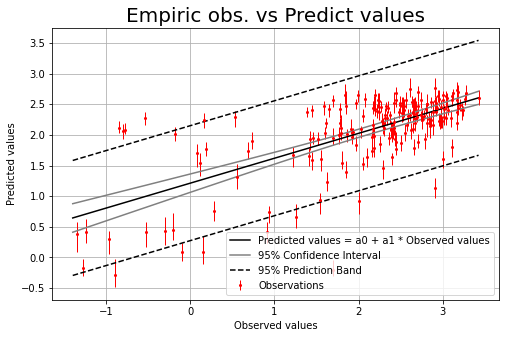

In [24]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(-1.4, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [25]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [26]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: r2020B01: mean - 0.152, median - 0.152, CI - [0.135-0.169]

SHAP-values for: r2020B03: mean - 0.085, median - 0.087, CI - [0.071-0.1]

SHAP-values for: r2020B05: mean - 0.094, median - 0.094, CI - [0.081-0.107]

SHAP-values for: r2020B06: mean - 0.077, median - 0.078, CI - [0.058-0.1]

SHAP-values for: r2020B07: mean - 0.054, median - 0.054, CI - [0.043-0.066]

SHAP-values for: r2020B10: mean - 0.07, median - 0.068, CI - [0.055-0.085]

SHAP-values for: r2020B11: mean - 0.122, median - 0.121, CI - [0.107-0.139]



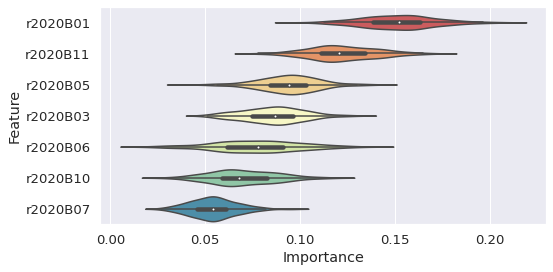

In [28]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['r2020B01', 'r2020B11', 'r2020B05', 'r2020B03', 'r2020B06',  'r2020B10', 'r2020B07'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [29]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [30]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 73.975, median: 73.0,
 pred. interval (P(0.025)-P(0.975)): 34.975-134.225, 
 conf. interval (p-value=0.95): 52.325-93.675 
***
Aggregate bias statistic: 
 mean: -0.041, median: -0.046,
 pred. interval (P(0.025)-P(0.975)): -0.278-0.182, 
 conf. interval (p-value=0.95): -0.141-0.069 
***
Aggregate RMSE statistic: 
 mean: 0.777, median: 0.767, pred. interval (P(0.025)-P(0.975)): 0.58-1.024, 
 conf. interval (p-value=0.95): 0.666-0.886 
***
Aggregate MSE statistic: 
 mean: 0.619, median: 0.588, pred. interval (P(0.025)-P(0.975)): 0.337-1.048, 
 conf. interval (p-value=0.95): 0.445-0.787 
***
Aggregate R^2 statistic: 
 mean: 0.41, median: 0.419, pred. interval (P(0.025)-P(0.975)): 0.119-0.685, 
 conf. interval (p-value=0.95): 0.266-0.551 
***
Aggregate bias(%) statistic: 
 mean: -1.677, median: -2.202, pred. interval (P(0.025)-P(0.975)): -12.002-10.207, 
 conf. interval (p-value=0.95): -

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

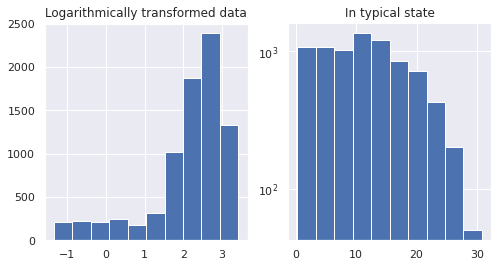

In [31]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [32]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [-1, 0, 1, 2, 3, 4])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 5, 10, 15, 20, 25, 30])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

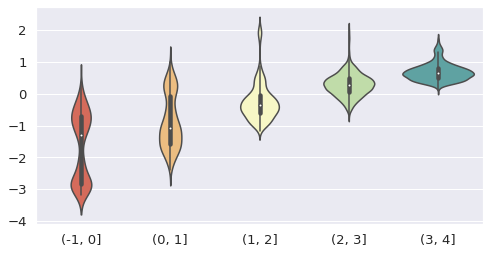

In [33]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

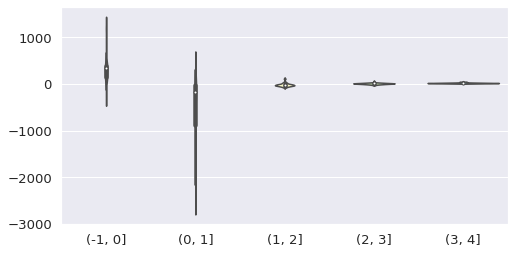

In [34]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

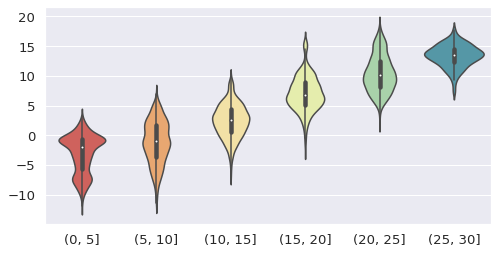

In [35]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

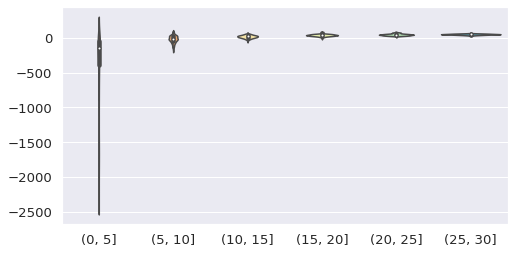

In [36]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [37]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [38]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [39]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.82821
[1]	validation_0-rmse:1.73939
[2]	validation_0-rmse:1.65808
[3]	validation_0-rmse:1.58649
[4]	validation_0-rmse:1.51307
[5]	validation_0-rmse:1.44906
[6]	validation_0-rmse:1.39687
[7]	validation_0-rmse:1.34496
[8]	validation_0-rmse:1.29431
[9]	validation_0-rmse:1.24958
[10]	validation_0-rmse:1.20205
[11]	validation_0-rmse:1.16127
[12]	validation_0-rmse:1.12156


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:1.08827
[14]	validation_0-rmse:1.05527
[15]	validation_0-rmse:1.02608
[16]	validation_0-rmse:0.99619
[17]	validation_0-rmse:0.96636
[18]	validation_0-rmse:0.94865
[19]	validation_0-rmse:0.92829
[20]	validation_0-rmse:0.90825
[21]	validation_0-rmse:0.89391
[22]	validation_0-rmse:0.87411
[23]	validation_0-rmse:0.85861
[24]	validation_0-rmse:0.84535
[25]	validation_0-rmse:0.83602
[26]	validation_0-rmse:0.82366
[27]	validation_0-rmse:0.81209
[28]	validation_0-rmse:0.79944
[29]	validation_0-rmse:0.79027
[30]	validation_0-rmse:0.78168
[31]	validation_0-rmse:0.77053
[32]	validation_0-rmse:0.76244
[33]	validation_0-rmse:0.75876
[34]	validation_0-rmse:0.74984
[35]	validation_0-rmse:0.74363
[36]	validation_0-rmse:0.73946
[37]	validation_0-rmse:0.73104
[38]	validation_0-rmse:0.72875
[39]	validation_0-rmse:0.72439
[40]	validation_0-rmse:0.72058
[41]	validation_0-rmse:0.71914
[42]	validation_0-rmse:0.71547
[43]	validation_0-rmse:0.71354
[44]	validation_0-rmse:0.70935
[45]	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [40]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 151


In [41]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

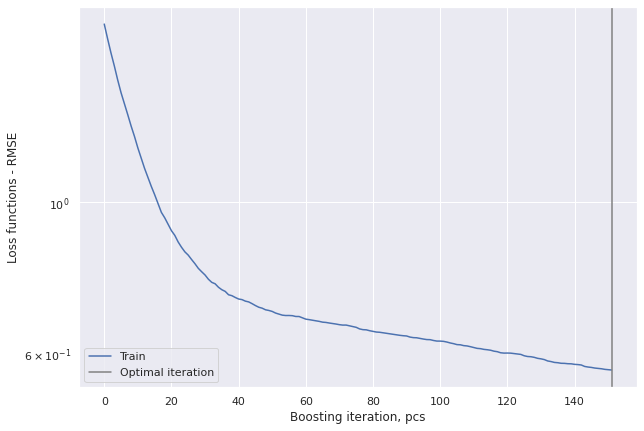

In [42]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [43]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.0
Relative bias(%):  0.64
RMSE: 0.6
Relative RMSE(%):  26.854
MSE: 0.3
R square: 70.1%


In [44]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.712
Uncertainty
a0: 0.80+/-0.07
a1: 0.625+/-0.028


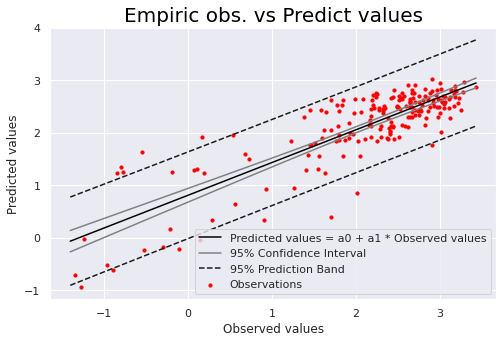

In [45]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-1.4, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

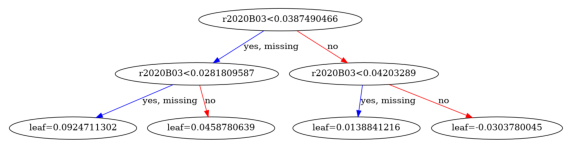

In [48]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=3) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

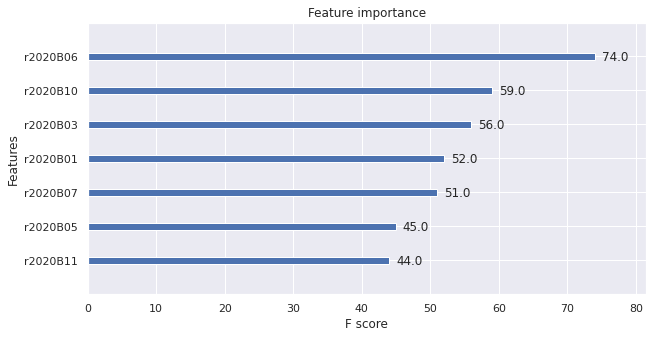

In [50]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

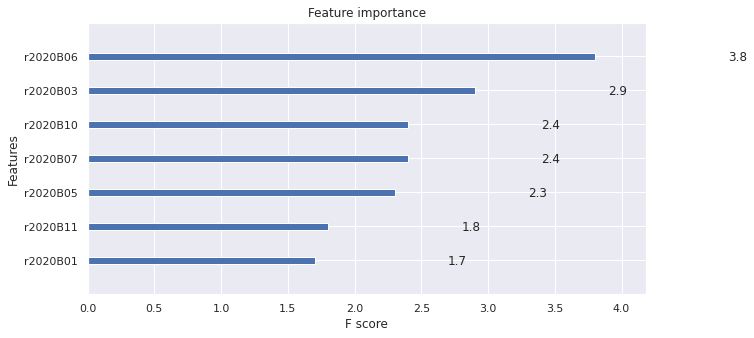

In [51]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

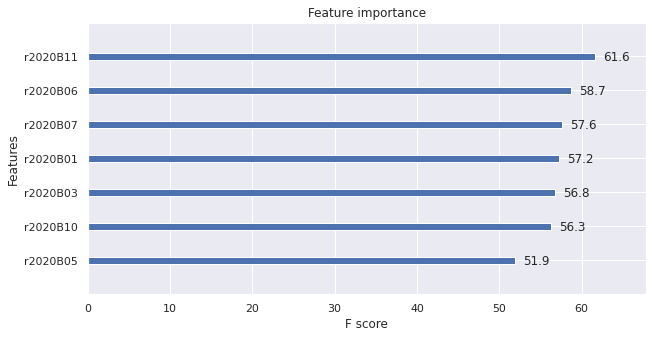

In [52]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [53]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


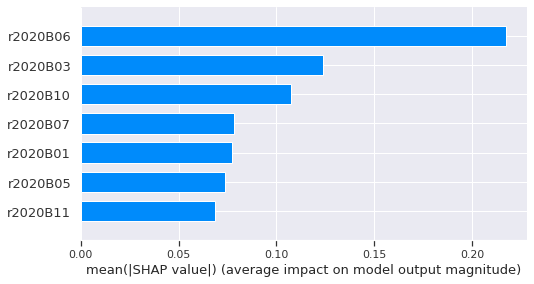

In [54]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

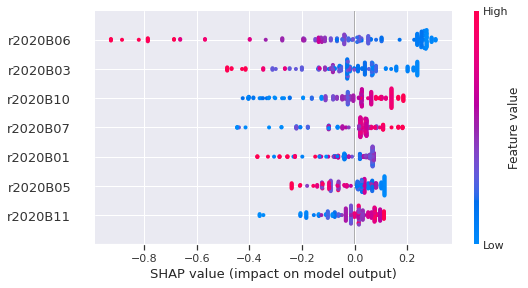

In [55]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

invalid value encountered in true_divide
invalid value encountered in true_divide


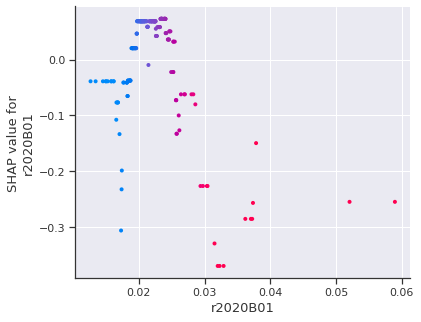

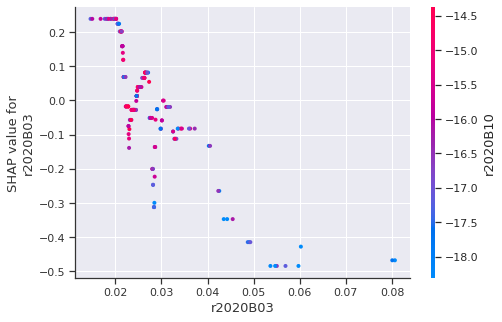

invalid value encountered in true_divide
invalid value encountered in true_divide


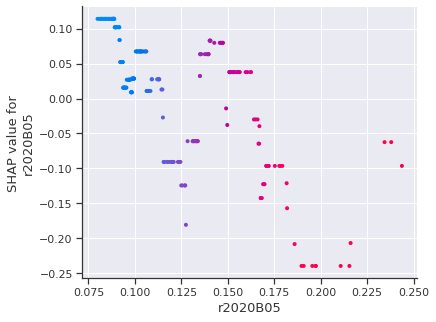

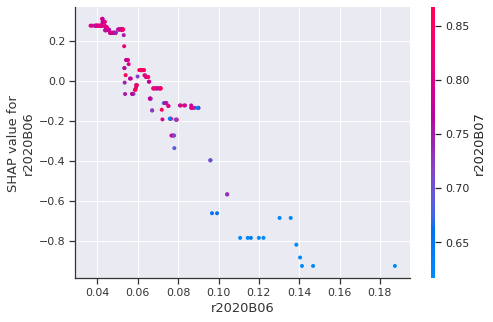

invalid value encountered in true_divide
invalid value encountered in true_divide


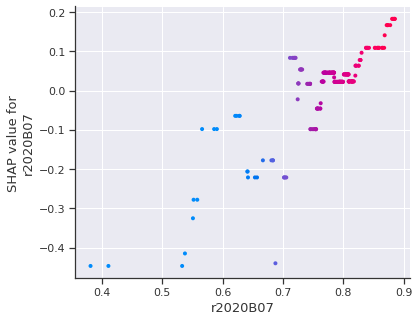

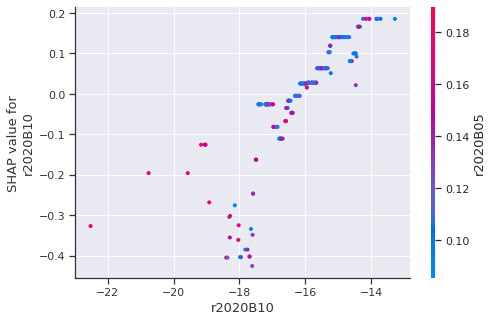

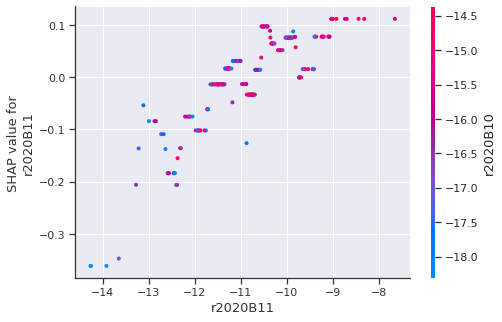

In [56]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [57]:
# Save to JSON
f_xgb_model.save_model("../05_output_data/XGBoost_models/07_LN_M_stem_SENTINEL_2020_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../05_output_data/XGBoost_models/07_LN_M_stem_SENTINEL_2020_XGB_model.txt")